In [6]:
import warnings # Got an irritating warning
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [52]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

# Dataset where the species isn't the same as the main-species
bycatch = dataset[dataset['Art FAO'] != dataset['Hovedart FAO']]
main_species = dataset[dataset['Art FAO'] == dataset['Hovedart FAO']]

95306


In [54]:
print(len(bycatch))
print(len(main_species))

210128
95306


210128 entries are by-catch while 95306 are not by-catch

Graph that only shows total by-catch count

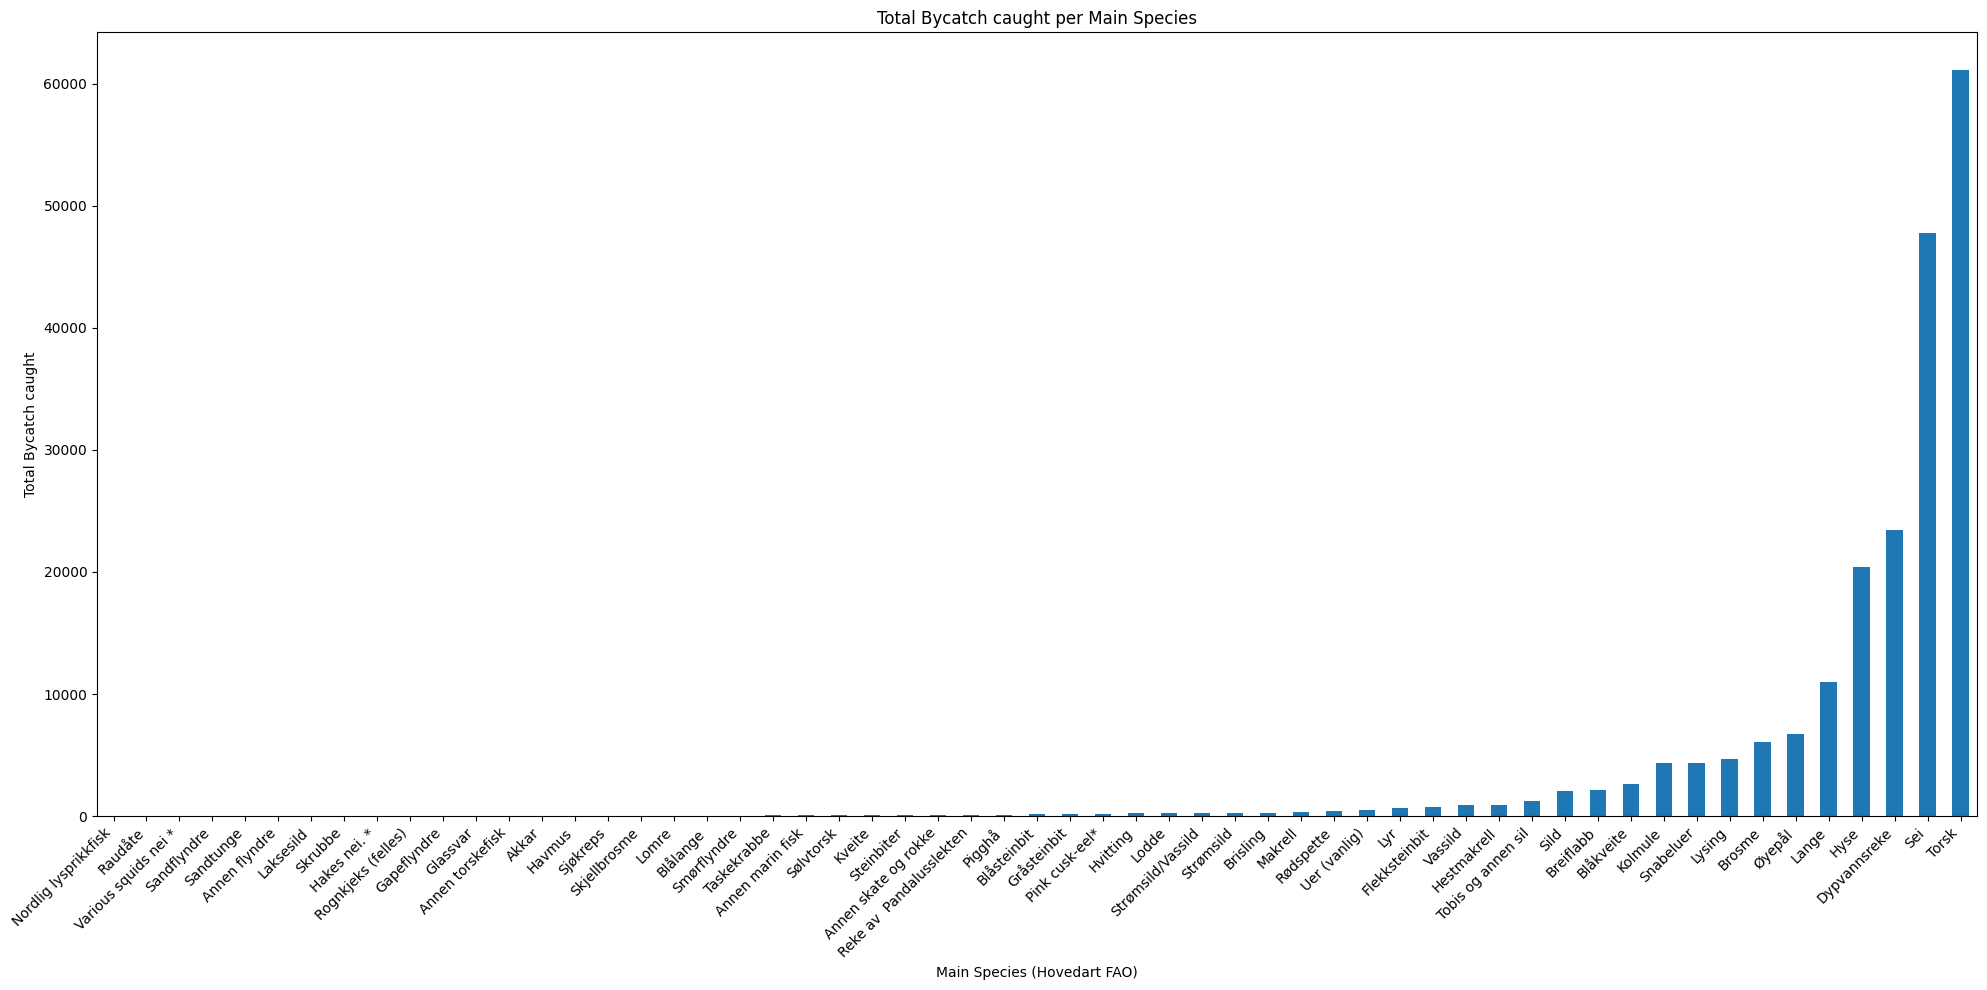

In [8]:
# Here i count the amount of times the species caught isn't the same as the main species
total_bycatch_counts = bycatch.groupby('Hovedart FAO')['Art FAO'].count()
total_bycatch_counts.sort_values(inplace=True)

plt.figure(figsize=(20, 10)) 

total_bycatch_counts.plot(kind = "bar")


plt.title('Total Bycatch caught per Main Species') 
plt.xlabel('Main Species (Hovedart FAO)') 
plt.ylabel('Total Bycatch caught')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Graph that only shows total by-catch weight

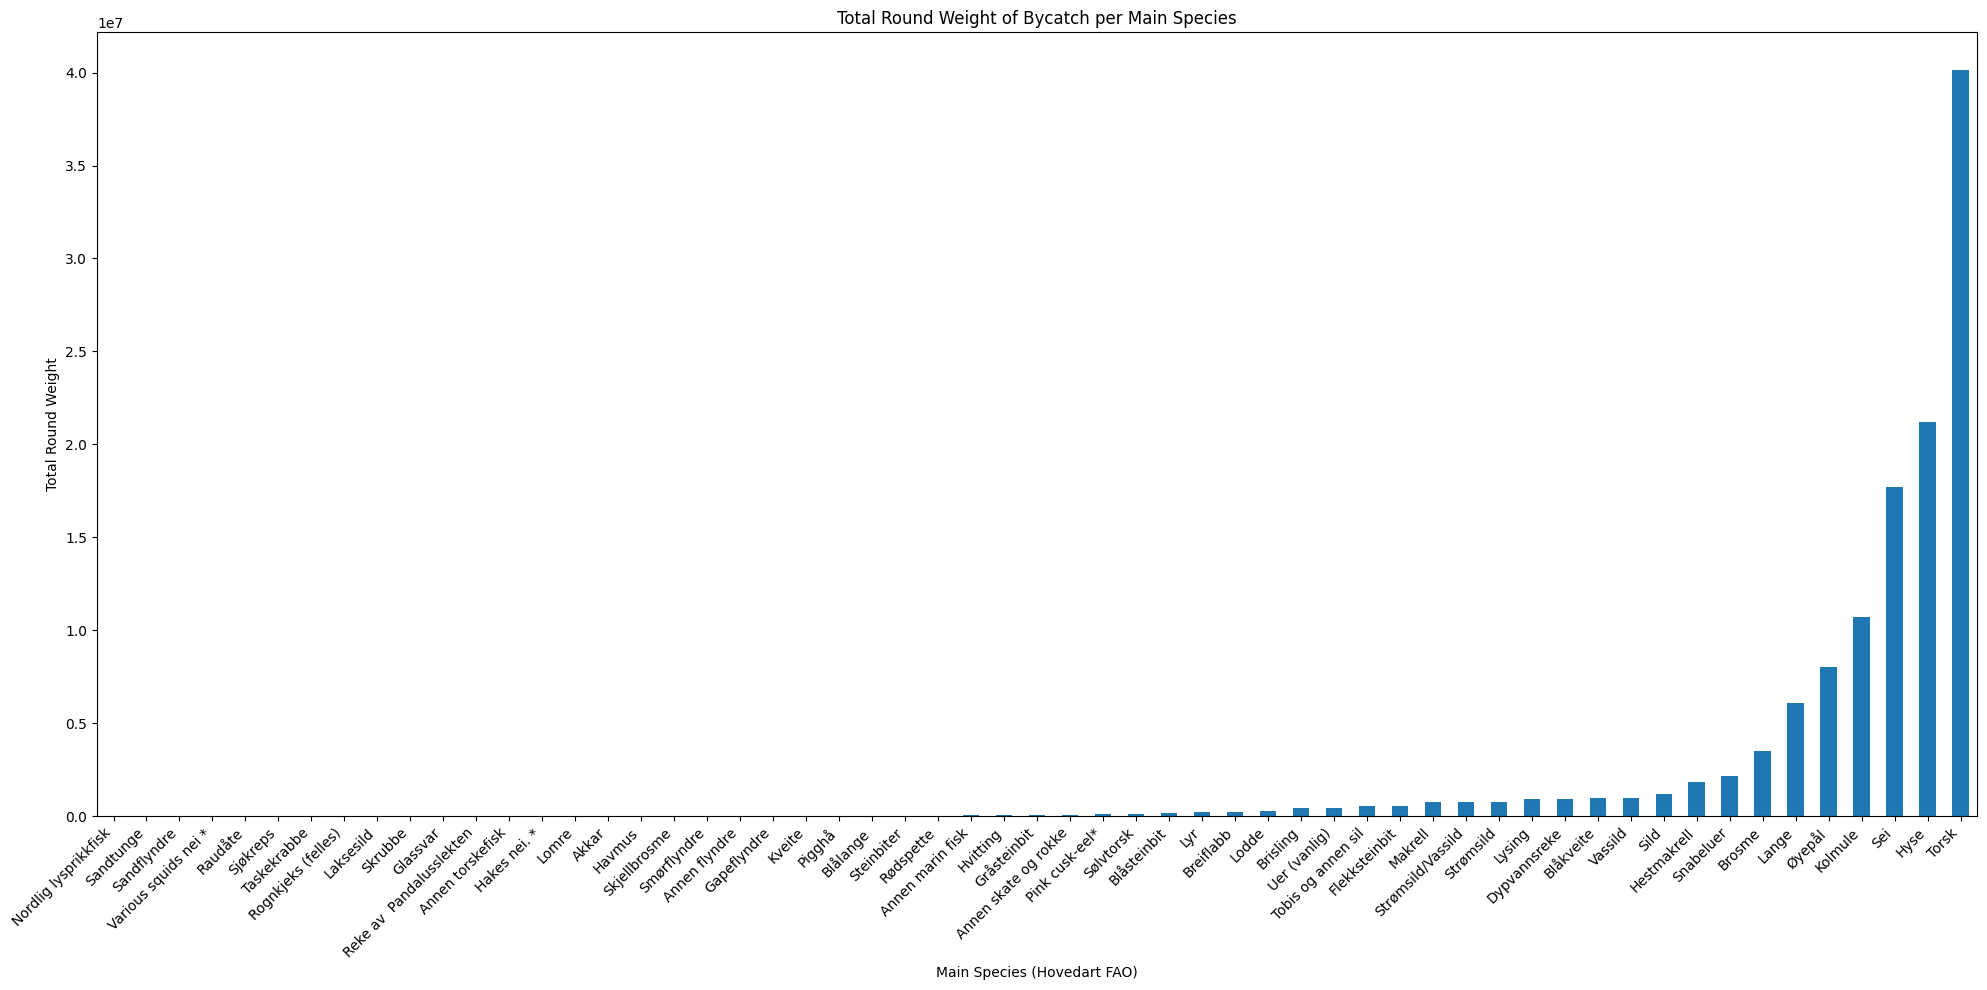

In [9]:
# Sum up the total weight of by-catch per species
bycatch_weight_per_group = bycatch.groupby(['Hovedart FAO', 'Art FAO'])['Rundvekt'].sum()
total_bycatch_weight_per_main_species = bycatch_weight_per_group.groupby(level='Hovedart FAO').sum()

total_bycatch_weight_per_main_species.sort_values(inplace=True)

plt.figure(figsize=(20, 10)) 

total_bycatch_weight_per_main_species.plot(kind='bar')

plt.title('Total Round Weight of Bycatch per Main Species') 
plt.xlabel('Main Species (Hovedart FAO)') 
plt.ylabel('Total Round Weight')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

These graphs shows the amount of instances a by-catch is caught for each species and the total weight. 
I made these graph to see if there are any species that catches a high amount of by-catch. 
I believe that if fishing for a species often results in by-catch and the weight of the by-catch is high 

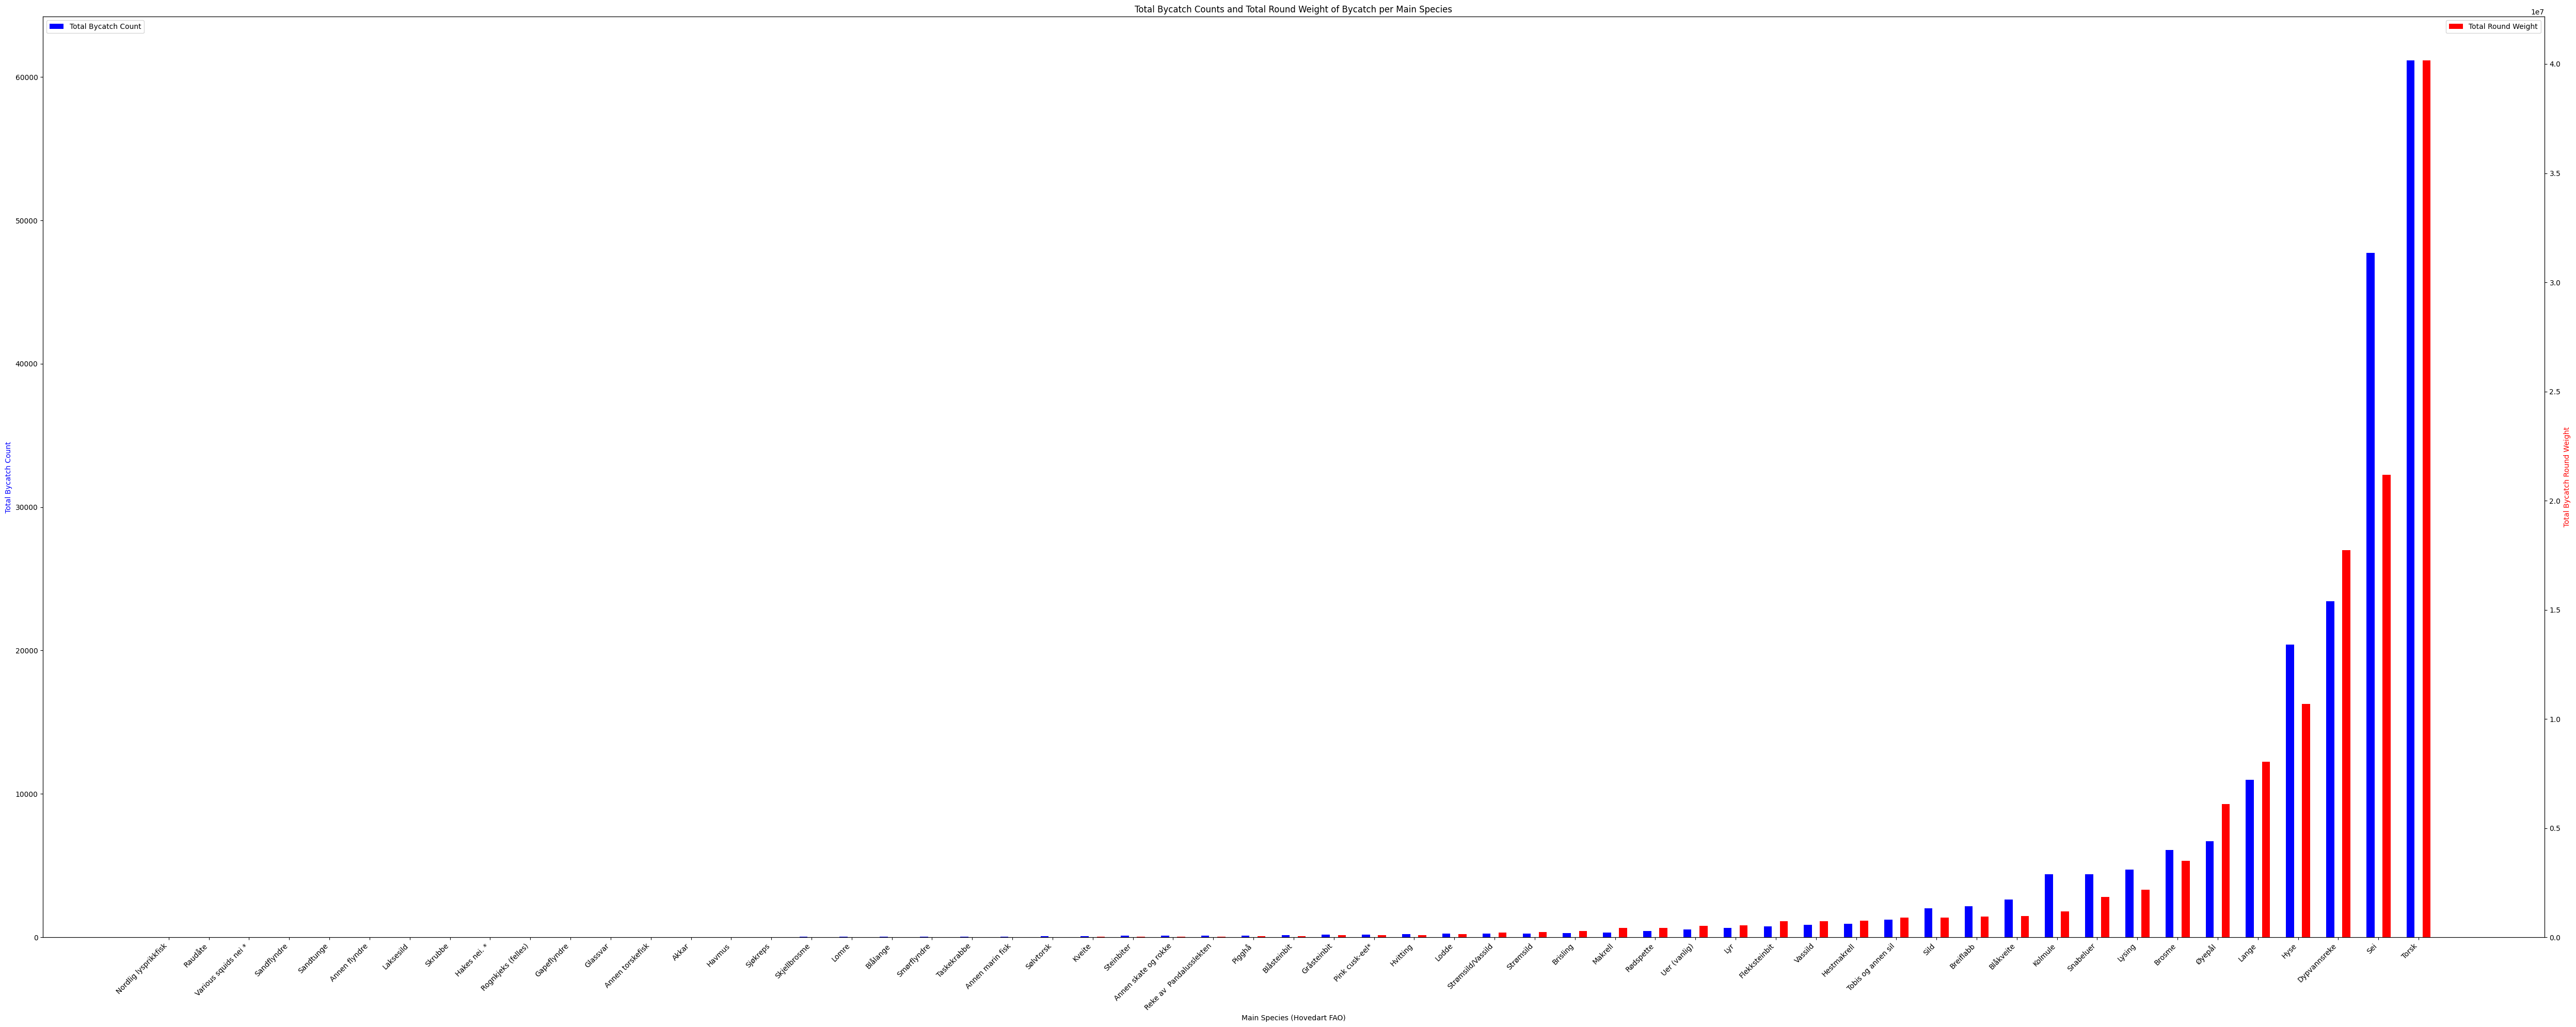

In [10]:
# Made a graph where the red bars represent the total weight of the by-catch and the blue represent
fig, ax1 = plt.subplots(figsize=(50, 20))

x = np.arange(len(total_bycatch_counts))

width = 0.20

bars1 = ax1.bar(x - width, total_bycatch_counts, width, label='Total Bycatch Count', color='blue')

ax2 = ax1.twinx()

bars2 = ax2.bar(x + width, total_bycatch_weight_per_main_species, width, label='Total Round Weight', color='red')

ax1.set_xlabel('Main Species (Hovedart FAO)')
ax1.set_ylabel('Total Bycatch Count', color='blue')
ax2.set_ylabel('Total Bycatch Round Weight', color='red')
ax1.set_title('Total Bycatch Counts and Total Round Weight of Bycatch per Main Species')
ax1.set_xticks(x)
ax1.set_xticklabels(total_bycatch_counts.index, rotation=45, ha="right")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

plt.show() 

Top 25 

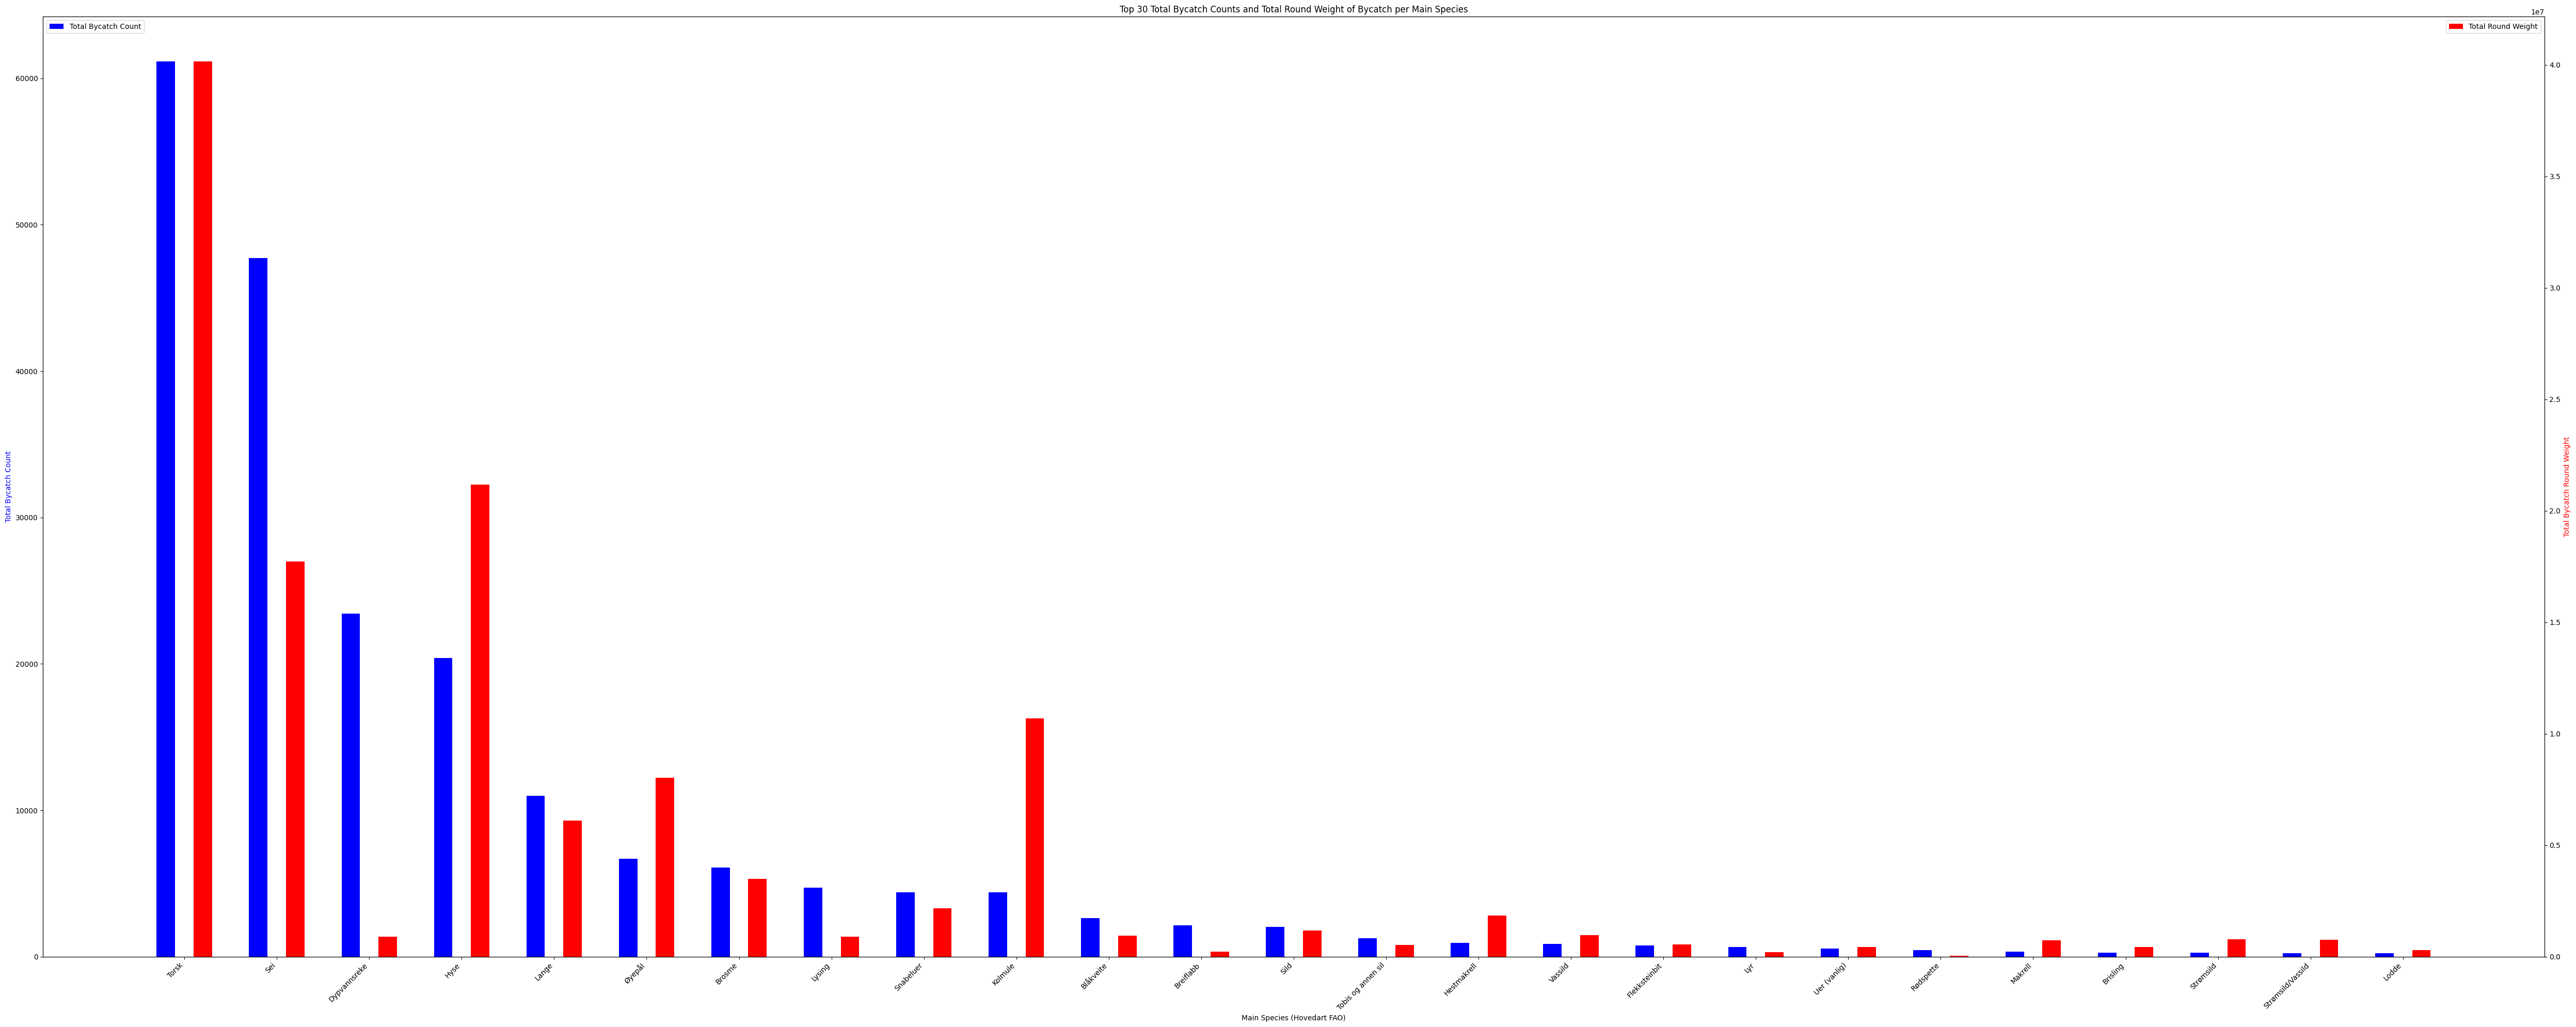

In [11]:
top_total_bycatch_counts = total_bycatch_counts.sort_values(ascending=False)[:25]

top_total_bycatch_weight_per_main_species = total_bycatch_weight_per_main_species[top_total_bycatch_counts.index]

fig, ax1 = plt.subplots(figsize=(50, 20))

x = np.arange(len(top_total_bycatch_counts))

width = 0.20

bars1 = ax1.bar(x - width, top_total_bycatch_counts, width, label='Total Bycatch Count', color='blue')

ax2 = ax1.twinx()

bars2 = ax2.bar(x + width, top_total_bycatch_weight_per_main_species, width, label='Total Round Weight', color='red')

ax1.set_xlabel('Main Species (Hovedart FAO)')
ax1.set_ylabel('Total Bycatch Count', color='blue')
ax2.set_ylabel('Total Bycatch Round Weight', color='red')
ax1.set_title('Top 30 Total Bycatch Counts and Total Round Weight of Bycatch per Main Species')
ax1.set_xticks(x)
ax1.set_xticklabels(top_total_bycatch_counts.index, rotation=45, ha="right")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

plt.show()

Rest of the data

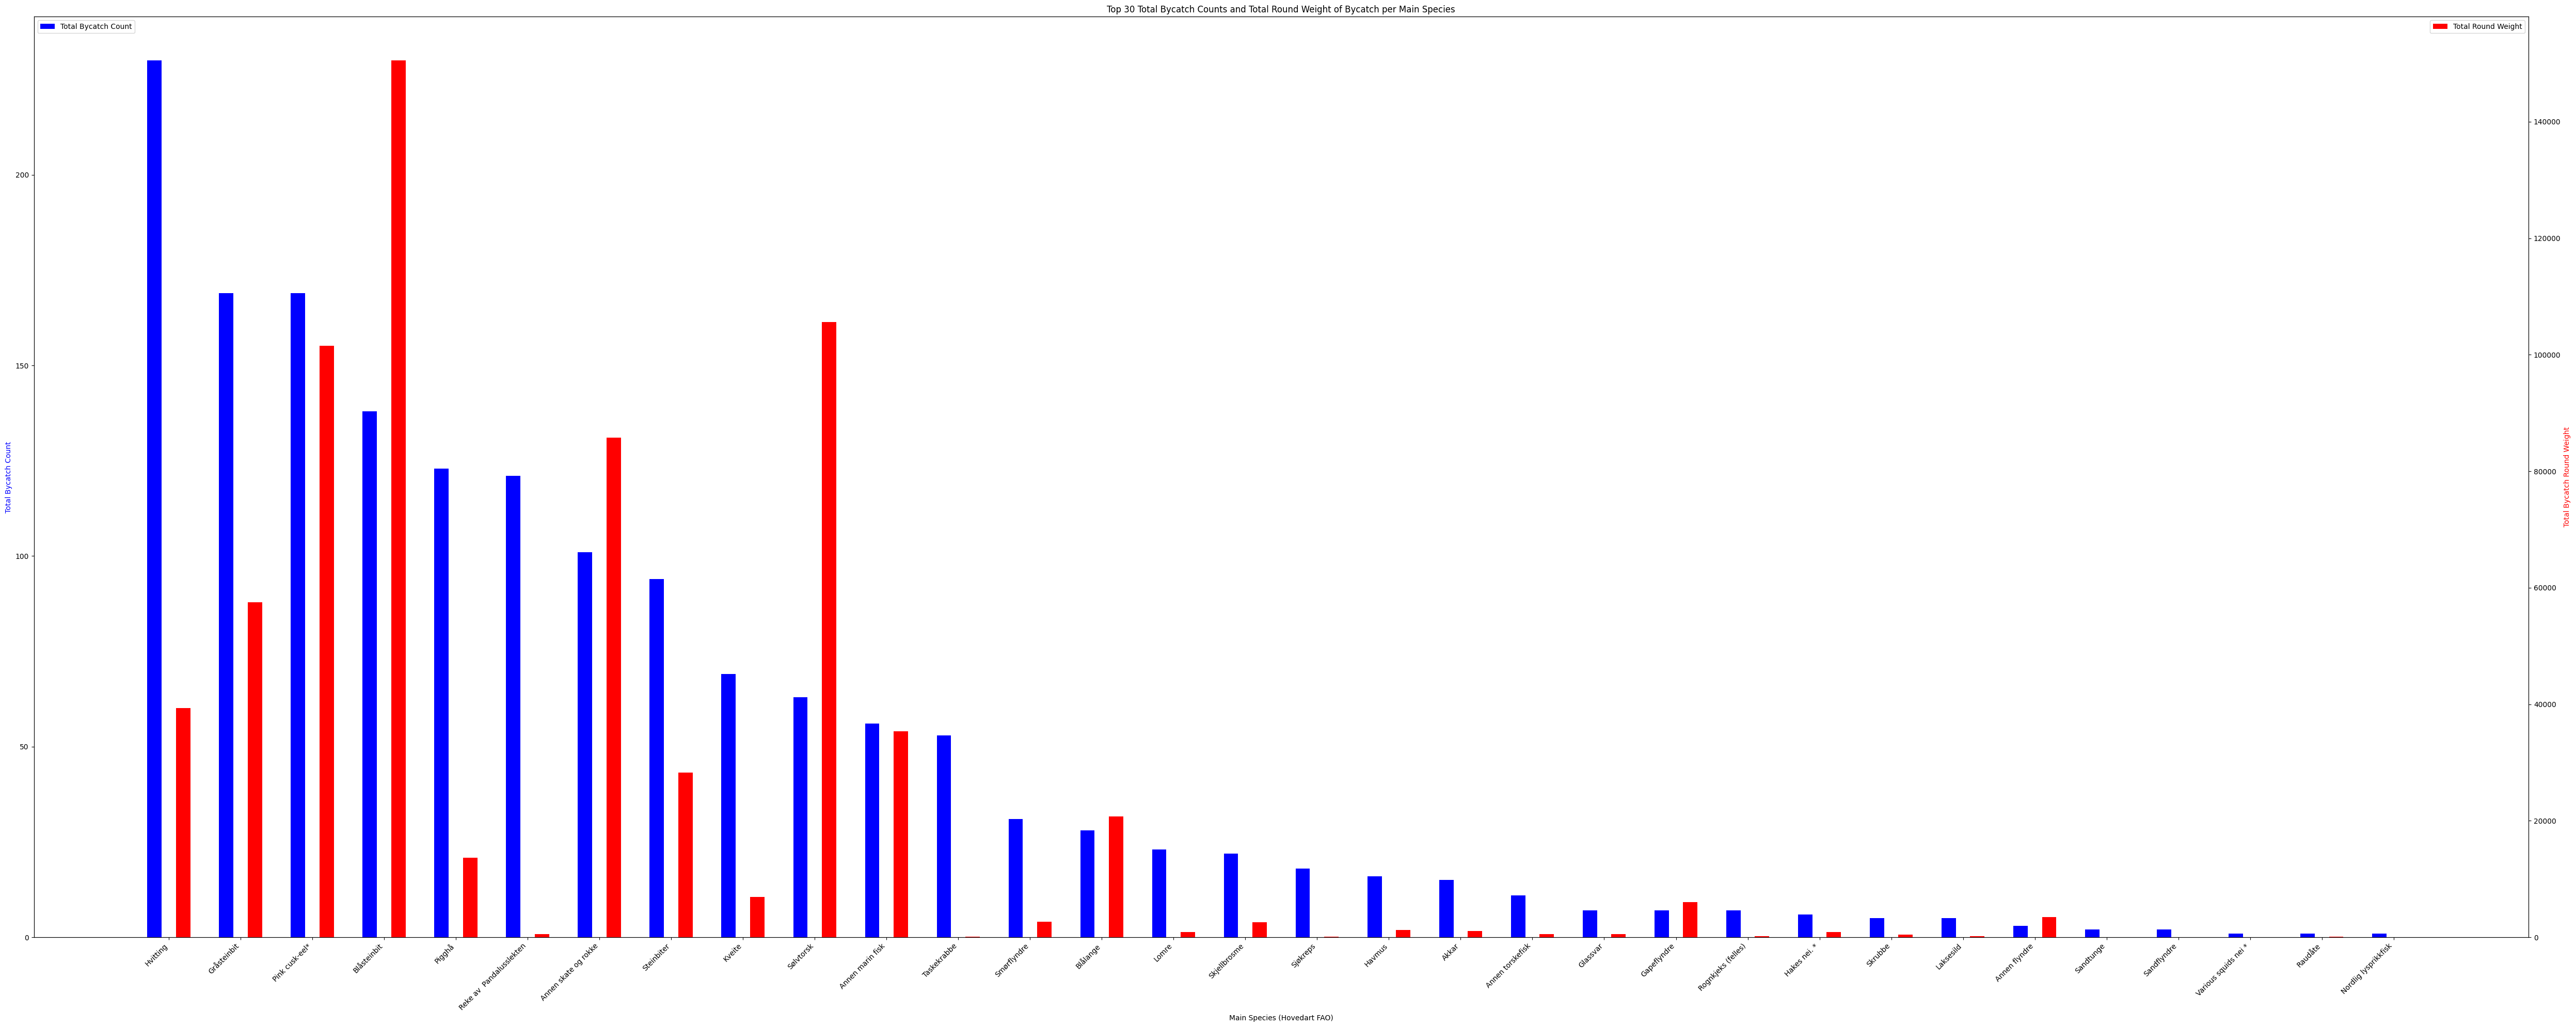

In [12]:
top_total_bycatch_counts = total_bycatch_counts.sort_values(ascending=False)[25:]

top_total_bycatch_weight_per_main_species = total_bycatch_weight_per_main_species[top_total_bycatch_counts.index]

fig, ax1 = plt.subplots(figsize=(50, 20))

x = np.arange(len(top_total_bycatch_counts))

width = 0.20

bars1 = ax1.bar(x - width, top_total_bycatch_counts, width, label='Total Bycatch Count', color='blue')

ax2 = ax1.twinx()

bars2 = ax2.bar(x + width, top_total_bycatch_weight_per_main_species, width, label='Total Round Weight', color='red')

ax1.set_xlabel('Main Species (Hovedart FAO)')
ax1.set_ylabel('Total Bycatch Count', color='blue')
ax2.set_ylabel('Total Bycatch Round Weight', color='red')
ax1.set_title('Top 30 Total Bycatch Counts and Total Round Weight of Bycatch per Main Species')
ax1.set_xticks(x)
ax1.set_xticklabels(top_total_bycatch_counts.index, rotation=45, ha="right")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

plt.show()

Scatter plot 

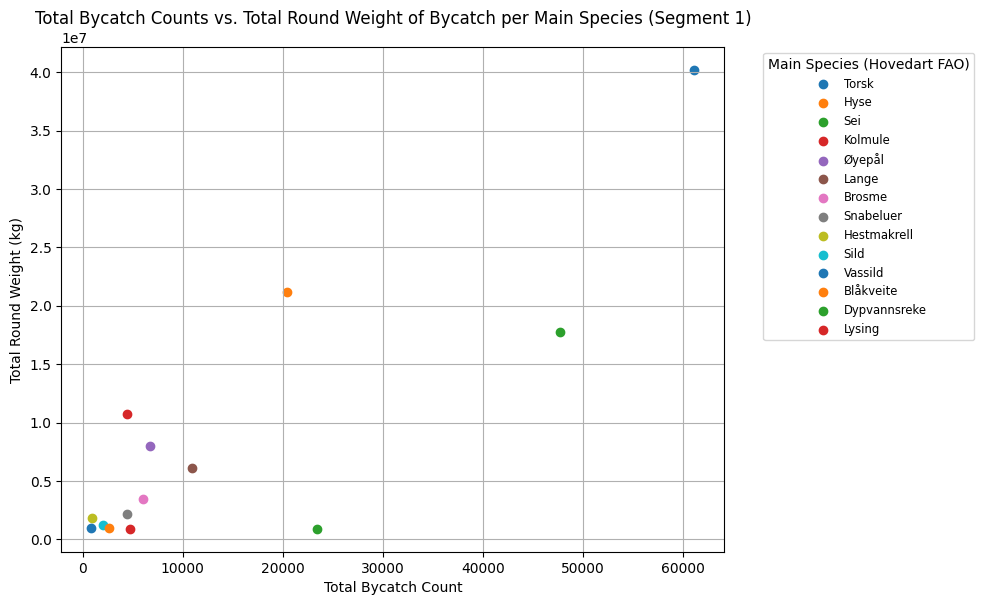

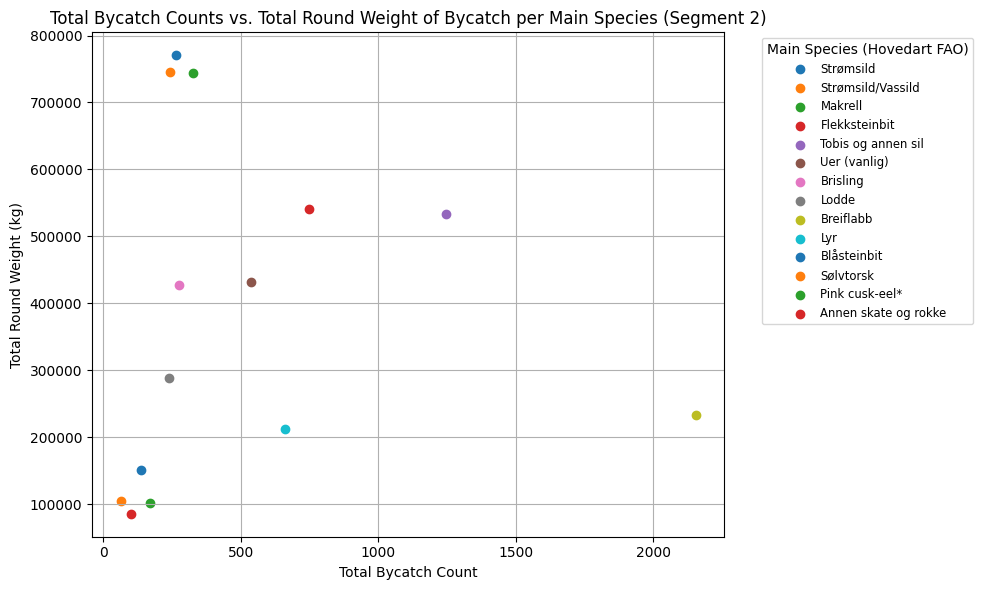

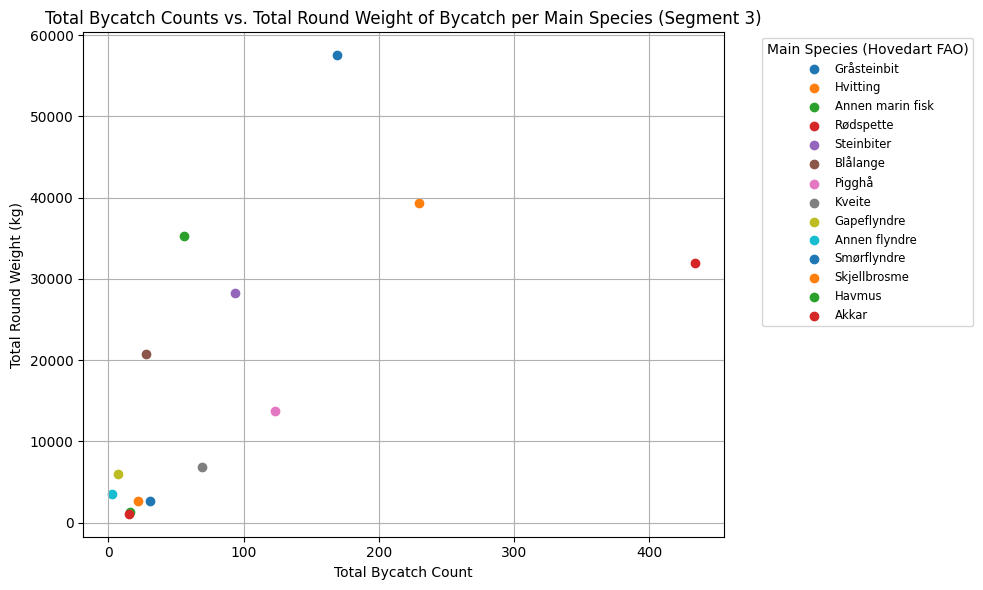

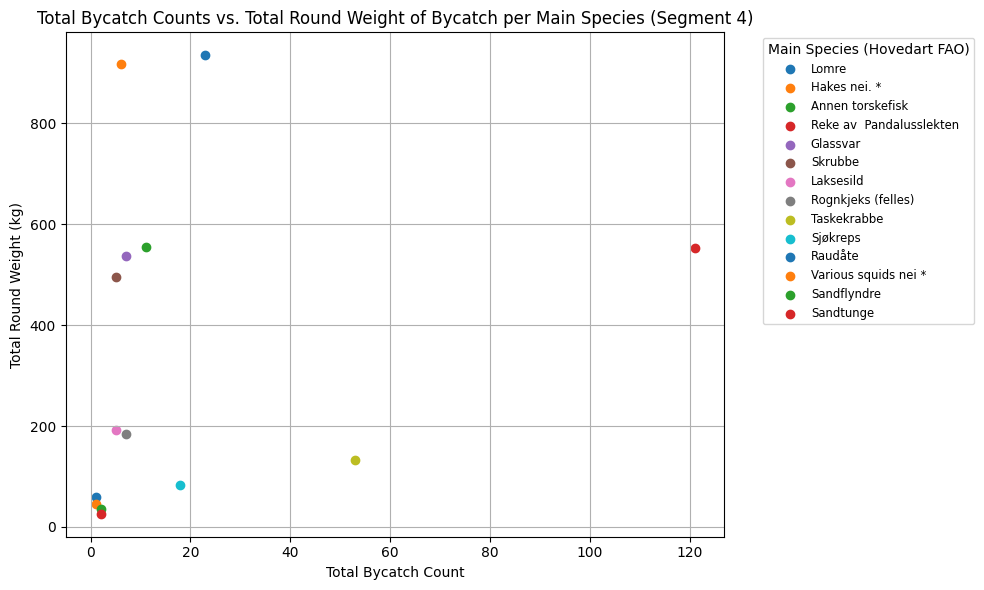

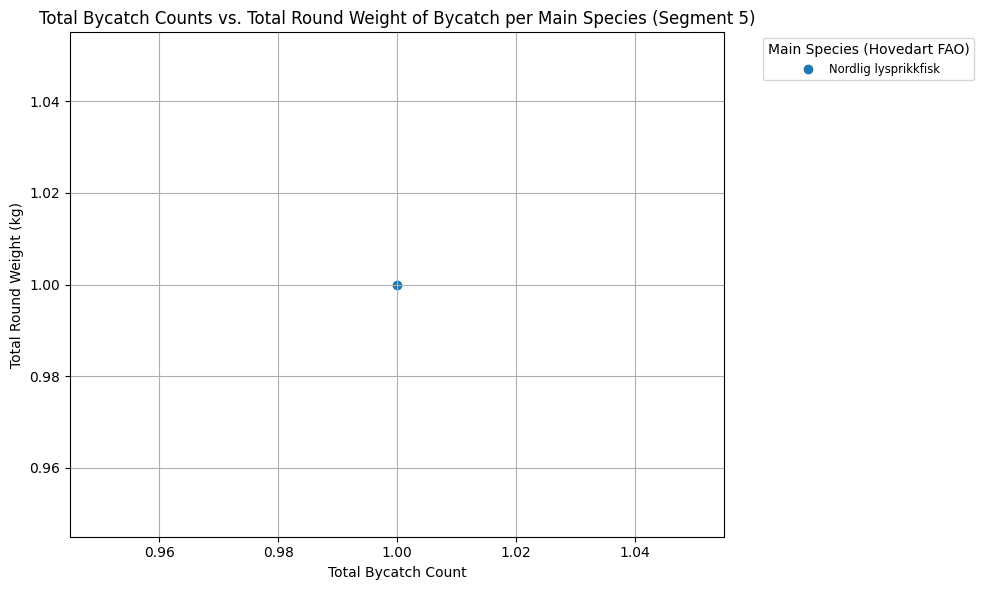

In [13]:
df_counts = total_bycatch_counts.reset_index()
df_counts.rename(columns={'Art FAO': 'Total Bycatch Count'}, inplace=True)

df_weights = total_bycatch_weight_per_main_species.reset_index()
df_weights.rename(columns={'Rundvekt': 'Total Round Weight'}, inplace=True)

merged_df = pd.merge(df_counts, df_weights, on='Hovedart FAO')
sorted_df = merged_df.sort_values(by='Total Round Weight', ascending=False)

increment_size = len(sorted_df) // 4 

for i in range(0, len(sorted_df), increment_size):
    subset_df = sorted_df.iloc[i:i+increment_size]

    plt.figure(figsize=(10, 6))
    
    for index, row in subset_df.iterrows():
        plt.scatter(row['Total Bycatch Count'], row['Total Round Weight'], label=row['Hovedart FAO'])

    plt.title(f'Total Bycatch Counts vs. Total Round Weight of Bycatch per Main Species (Segment {i//increment_size + 1})')
    plt.xlabel('Total Bycatch Count')
    plt.ylabel('Total Round Weight (kg)')
    plt.legend(title='Main Species (Hovedart FAO)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()

    plt.show()

Comparing main species total weight and total weight of its by-catch

Hovedart FAO
Akkar                            3121.0
Annen flyndre                    2000.0
Annen marin fisk                60422.0
Annen skate og rokke           134685.0
Annen torskefisk                  205.0
Blåkveite                     9548497.0
Blålange                        27465.0
Blåsteinbit                    138985.0
Breiflabb                      166855.0
Brisling                     10832775.0
Brosme                        4844629.0
Dypvannsreke                 26043603.0
Flekksteinbit                  885976.0
Gapeflyndre                      5824.0
Glassvar                          561.0
Gråsteinbit                     42895.0
Hakes nei. *                     1746.0
Havmus                           1330.0
Hestmakrell                   7332785.0
Hvitting                        66712.0
Hyse                         49920558.0
Kolmule                     427483667.0
Kveite                           7896.0
Laksesild                       17108.0
Lange                      

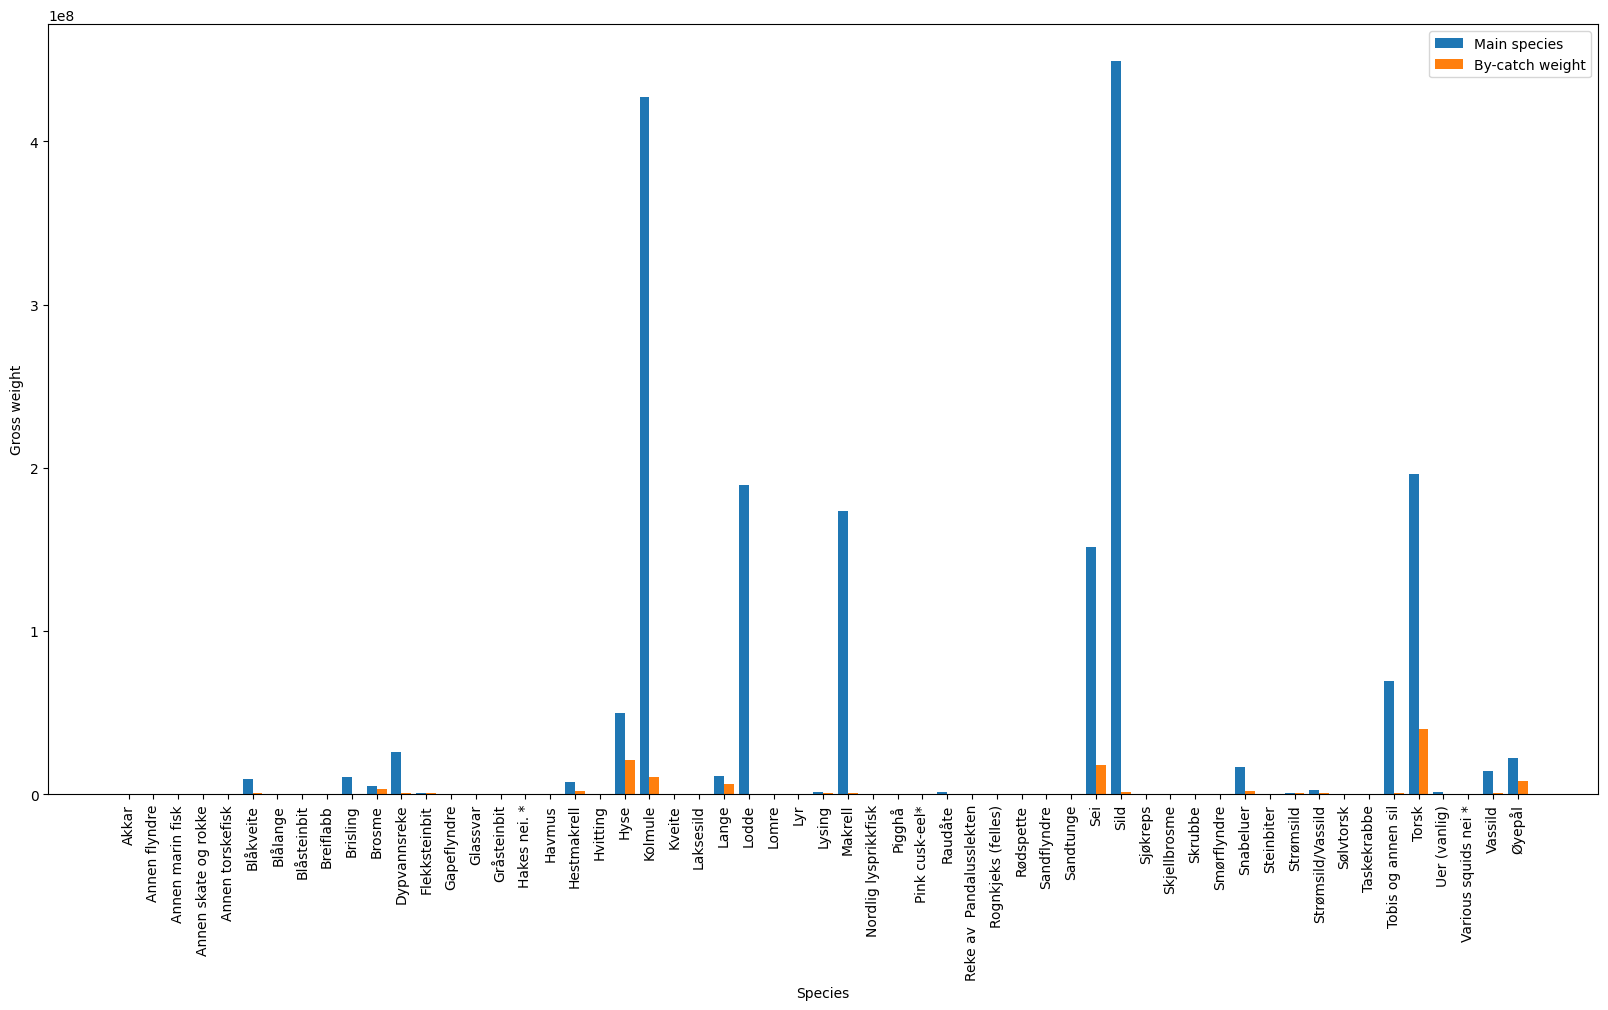

In [14]:
main_species_weight = main_species.groupby(['Hovedart FAO'])['Rundvekt'].sum()

species_to_drop = [species for species in main_species_weight.index if species not in total_bycatch_weight_per_main_species.index]

main_species_weight.drop(labels=species_to_drop, inplace=True)

x1 = main_species_weight.sort_index(inplace=False)
x2 = total_bycatch_weight_per_main_species.sort_index(inplace=False)

print(main_species_weight,total_bycatch_weight_per_main_species)

species = x1.index.intersection(x2.index)
x1 = x1[species]
x2 = x2[species]

width = 0.40
  
plt.figure(figsize=(20, 10)) 

x = np.arange(len(main_species_weight)) 

  
plt.bar(x-0.2, x1, width) 
plt.bar(x+0.2, x2, width)

plt.xticks(x, species) 
plt.xlabel("Species") 
plt.ylabel("Gross weight") 
plt.legend(["Main species", "By-catch weight"]) 
plt.xticks(rotation=90)
plt.show()  


Want to see the equipment used to catch each of the top 10 species with most bycatch

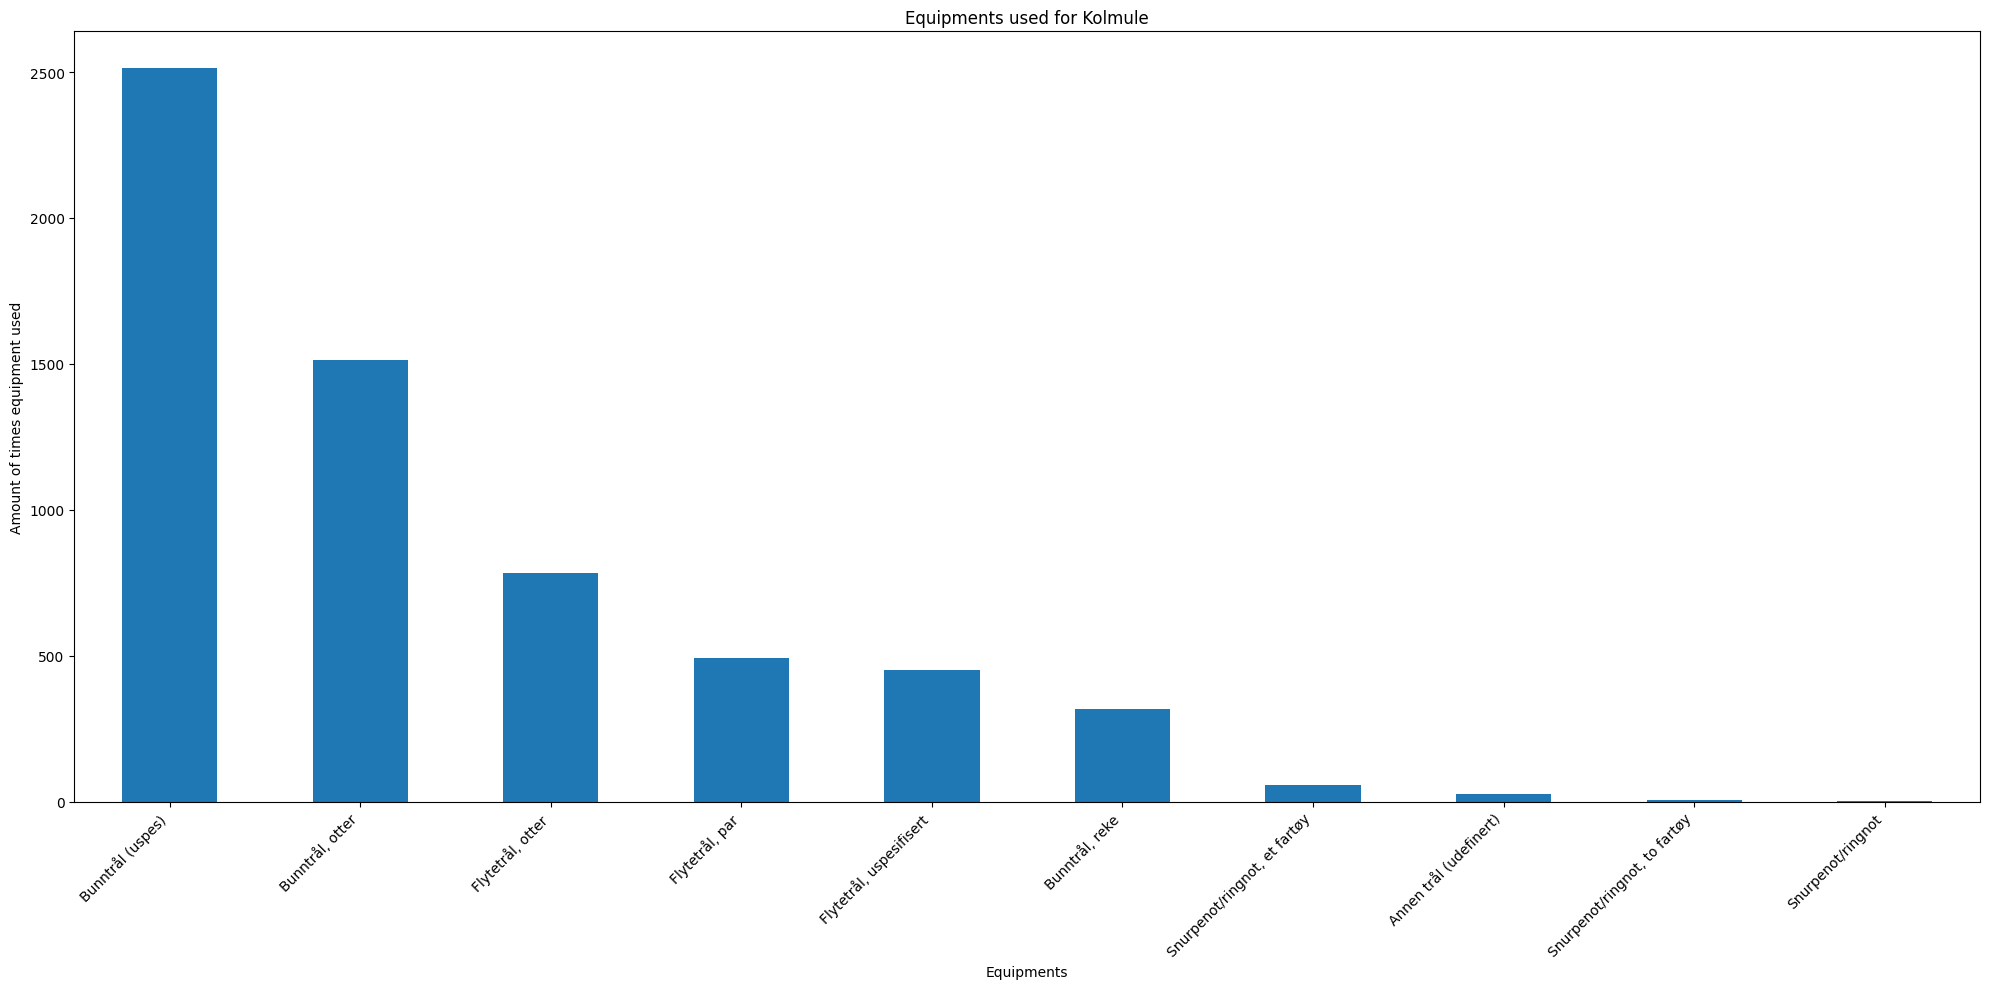

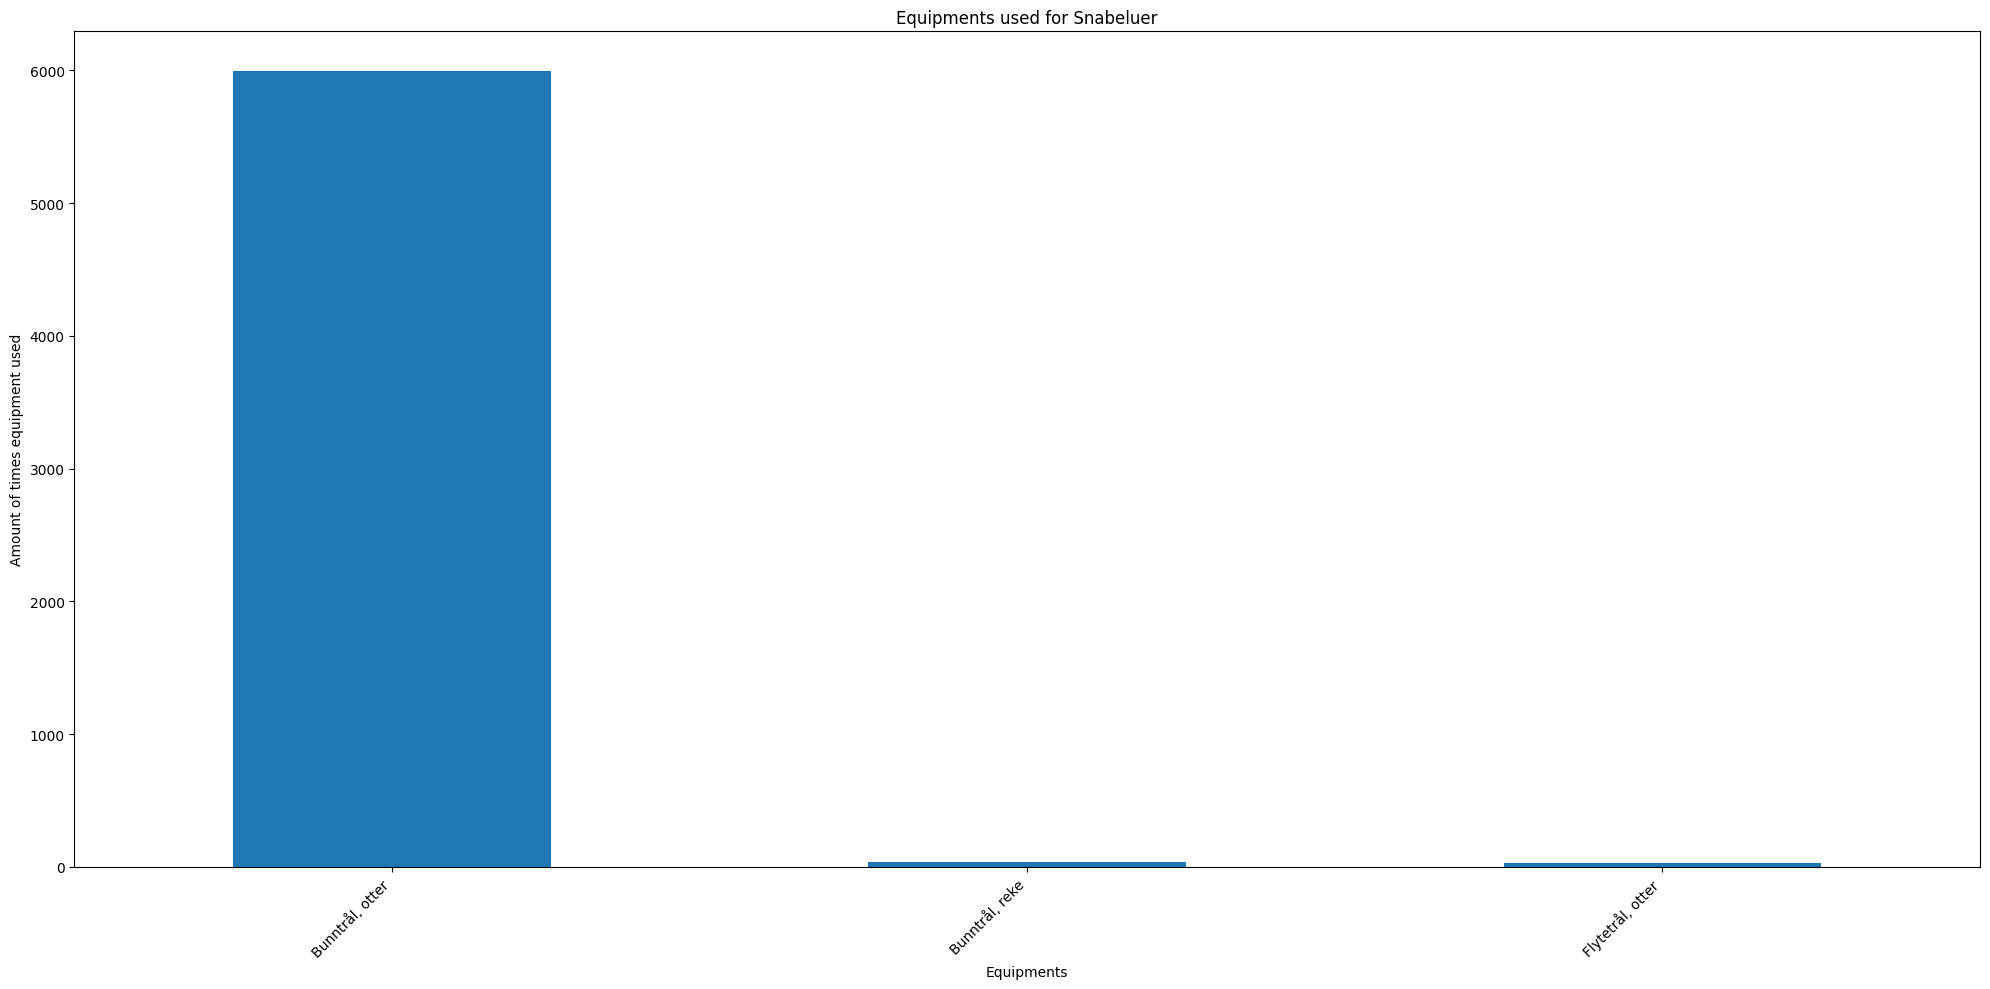

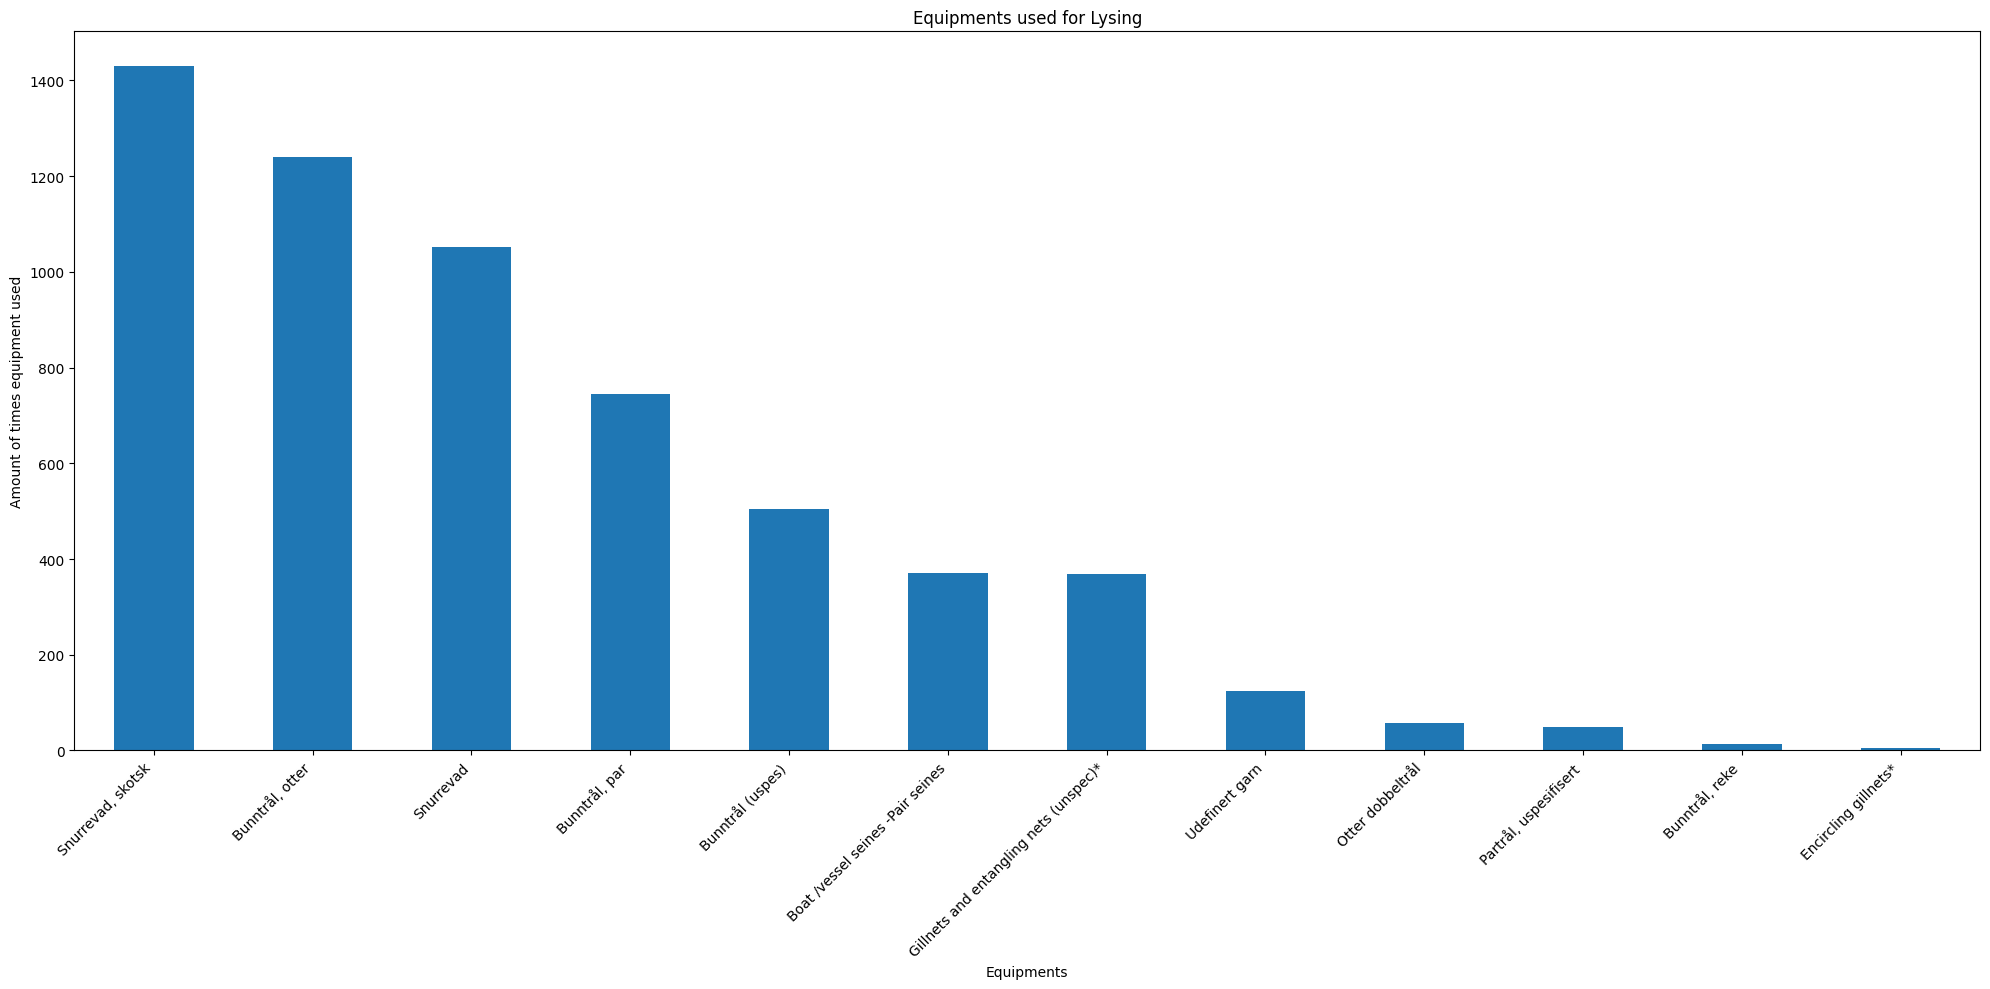

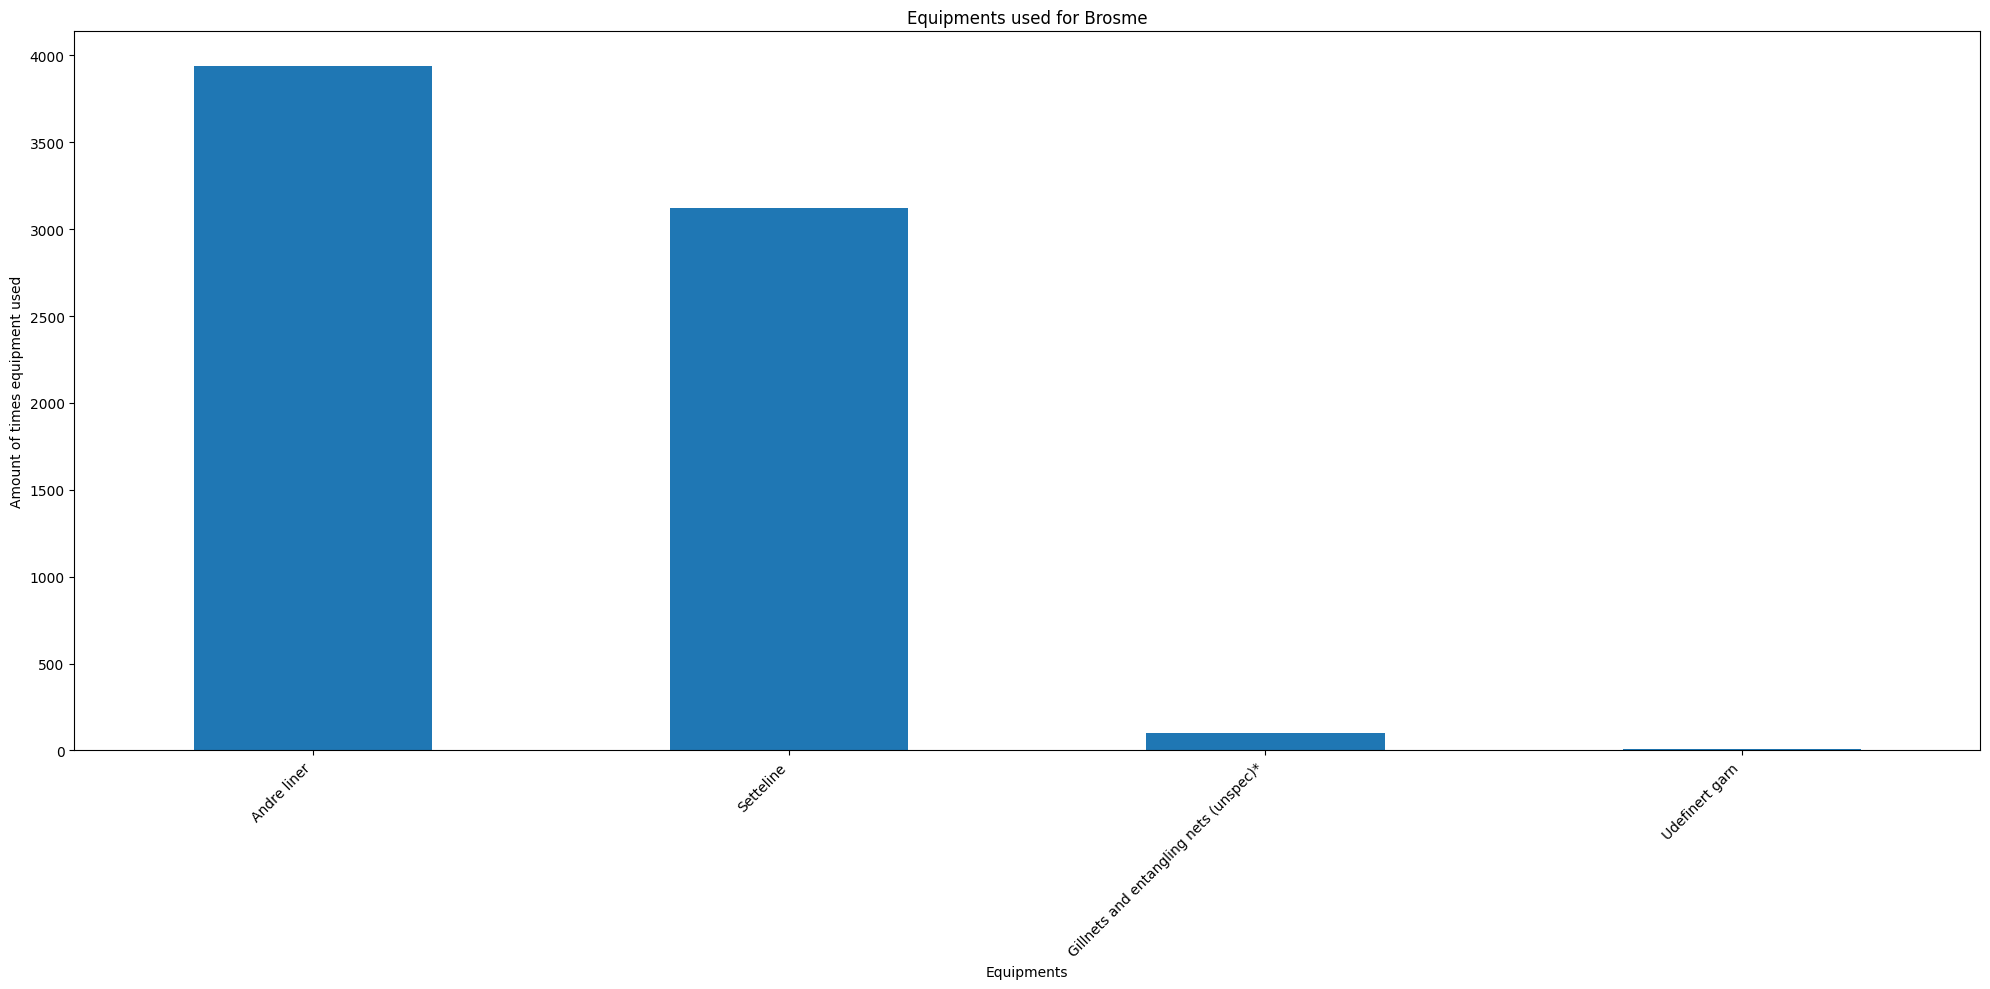

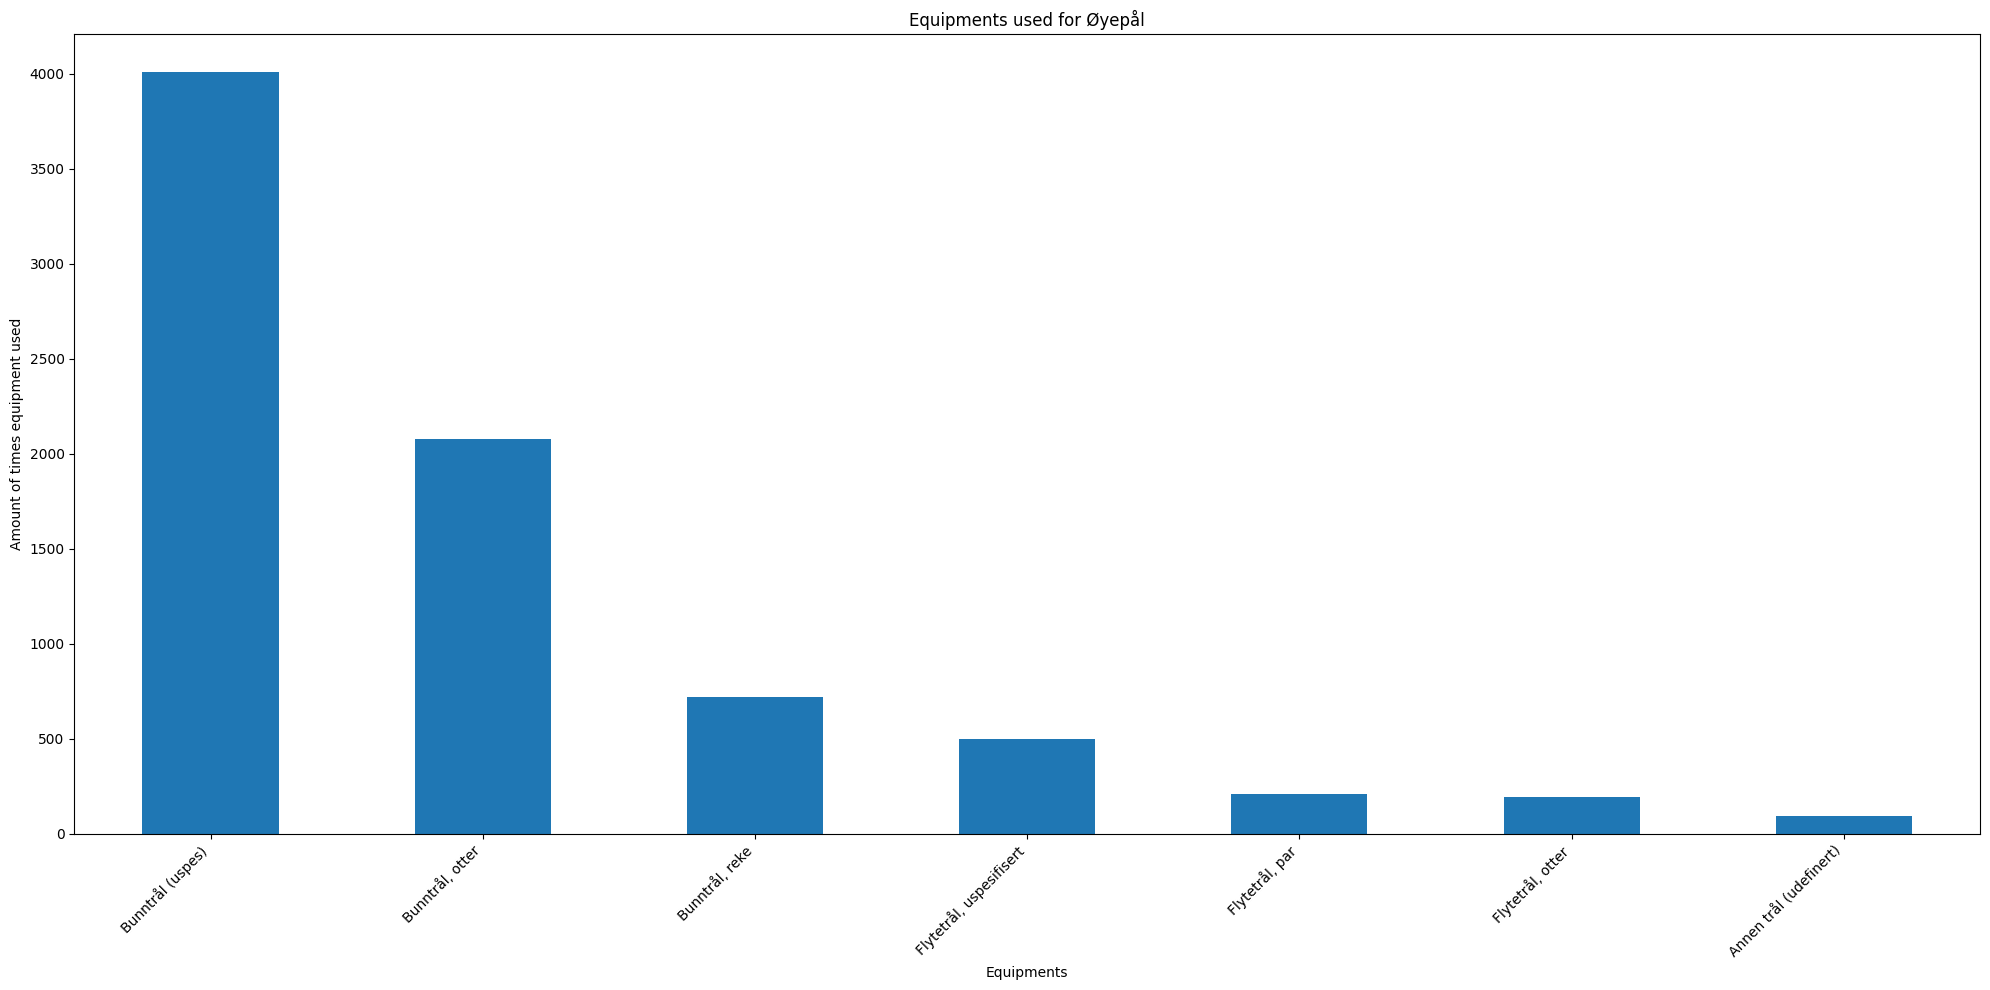

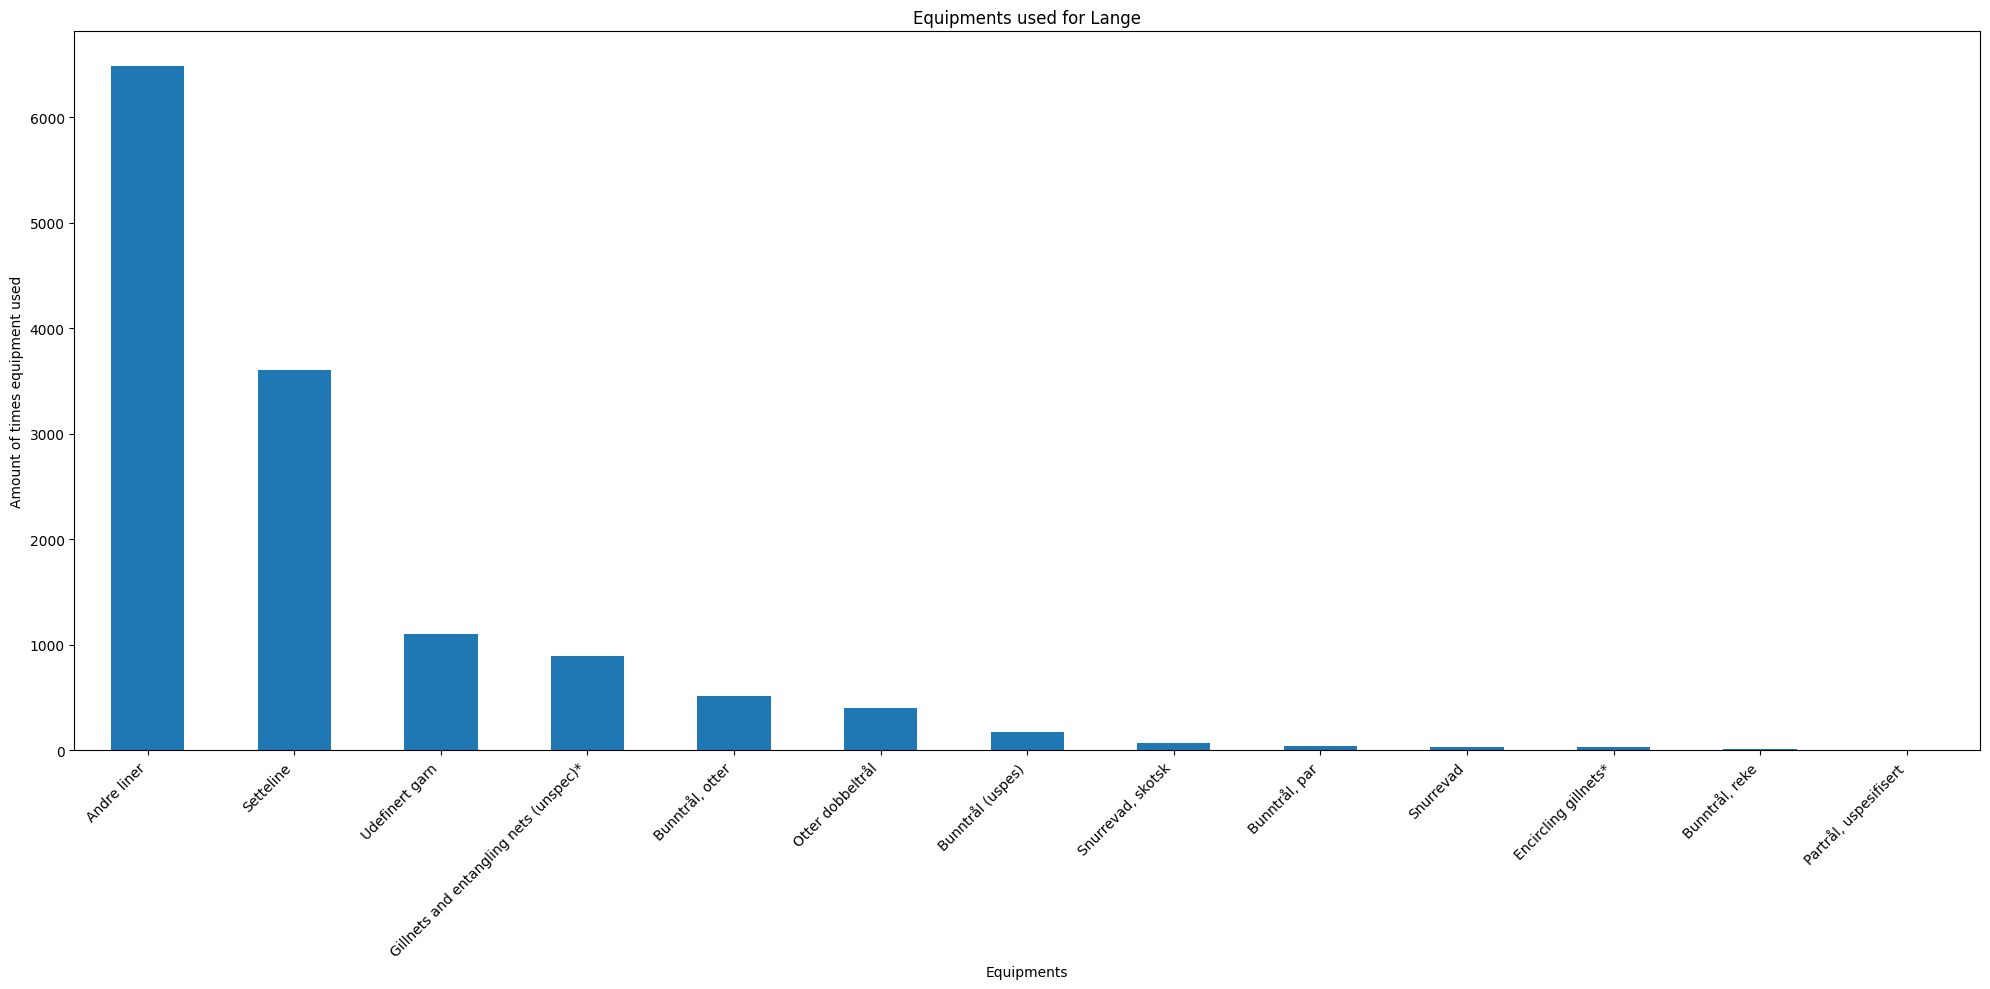

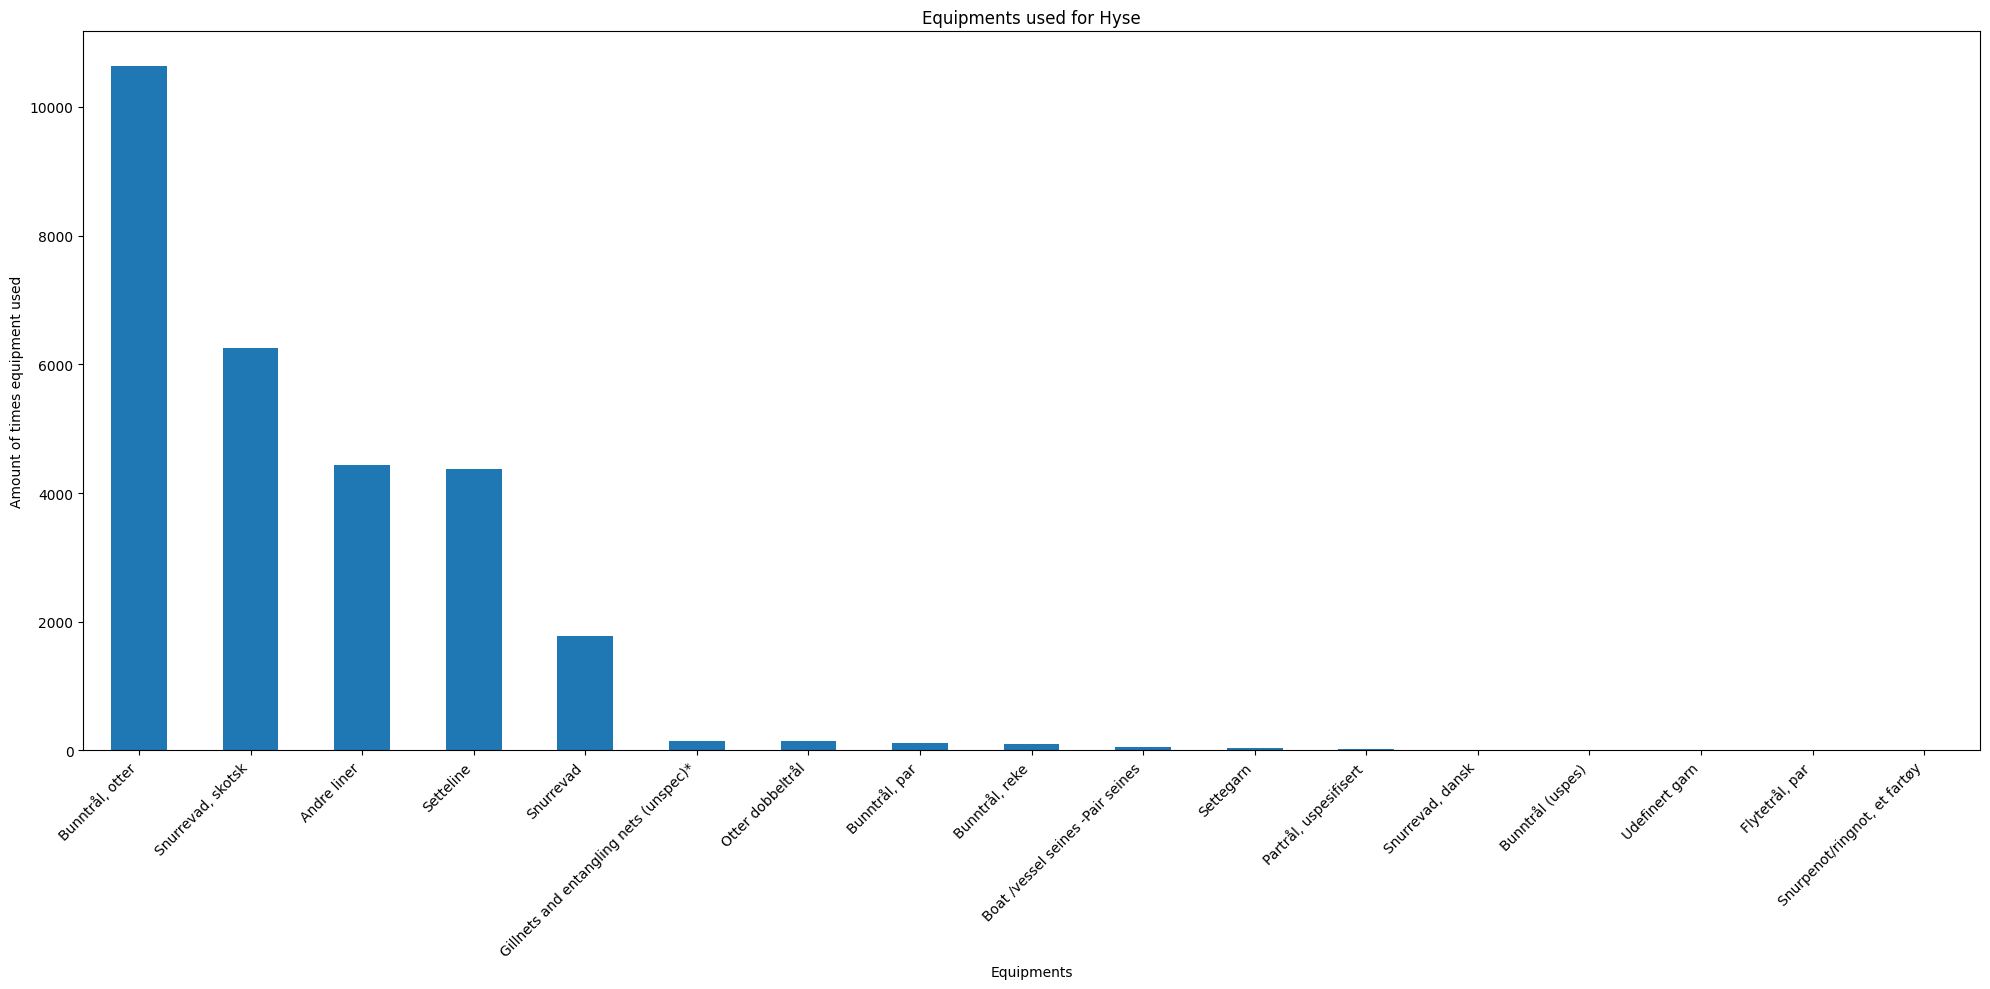

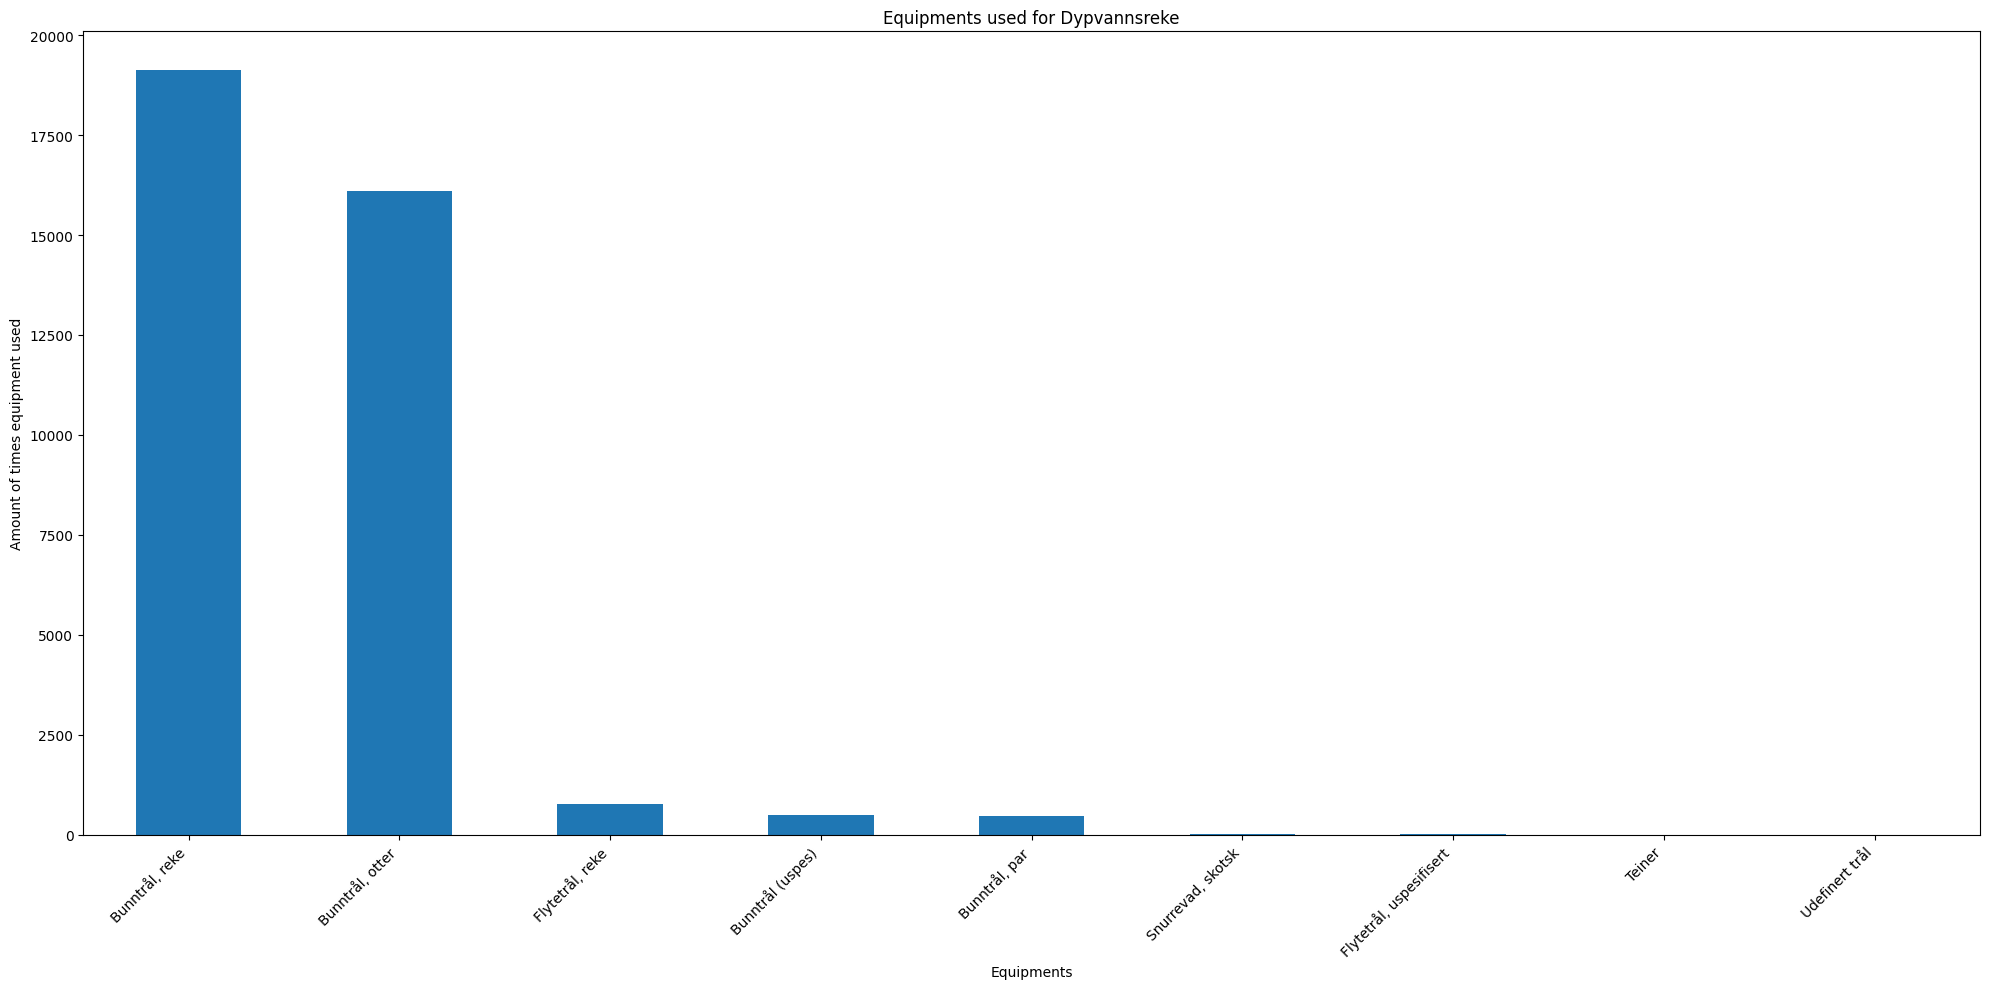

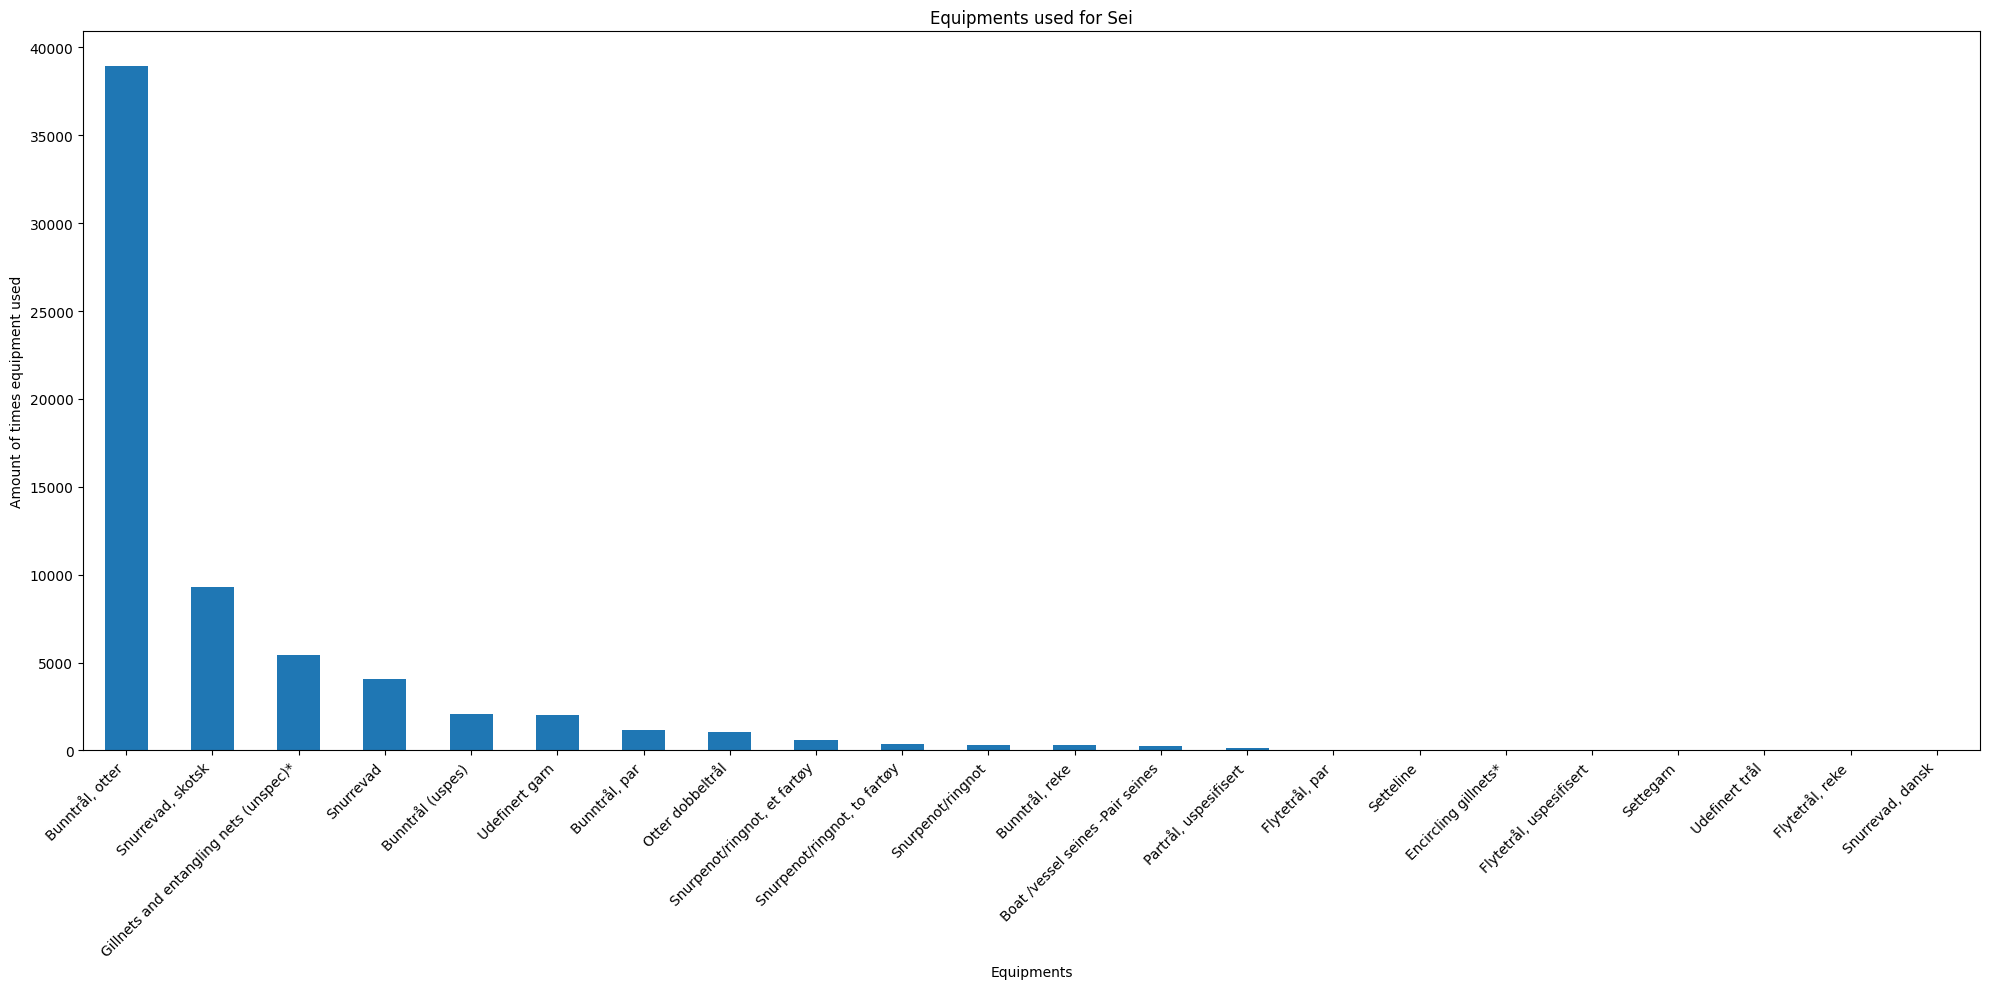

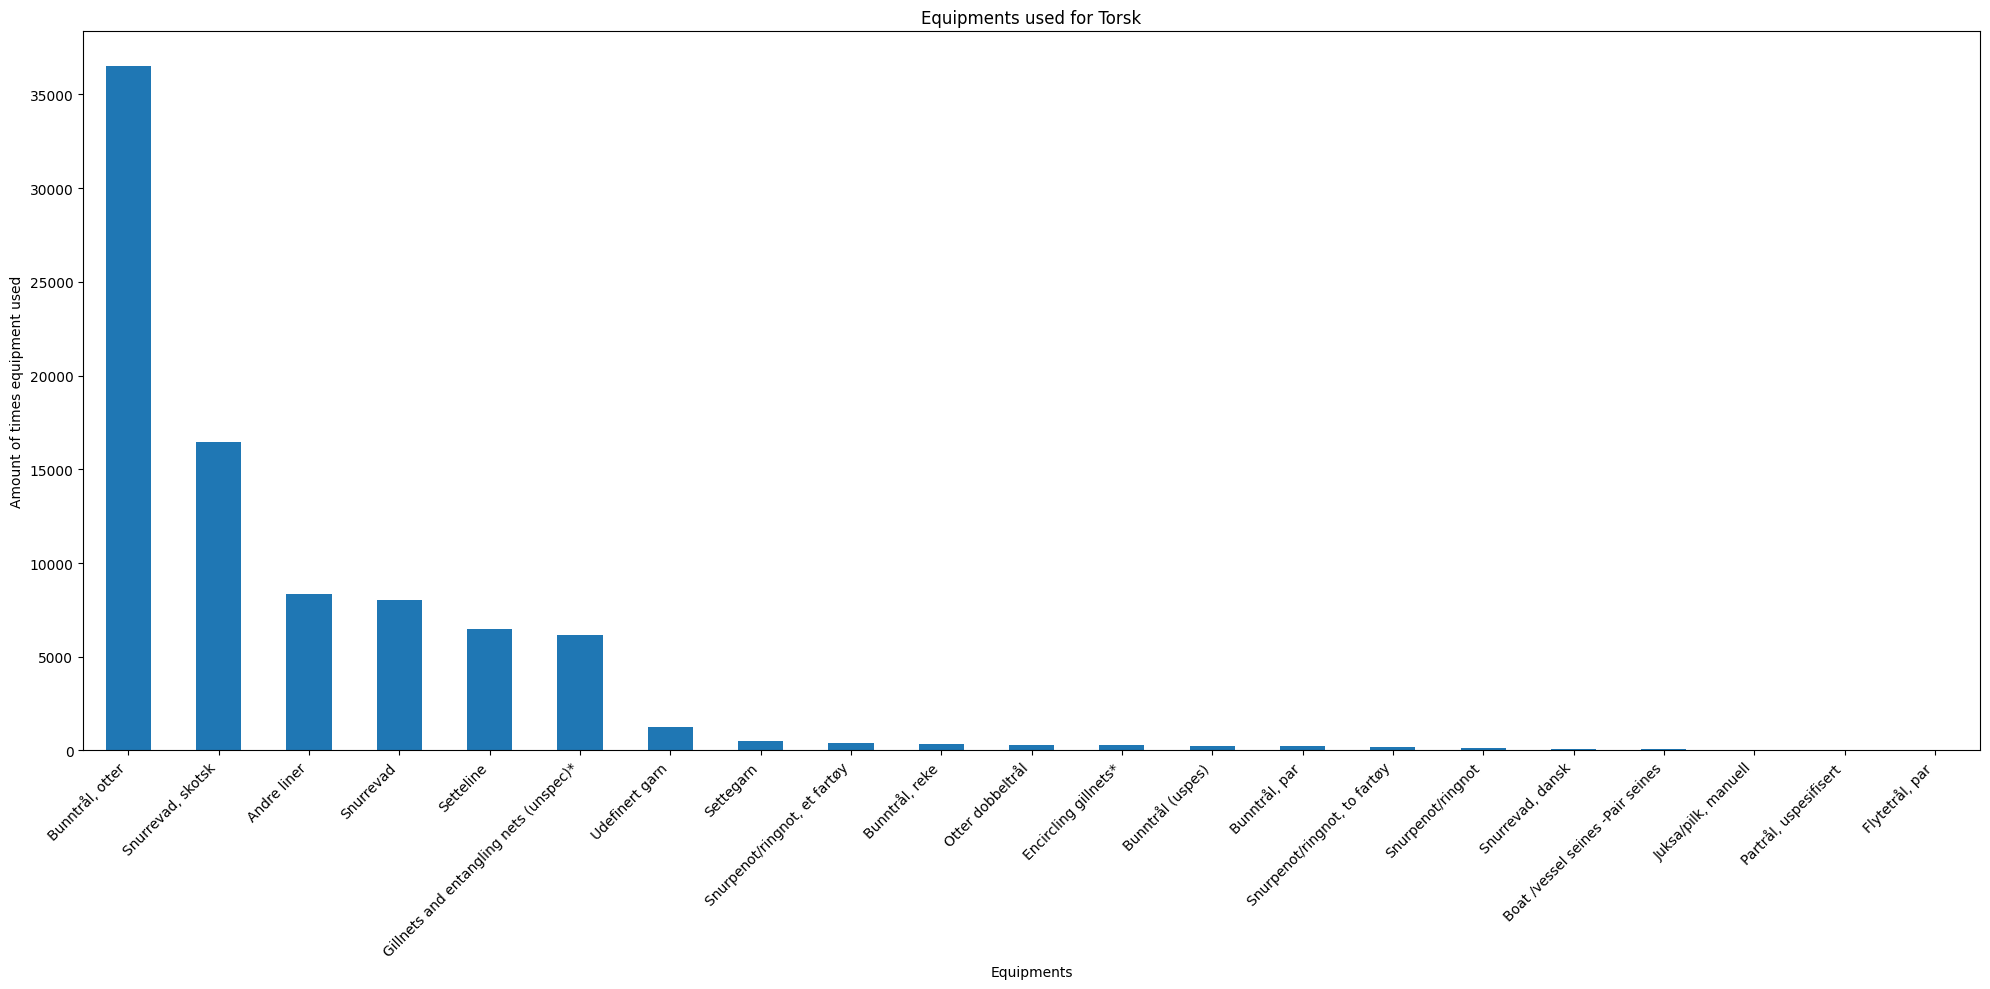

In [36]:
for species, count in total_bycatch_counts[-10:].items():
    # A dataset where the main species is the same as the species we want to see
    species_dataset = dataset[dataset['Hovedart FAO'] == species]
    equipment_counts = species_dataset['Redskap FAO'].value_counts()

    plt.figure(figsize=(20, 10)) 

    equipment_counts.plot(kind = "bar")


    plt.title(f'Equipments used for catching {species}') 
    plt.xlabel('Equipments') 
    plt.ylabel('Amount of times equipment used')
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

Only catches without bycatches are antarctic species

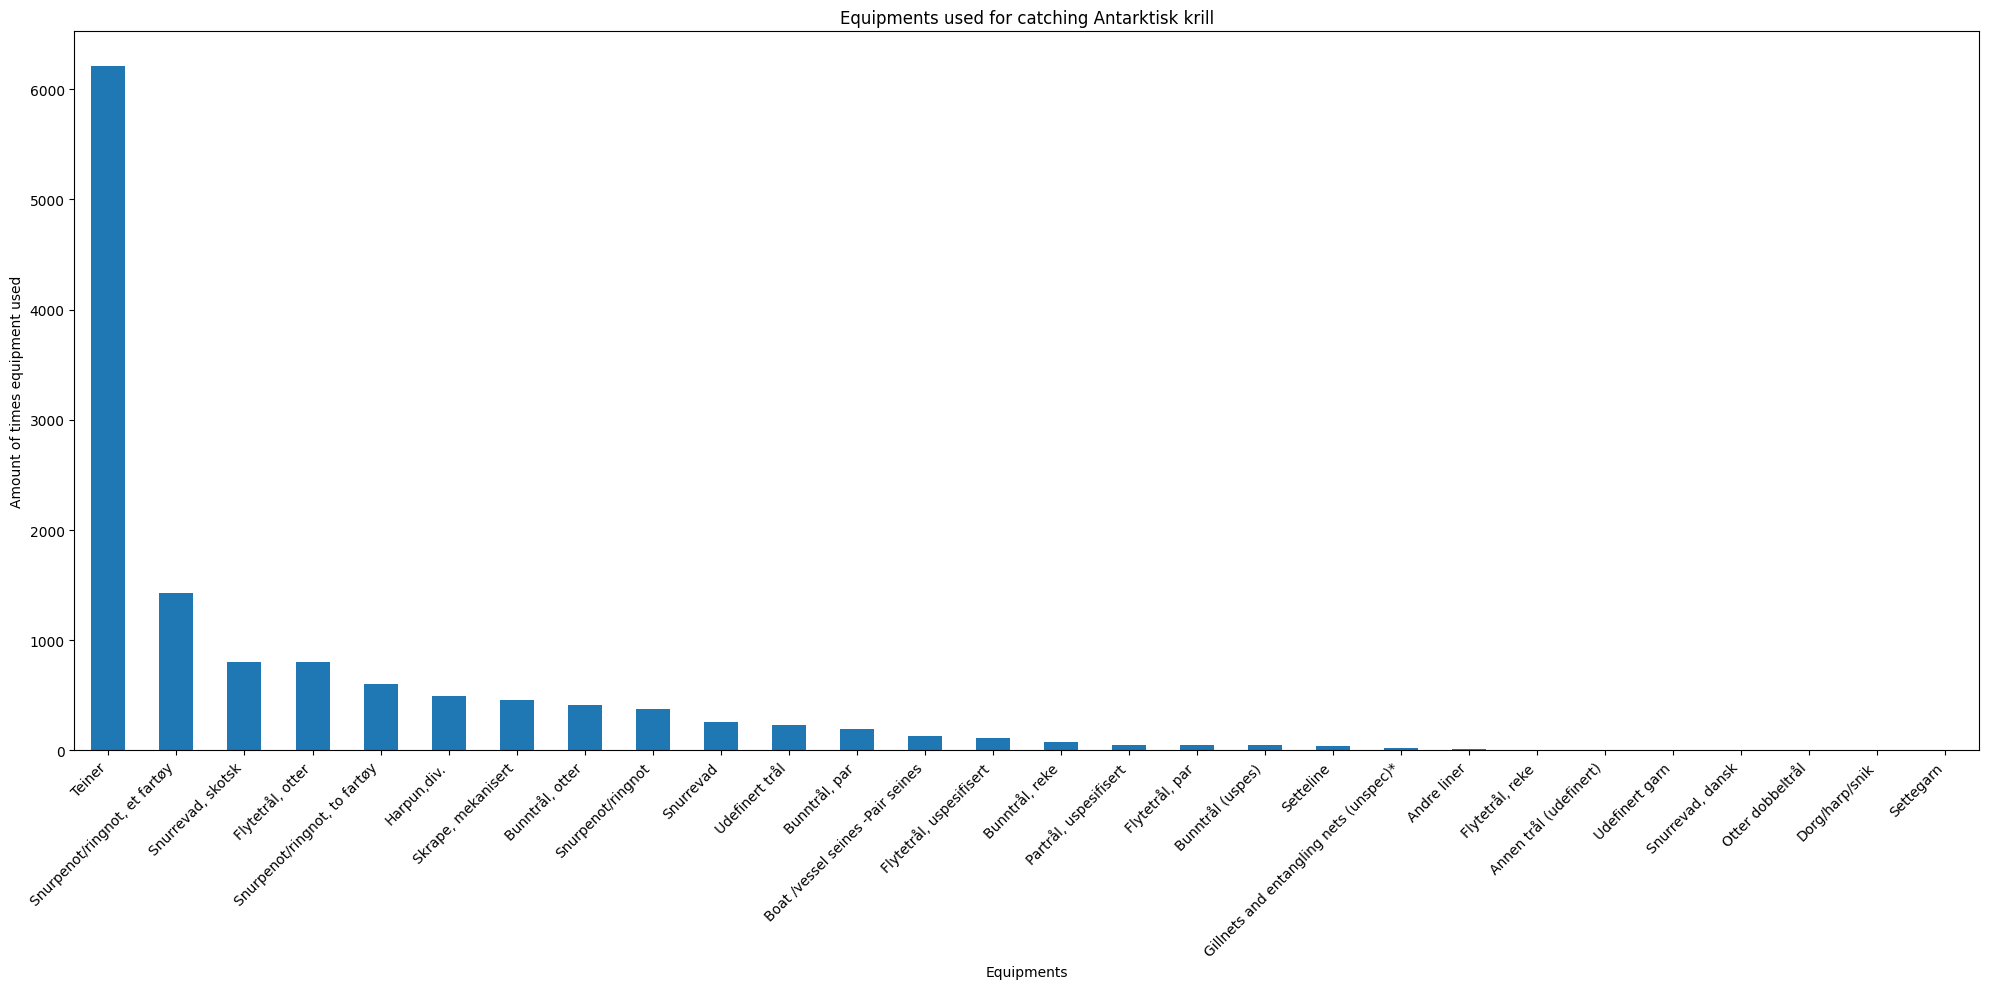

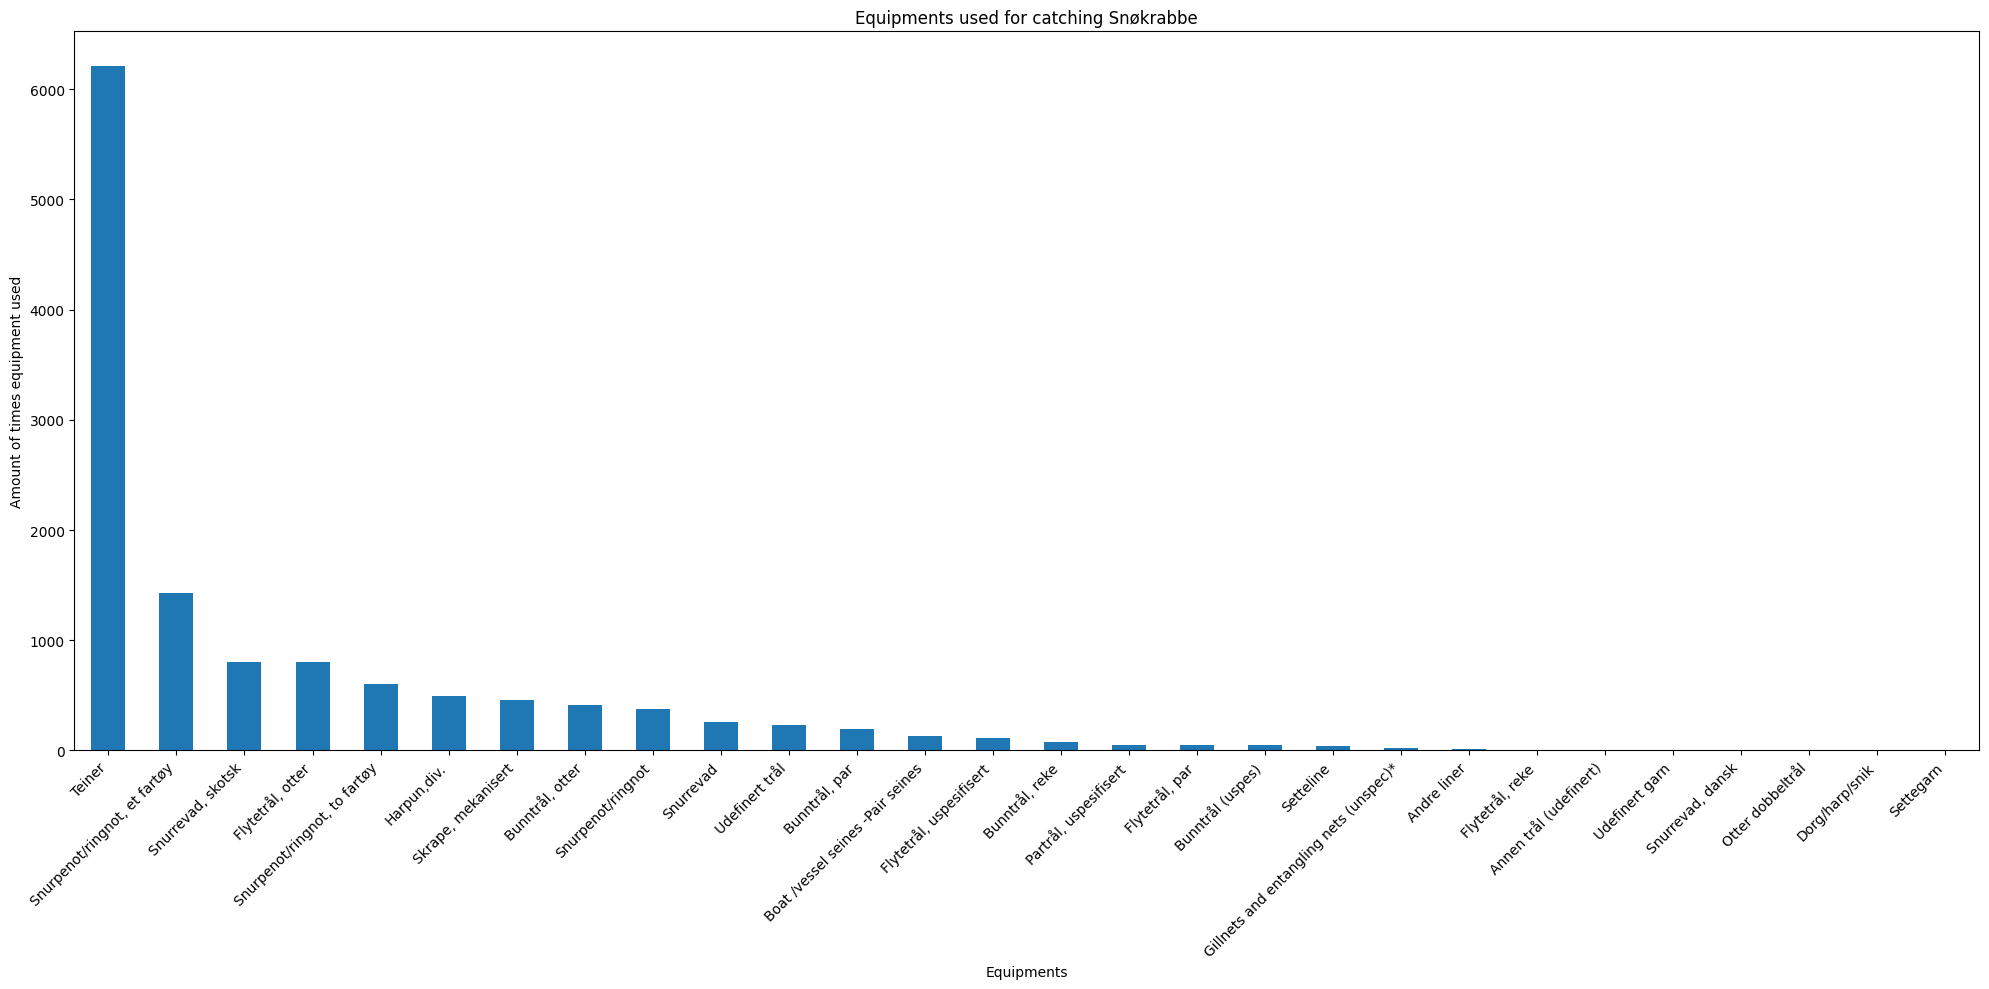

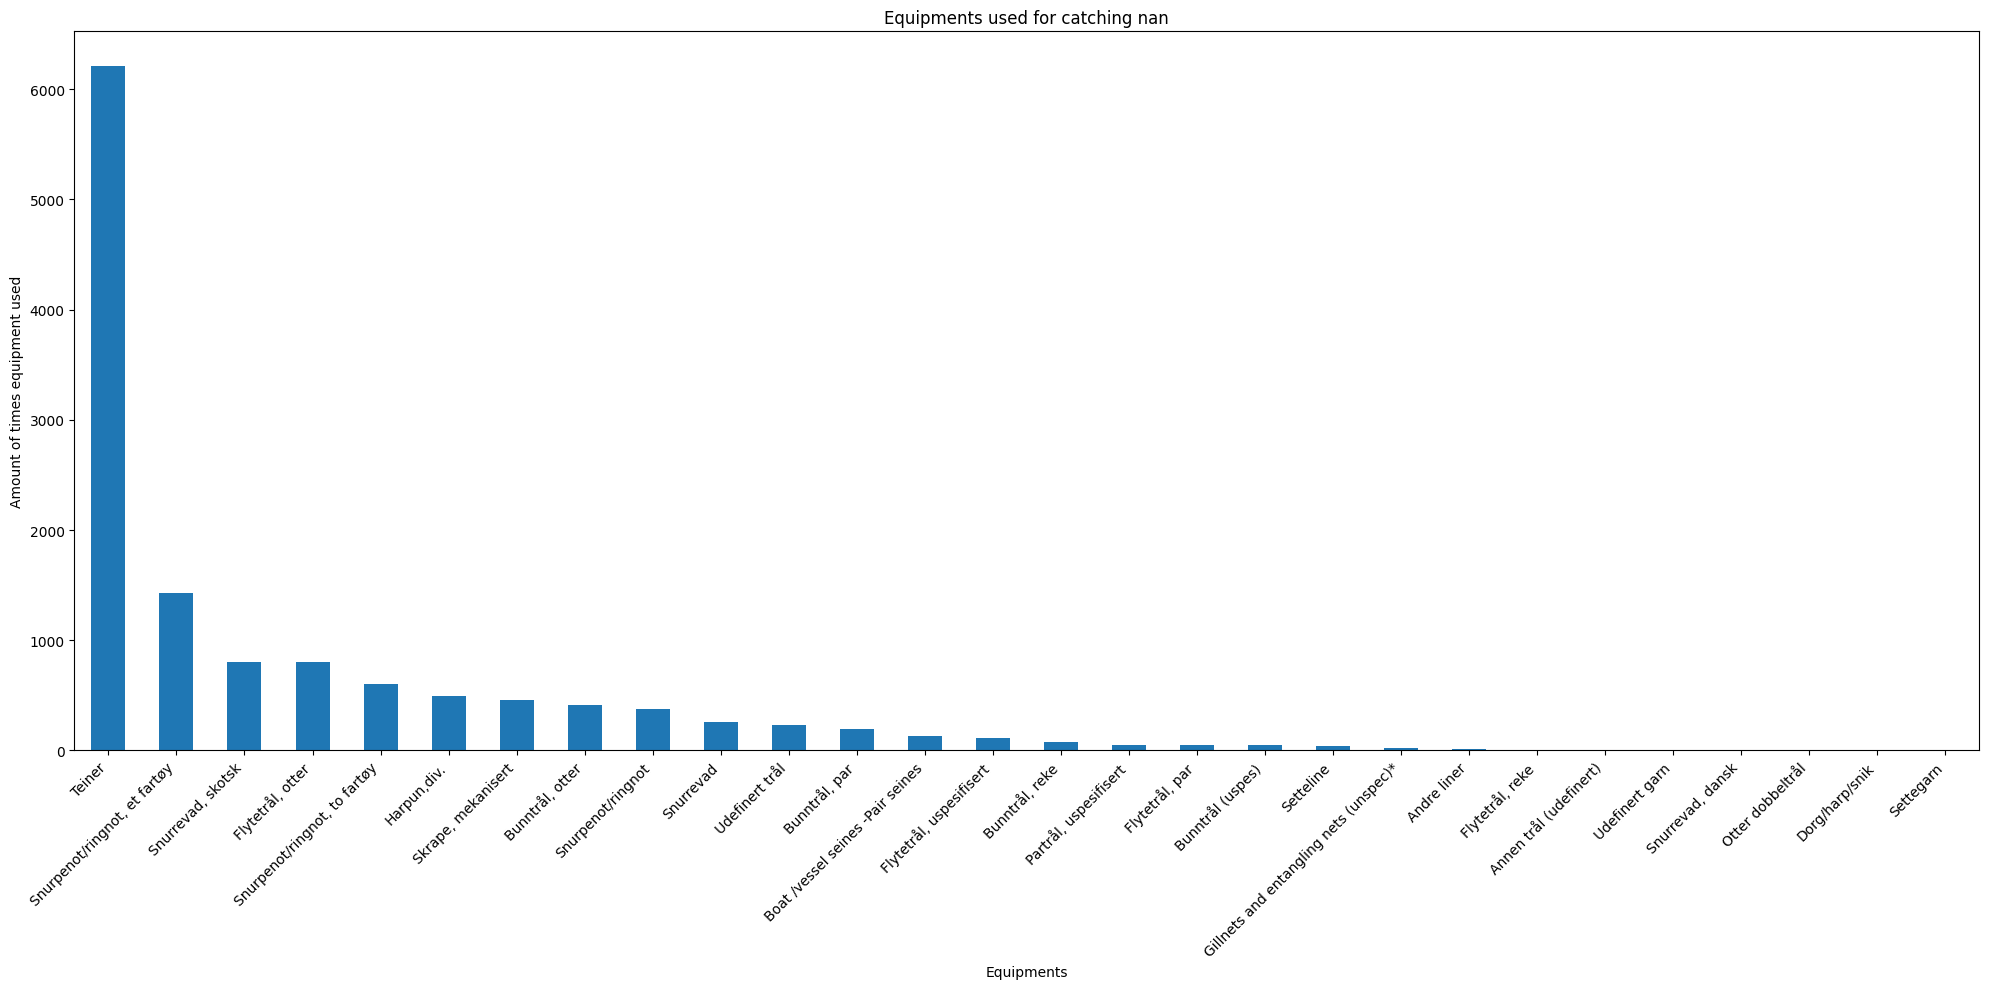

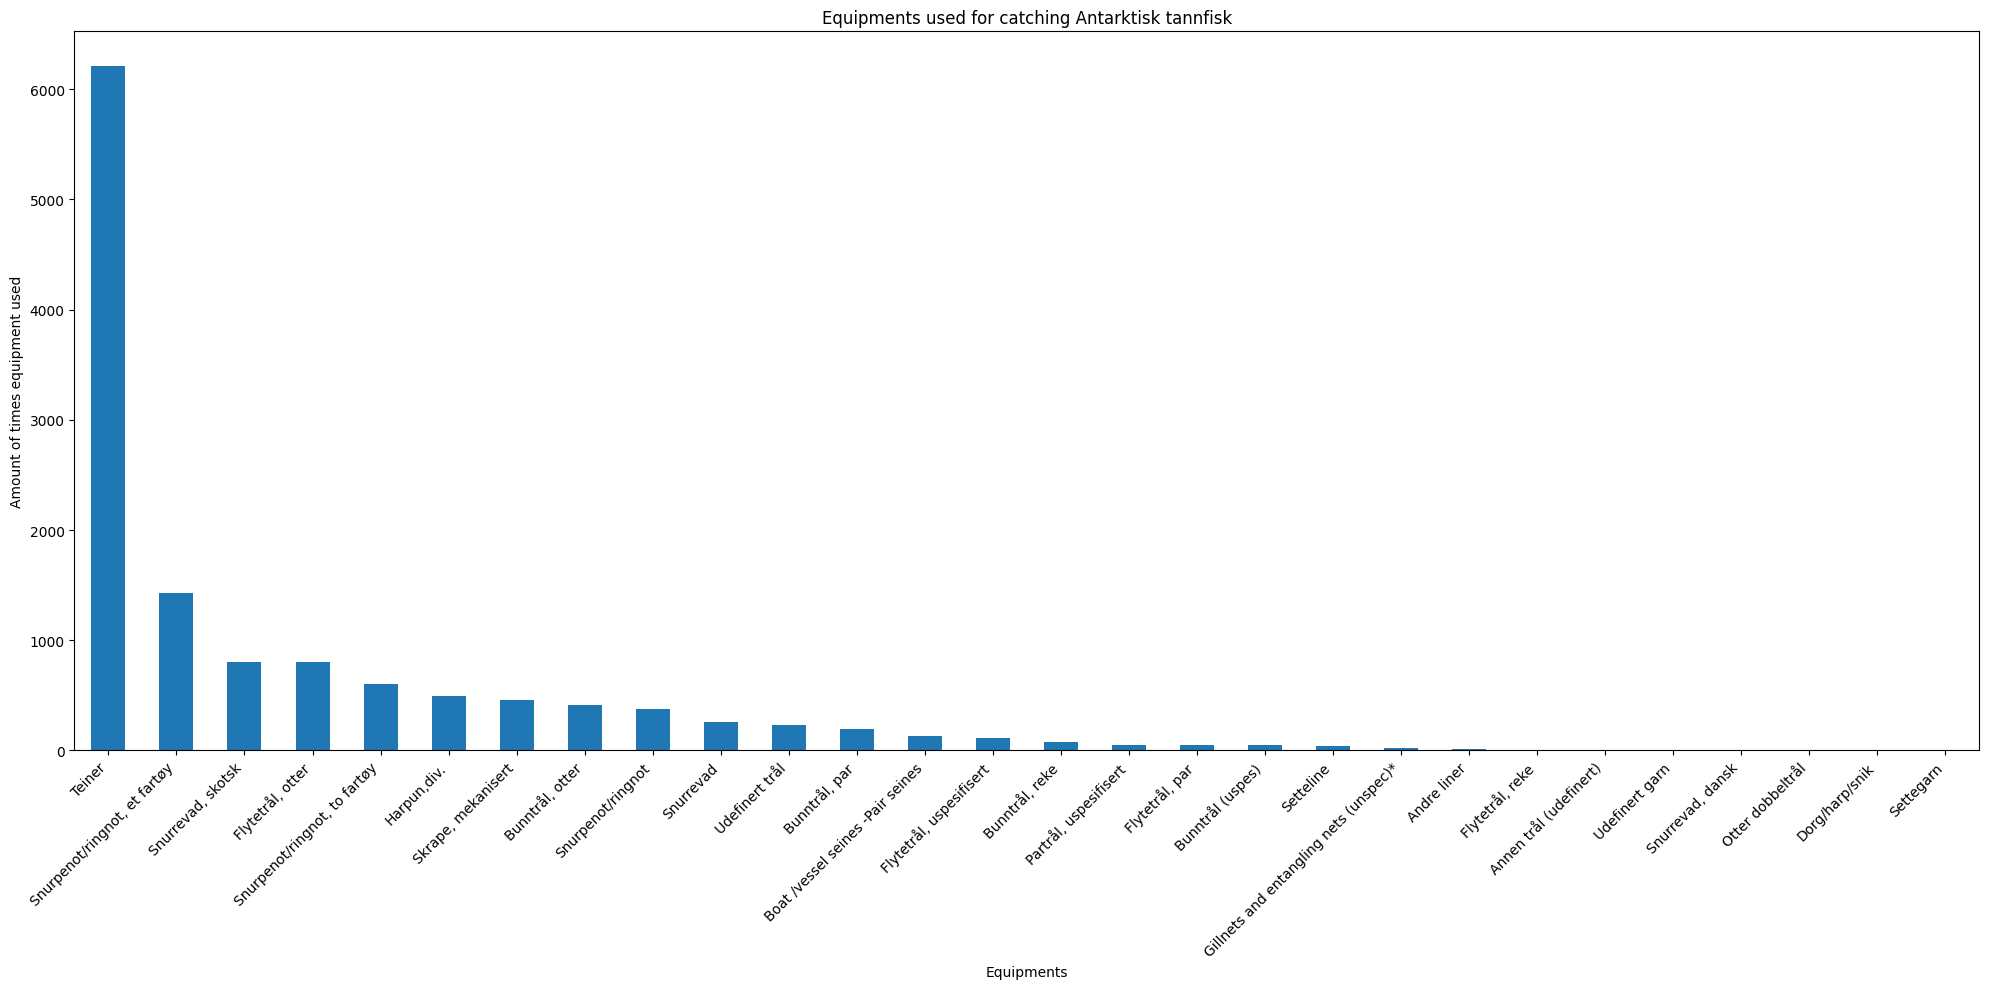

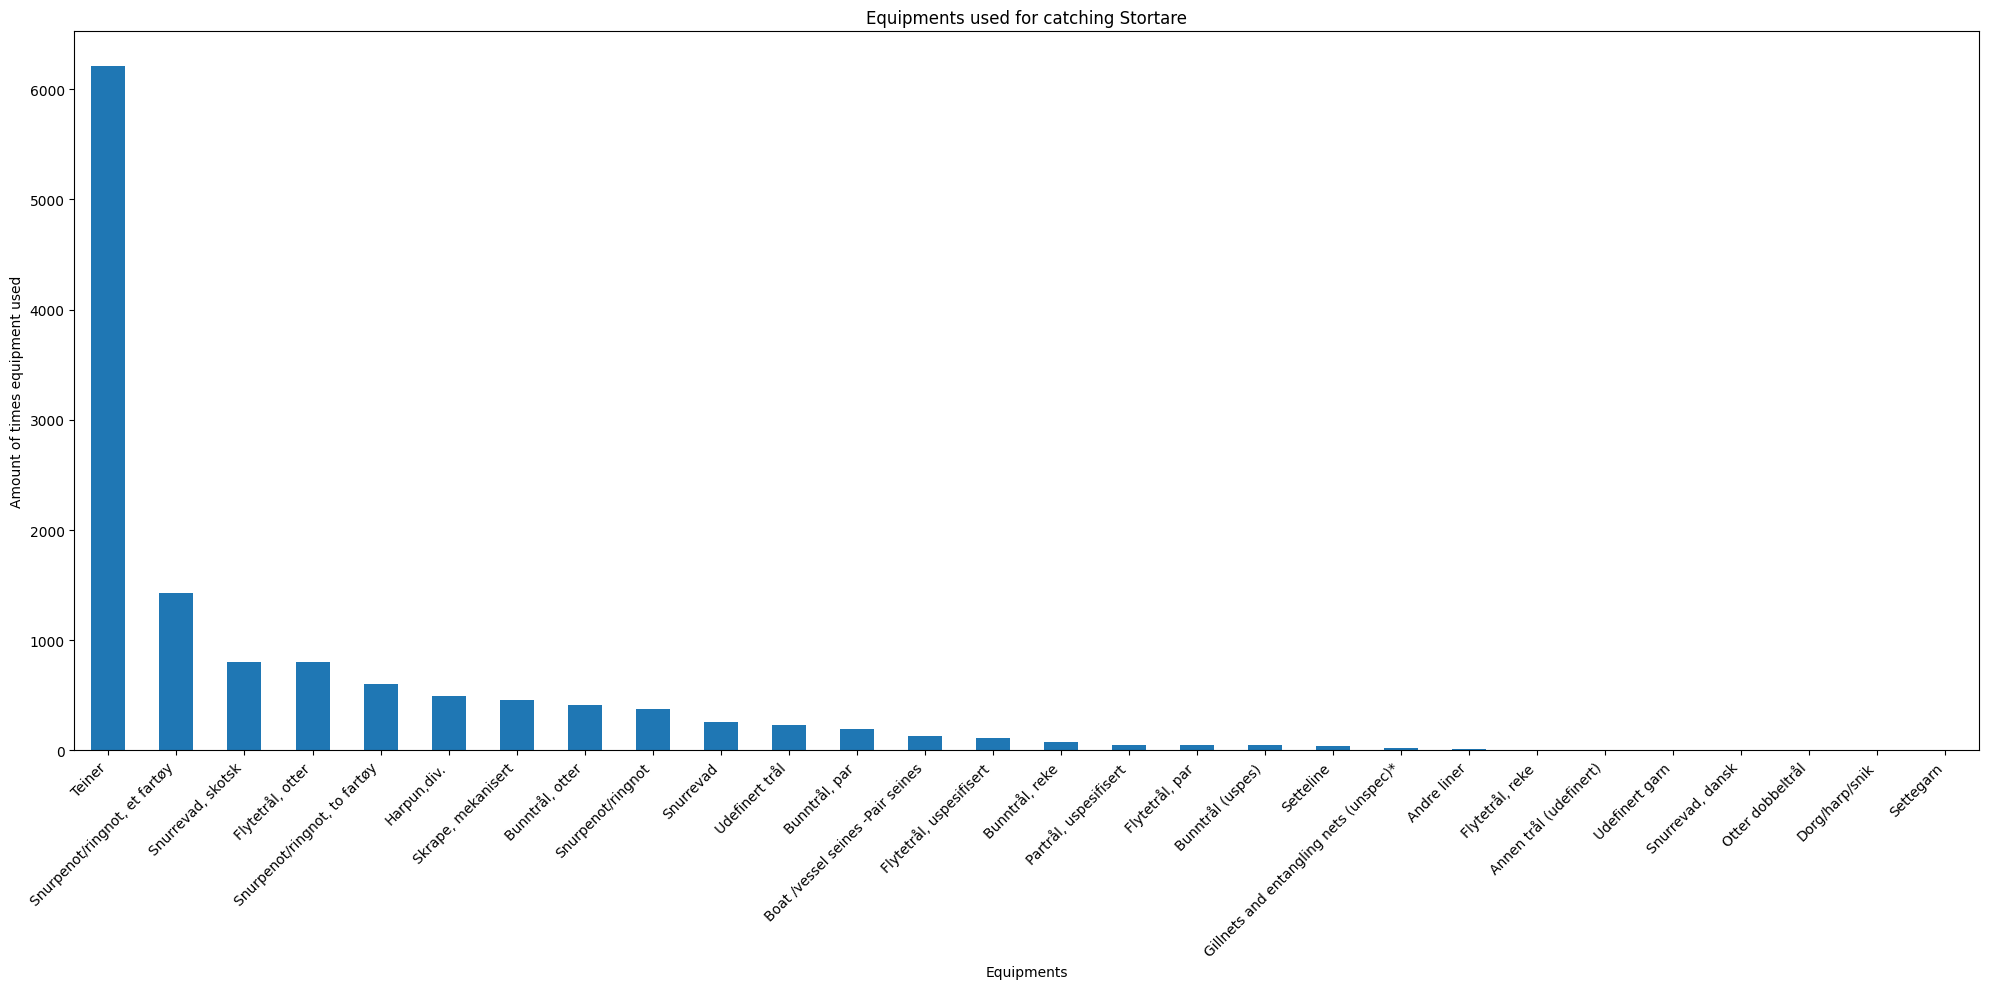

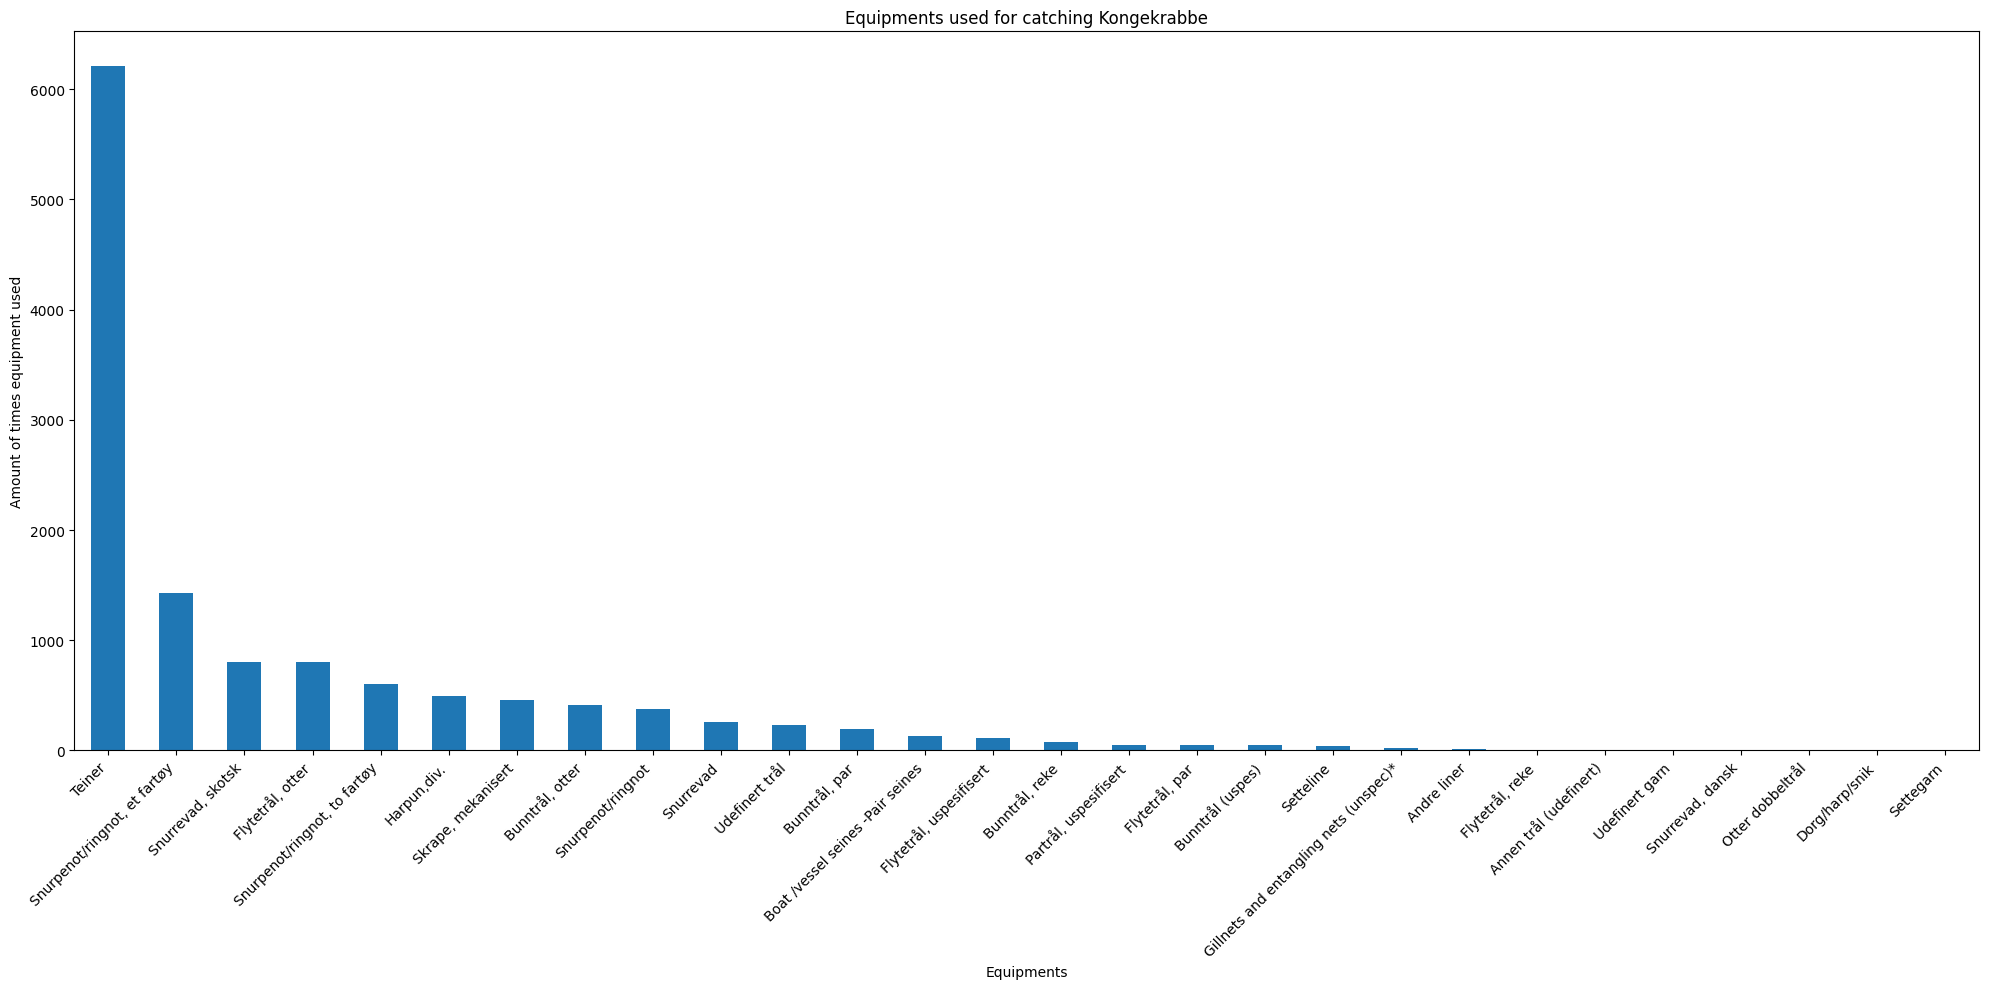

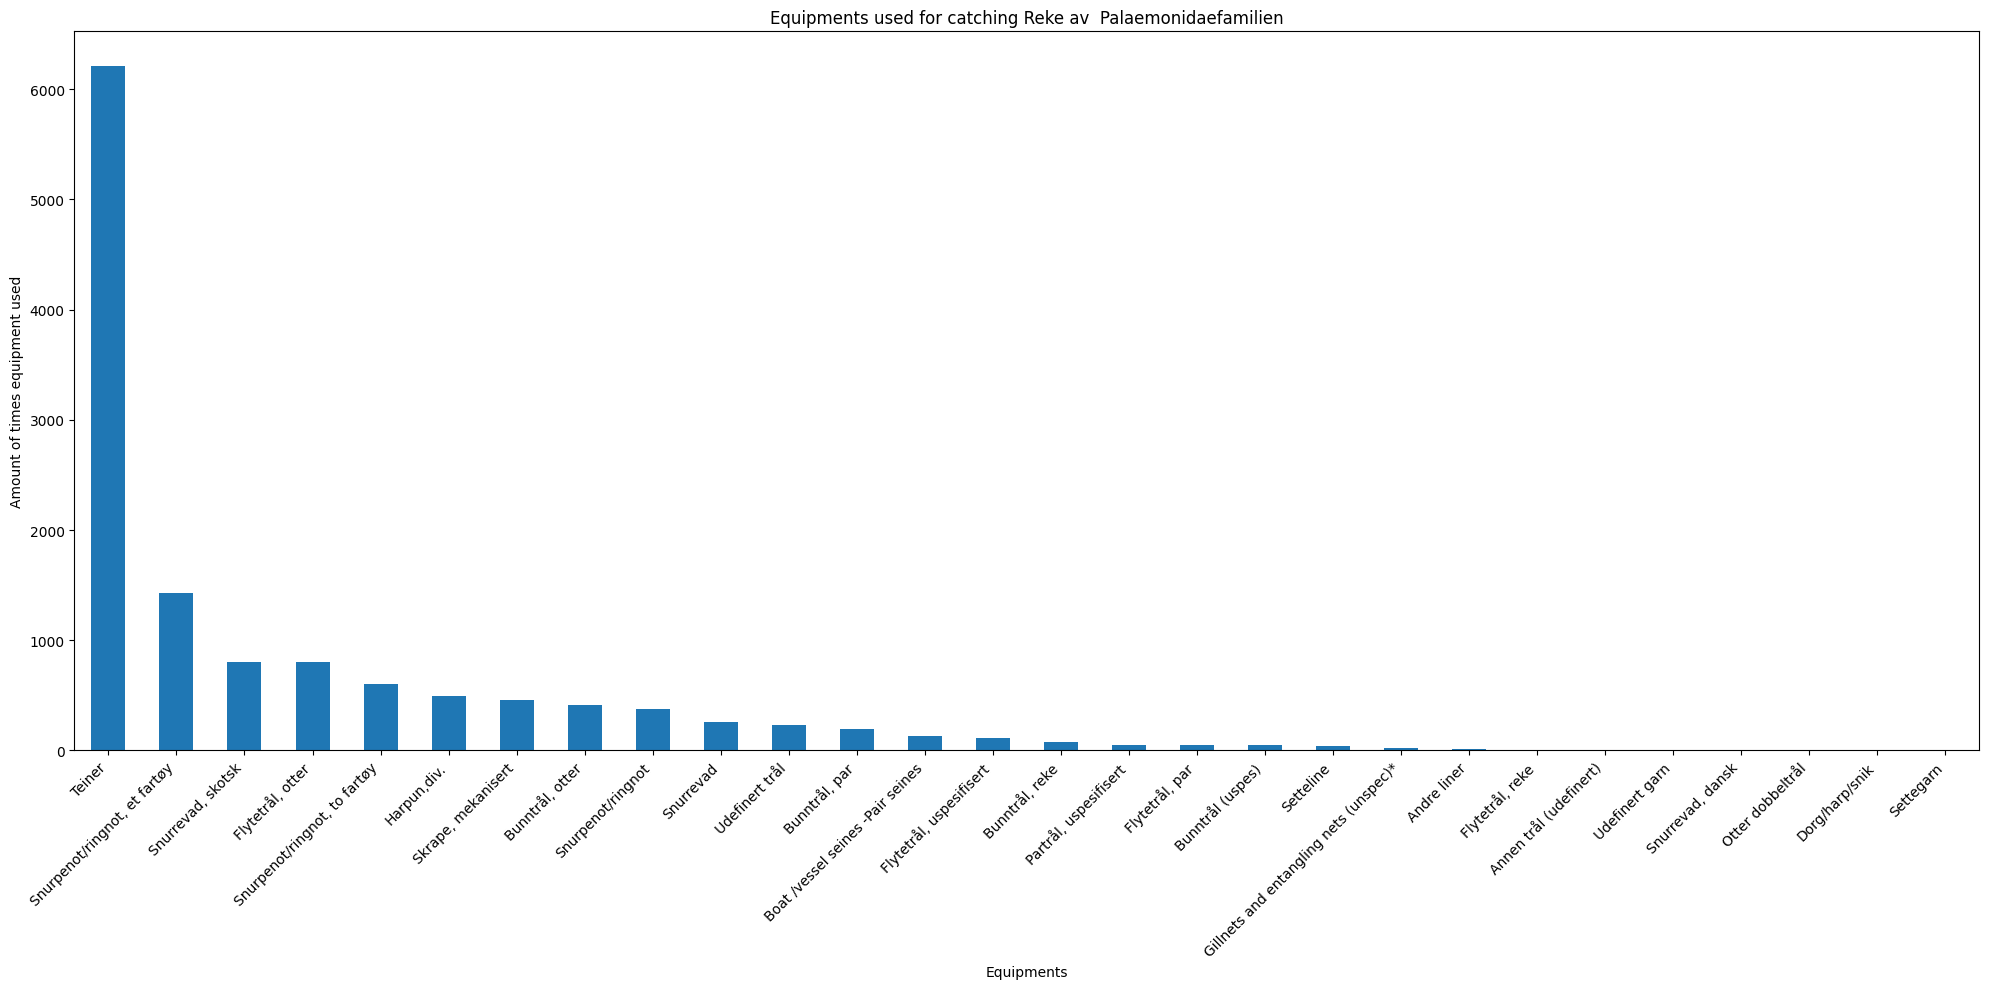

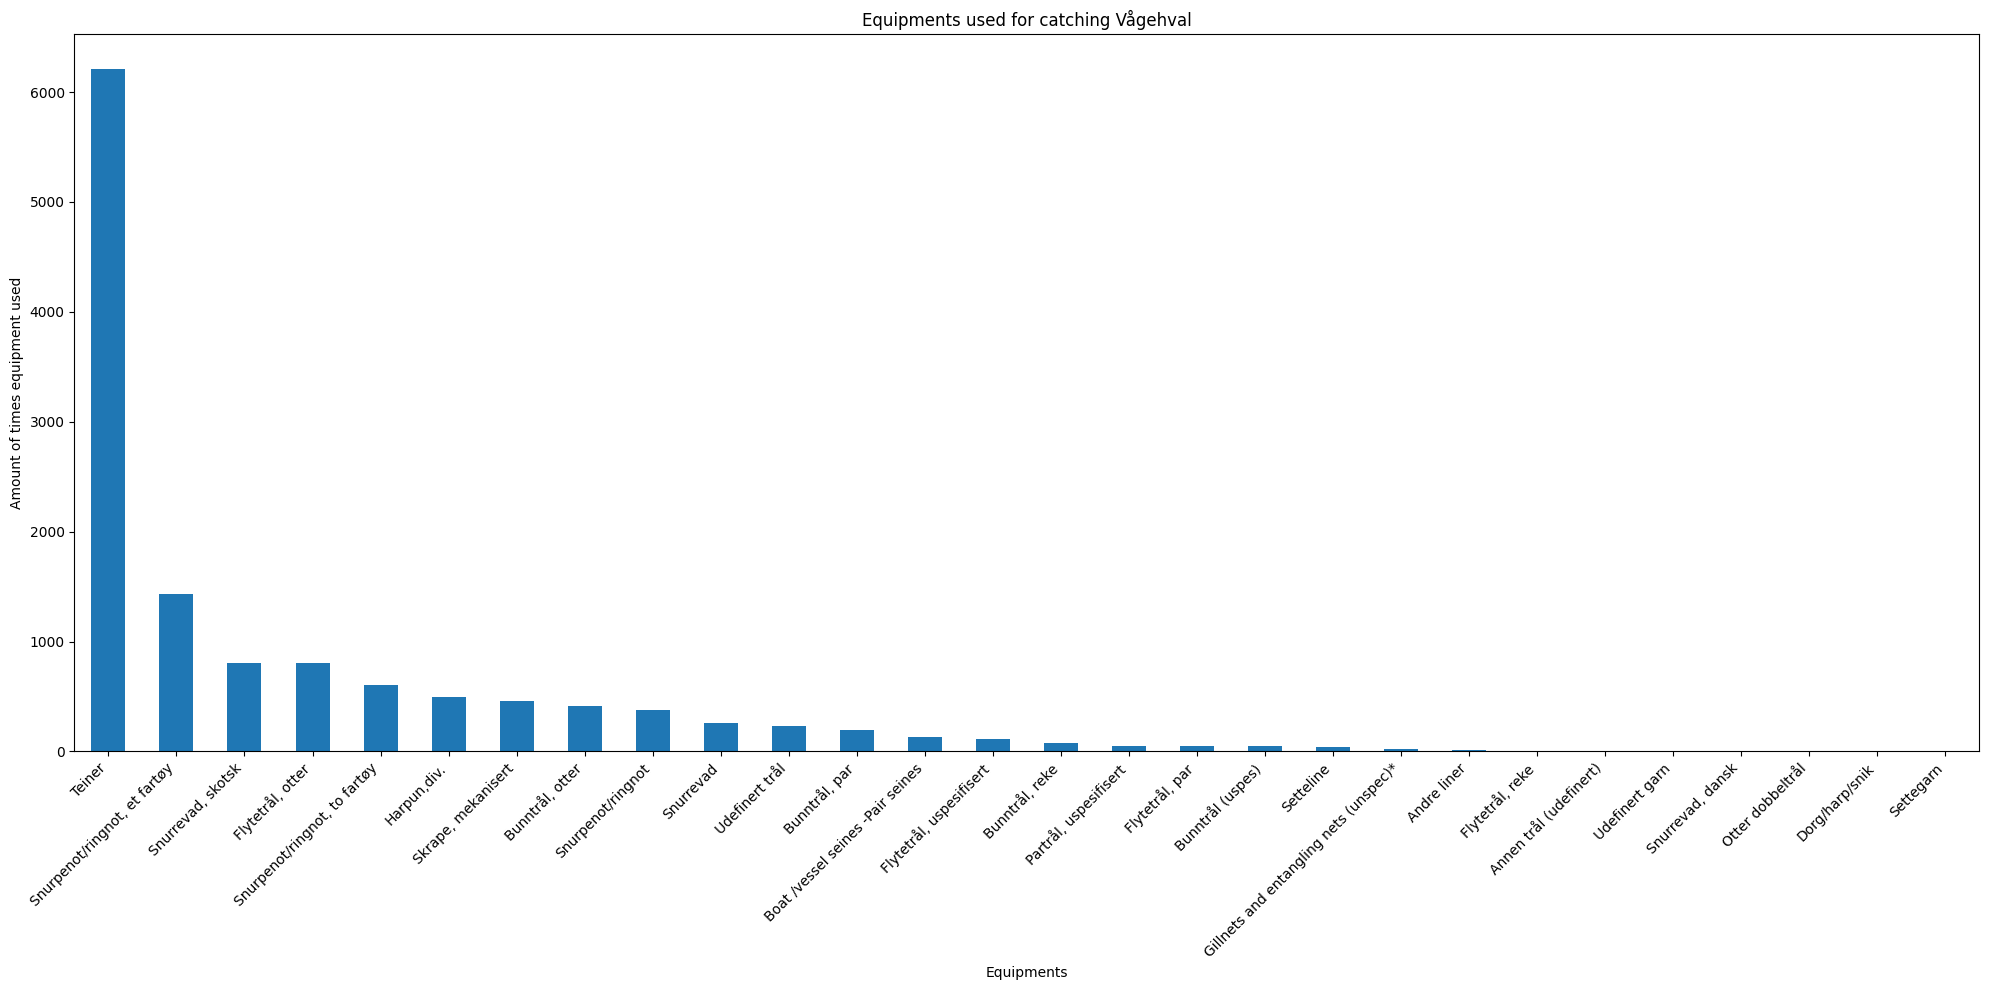

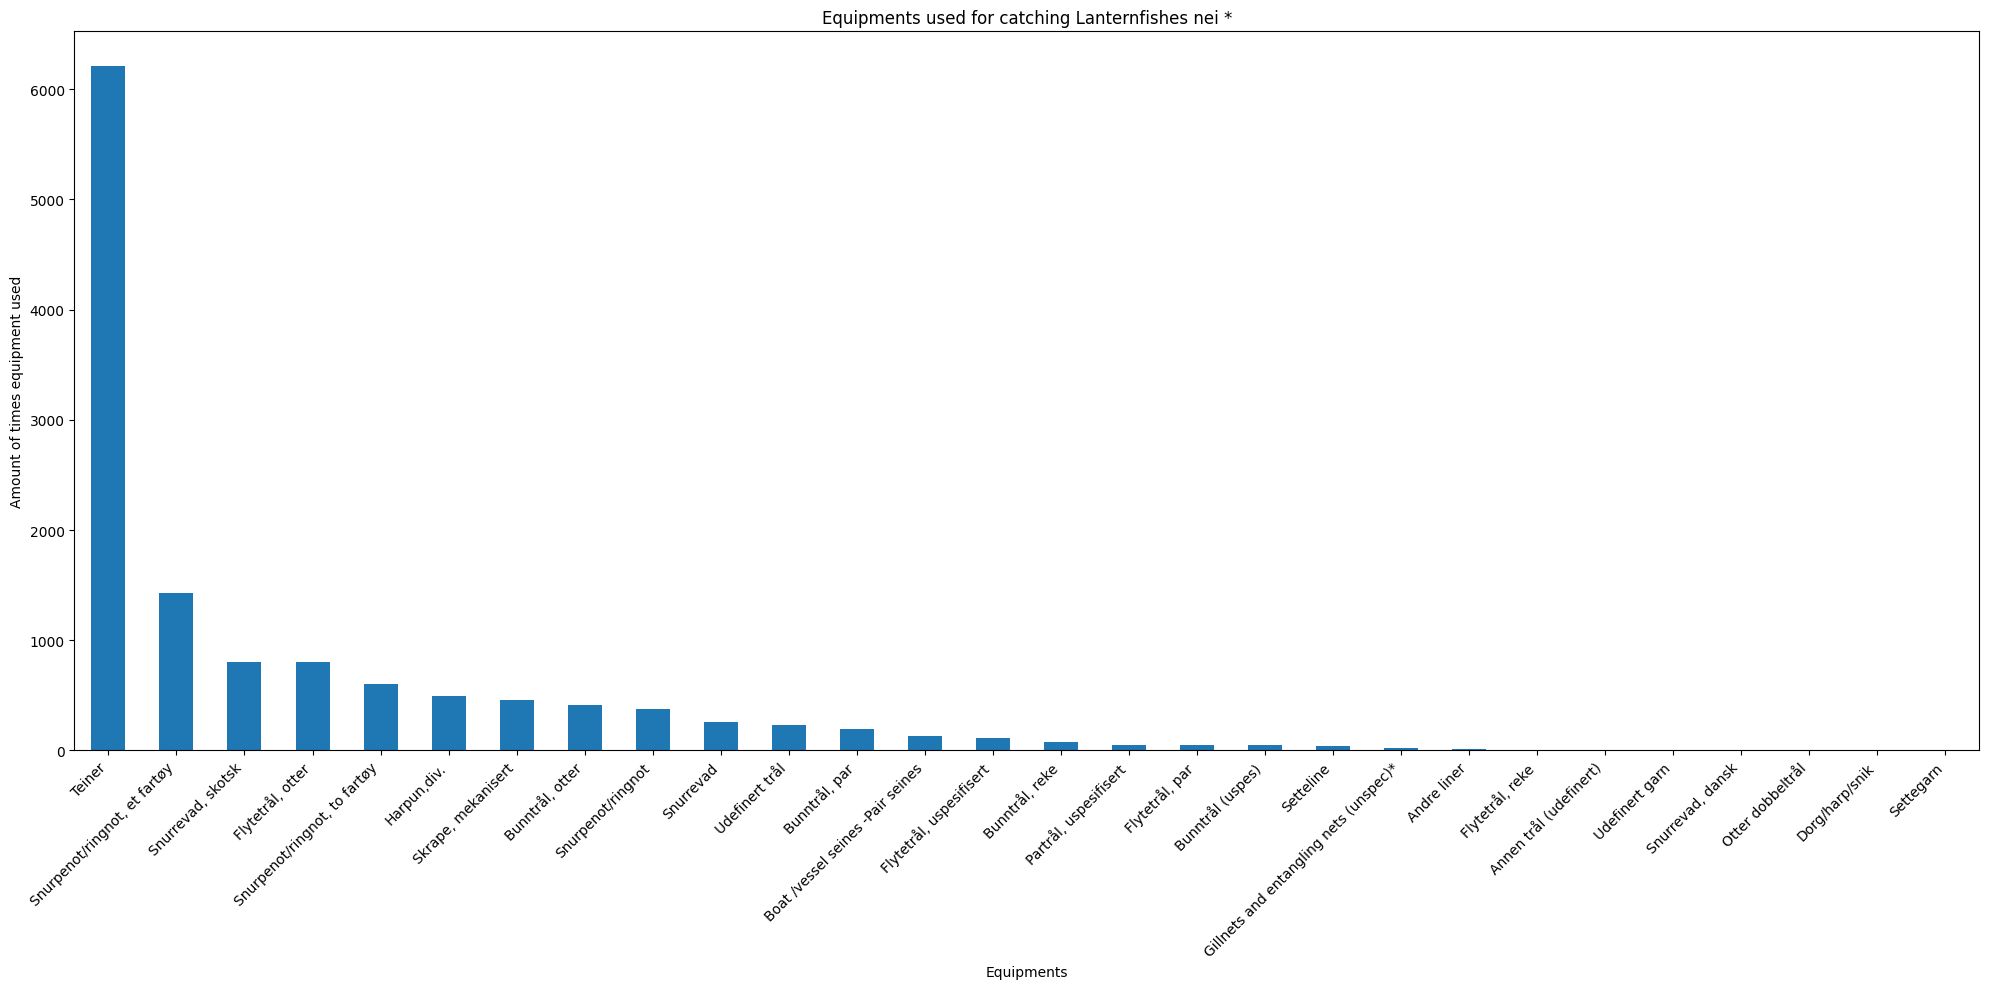

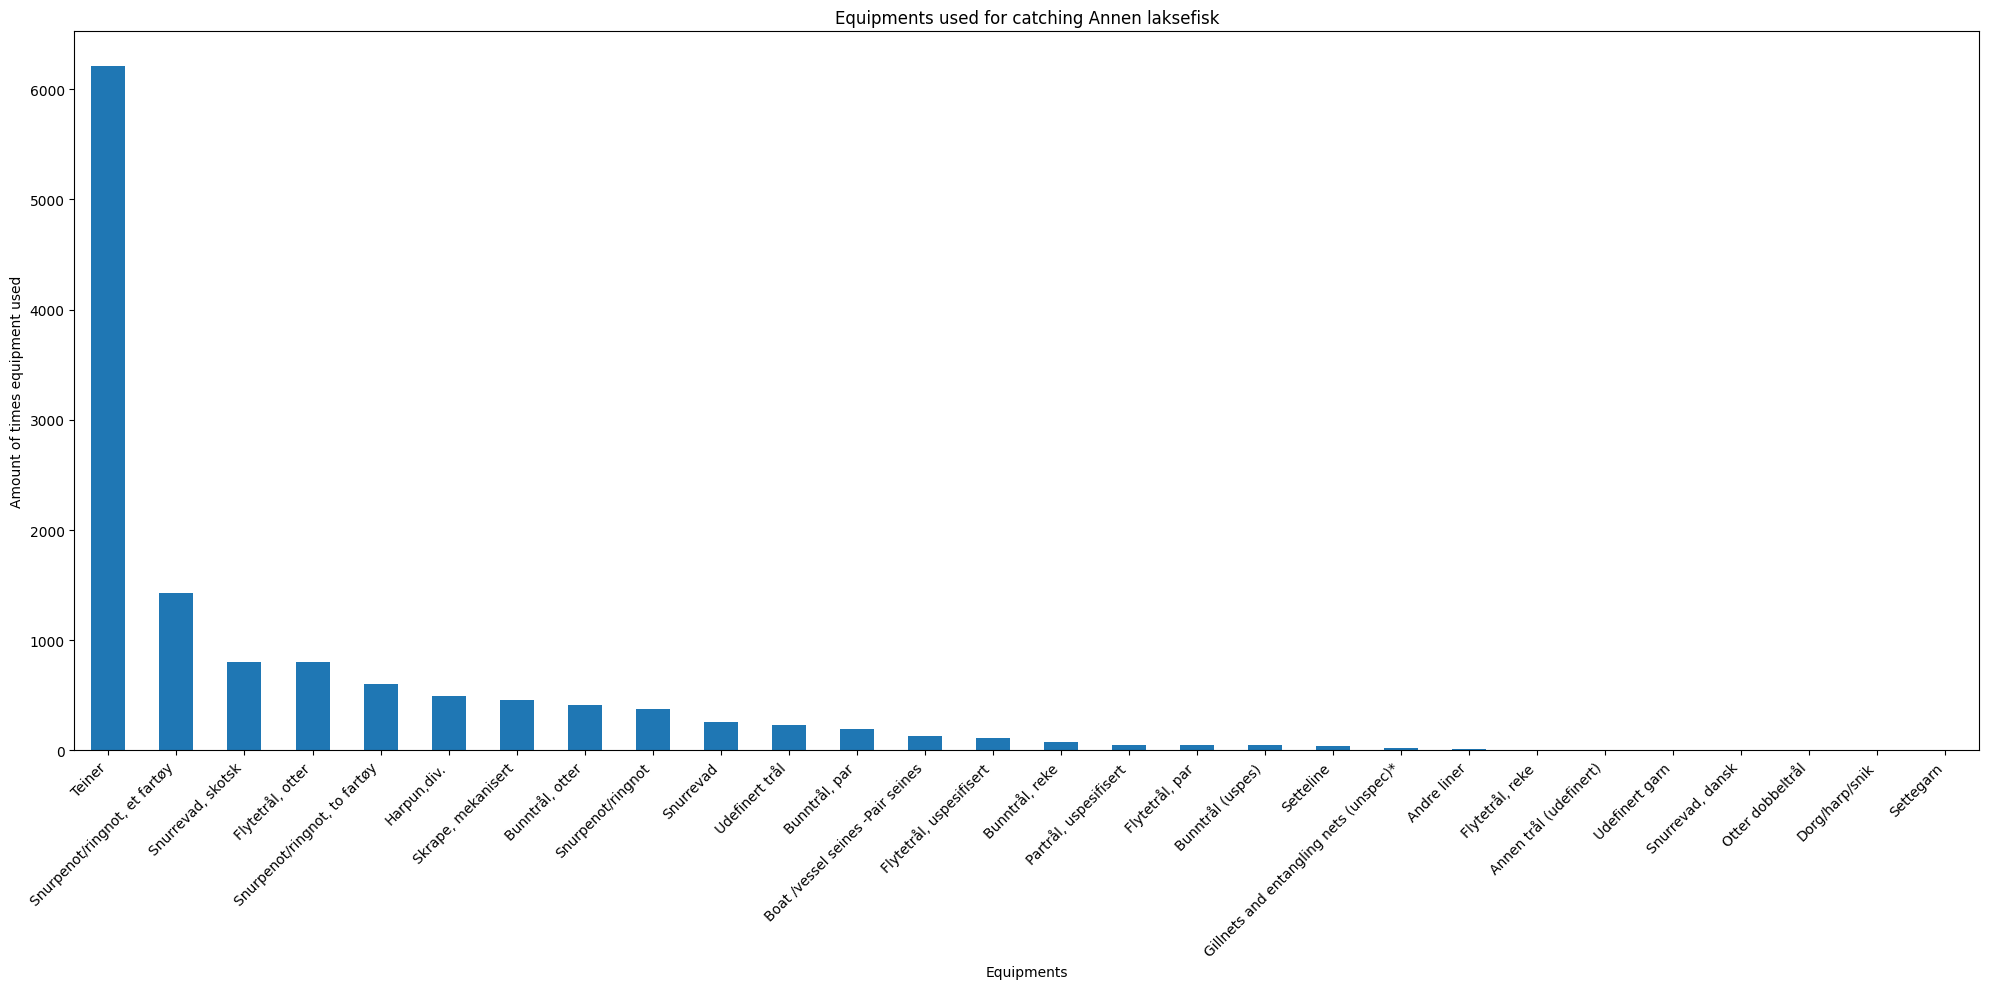

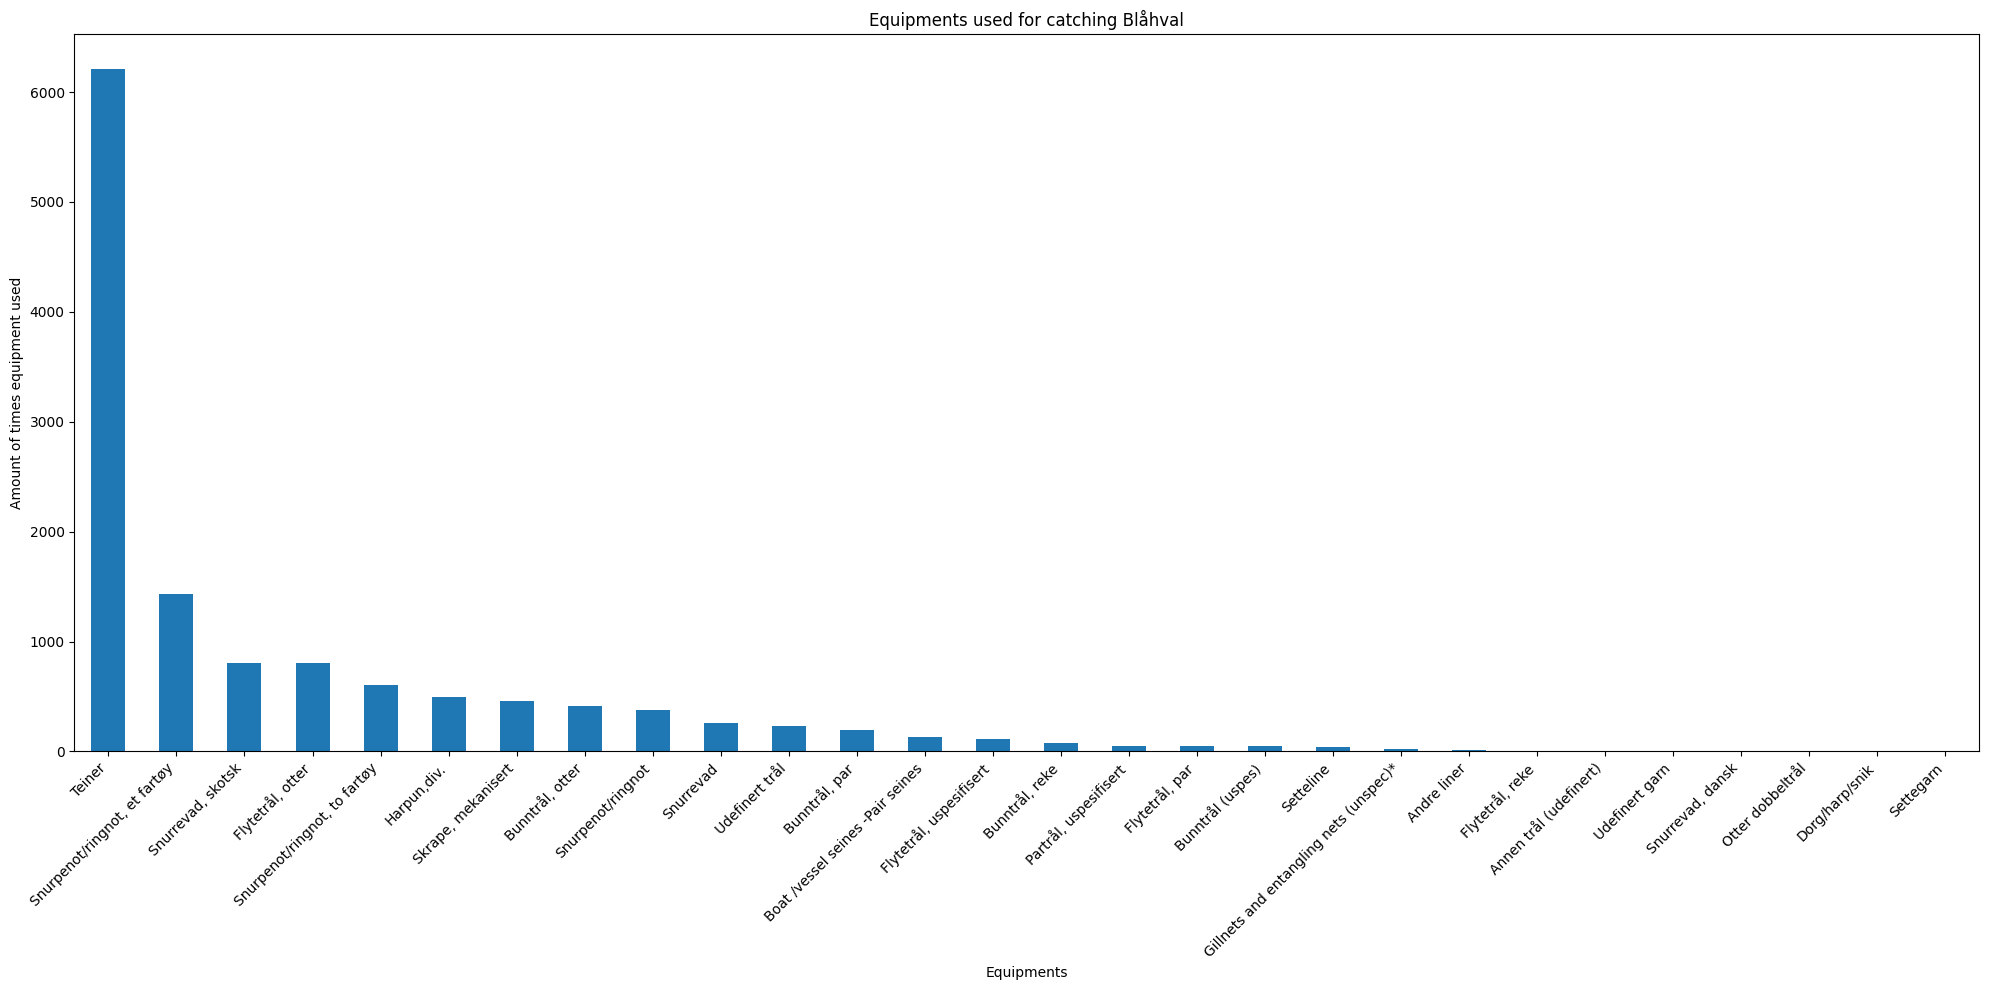

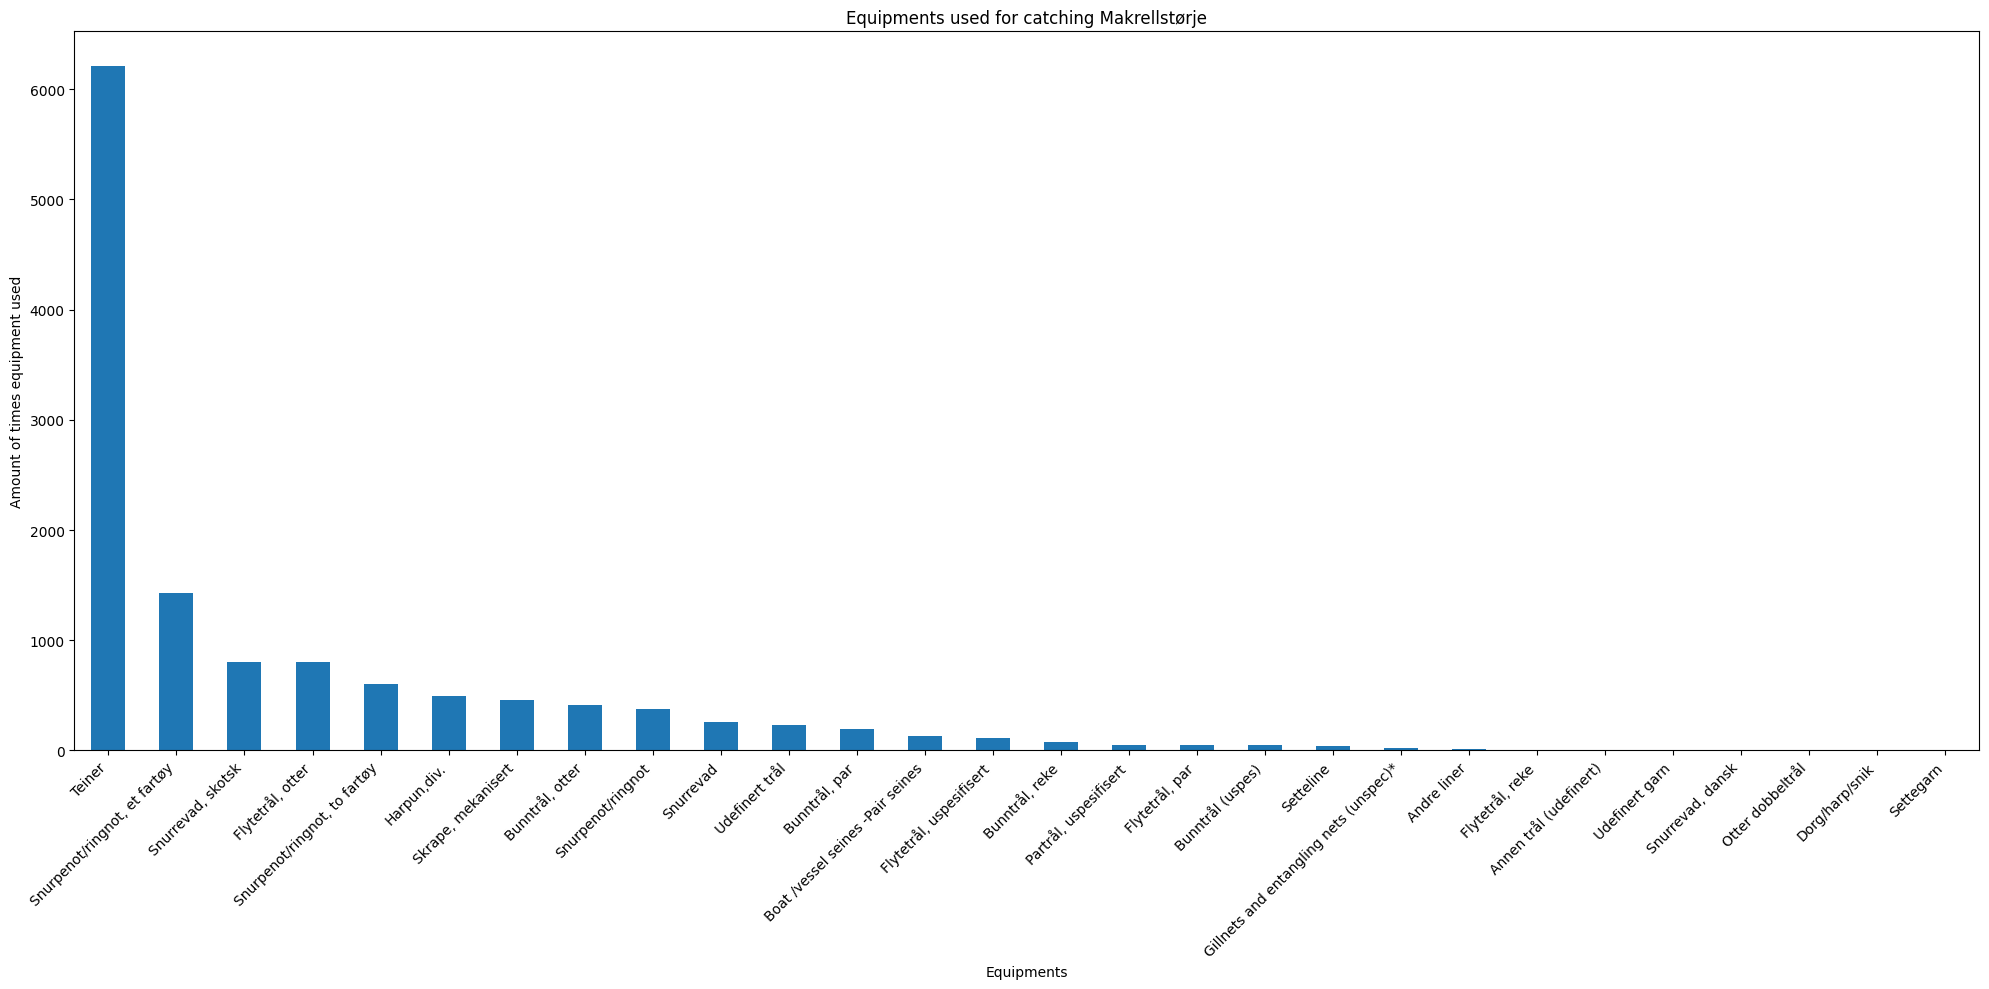

In [68]:
all_species = dataset['Hovedart FAO'].unique()

species_with_bycatch = list(bycatch_weight_per_group.keys())

species_with_bycatch = [s[0] for s in species_with_bycatch]  

# Find species without bycatch
species_without_bycatch = [species for species in all_species if species not in species_with_bycatch]

# Filtering dataset for species without bycatch
no_bycatch_dataset = dataset[dataset['Hovedart FAO'].isin(species_without_bycatch)]
no_bycatch_species = no_bycatch_dataset['Hovedart FAO'].unique()
no_bycatch_equipment = no_bycatch_dataset['Redskap FAO'].value_counts()
for species in no_bycatch_species:
    plt.figure(figsize=(20, 10)) 

    no_bycatch_equipment.plot(kind = "bar")


    plt.title(f'Equipments used for catching {species}') 
    plt.xlabel('Equipments') 
    plt.ylabel('Amount of times equipment used')
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

Want to see the equipment used to catch each of the bottom 10 species that has over 50 entries

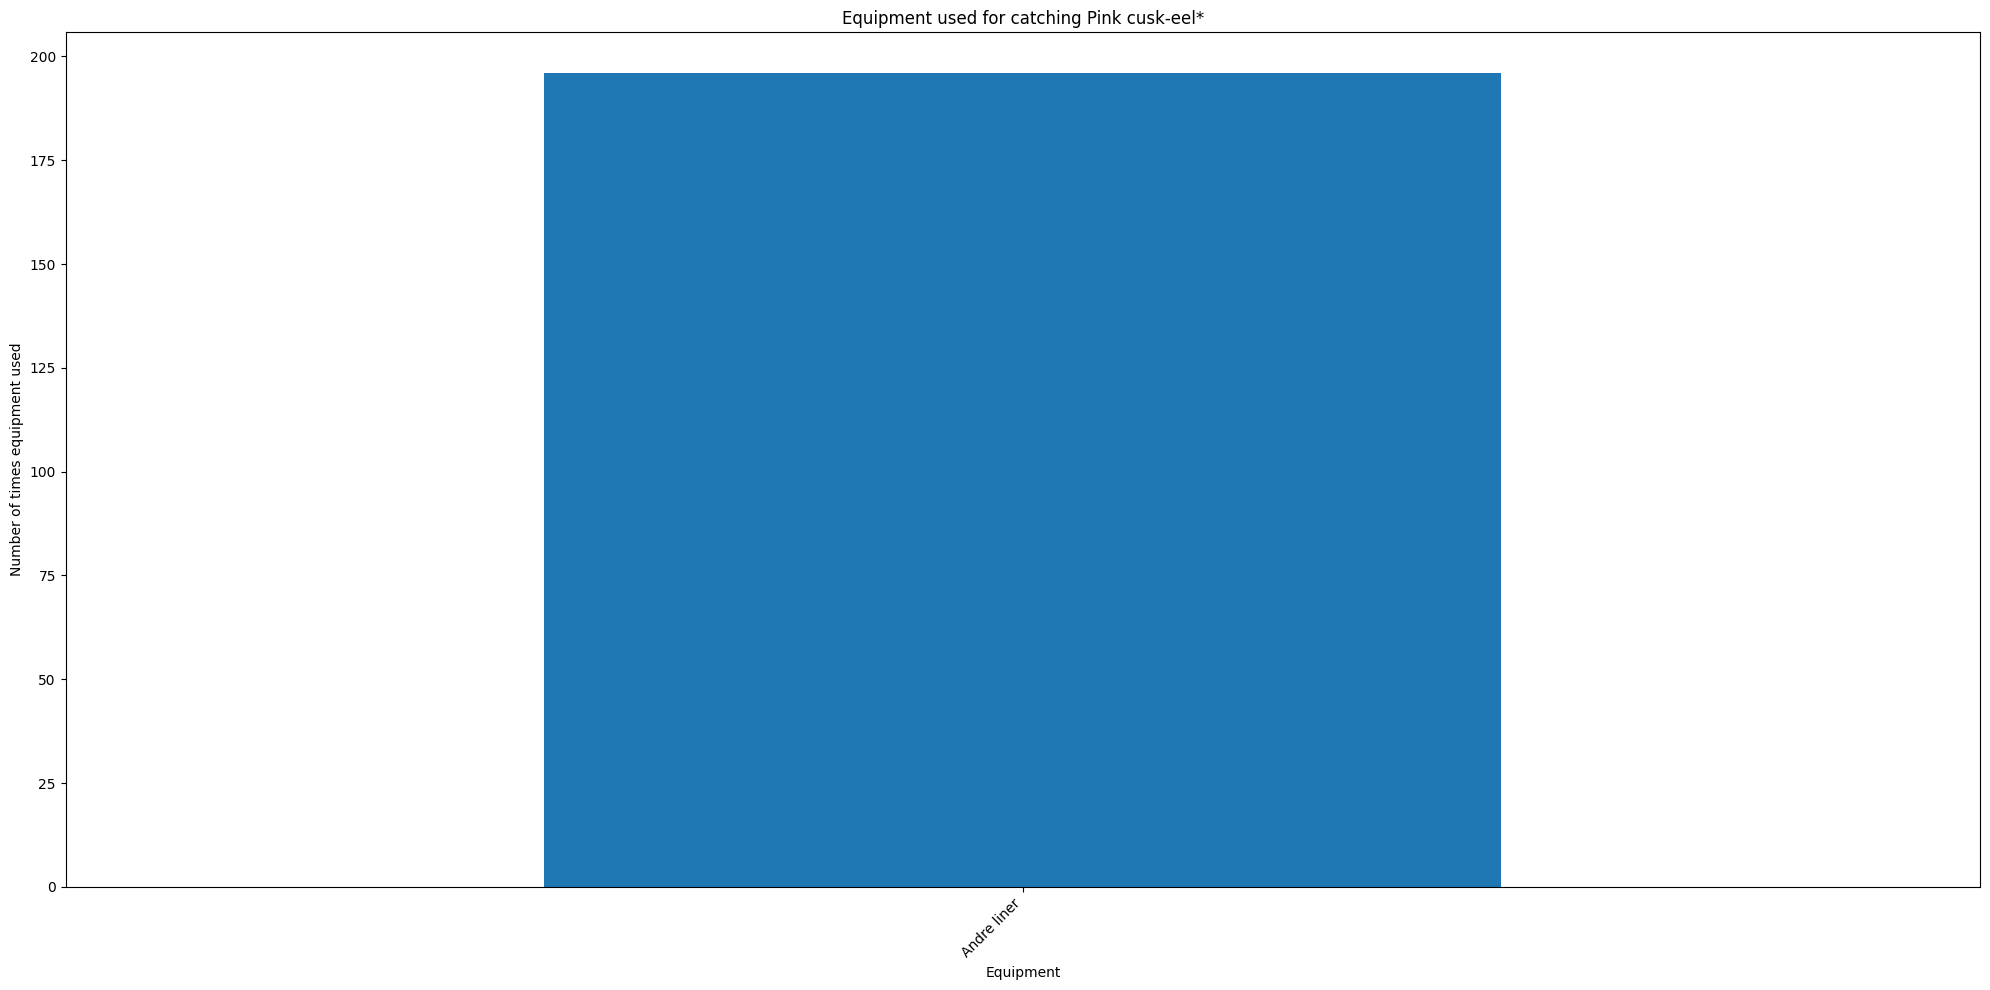

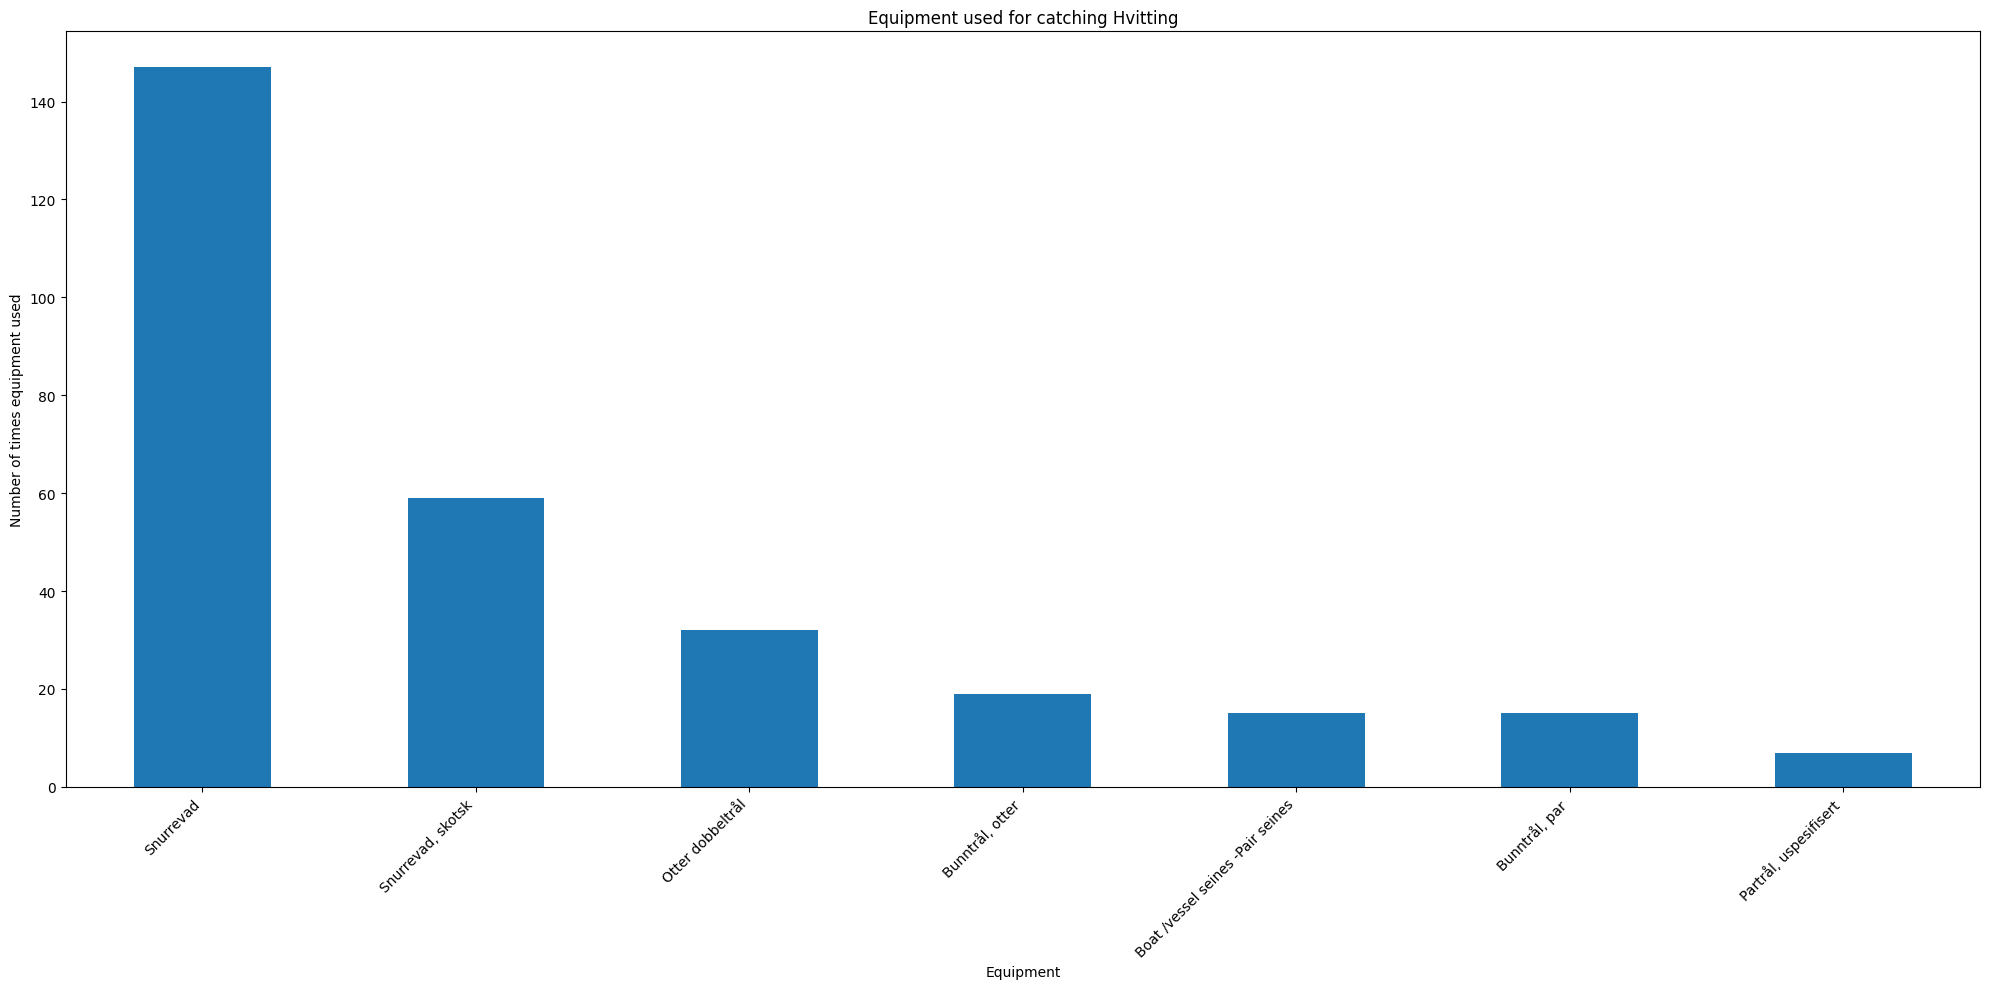

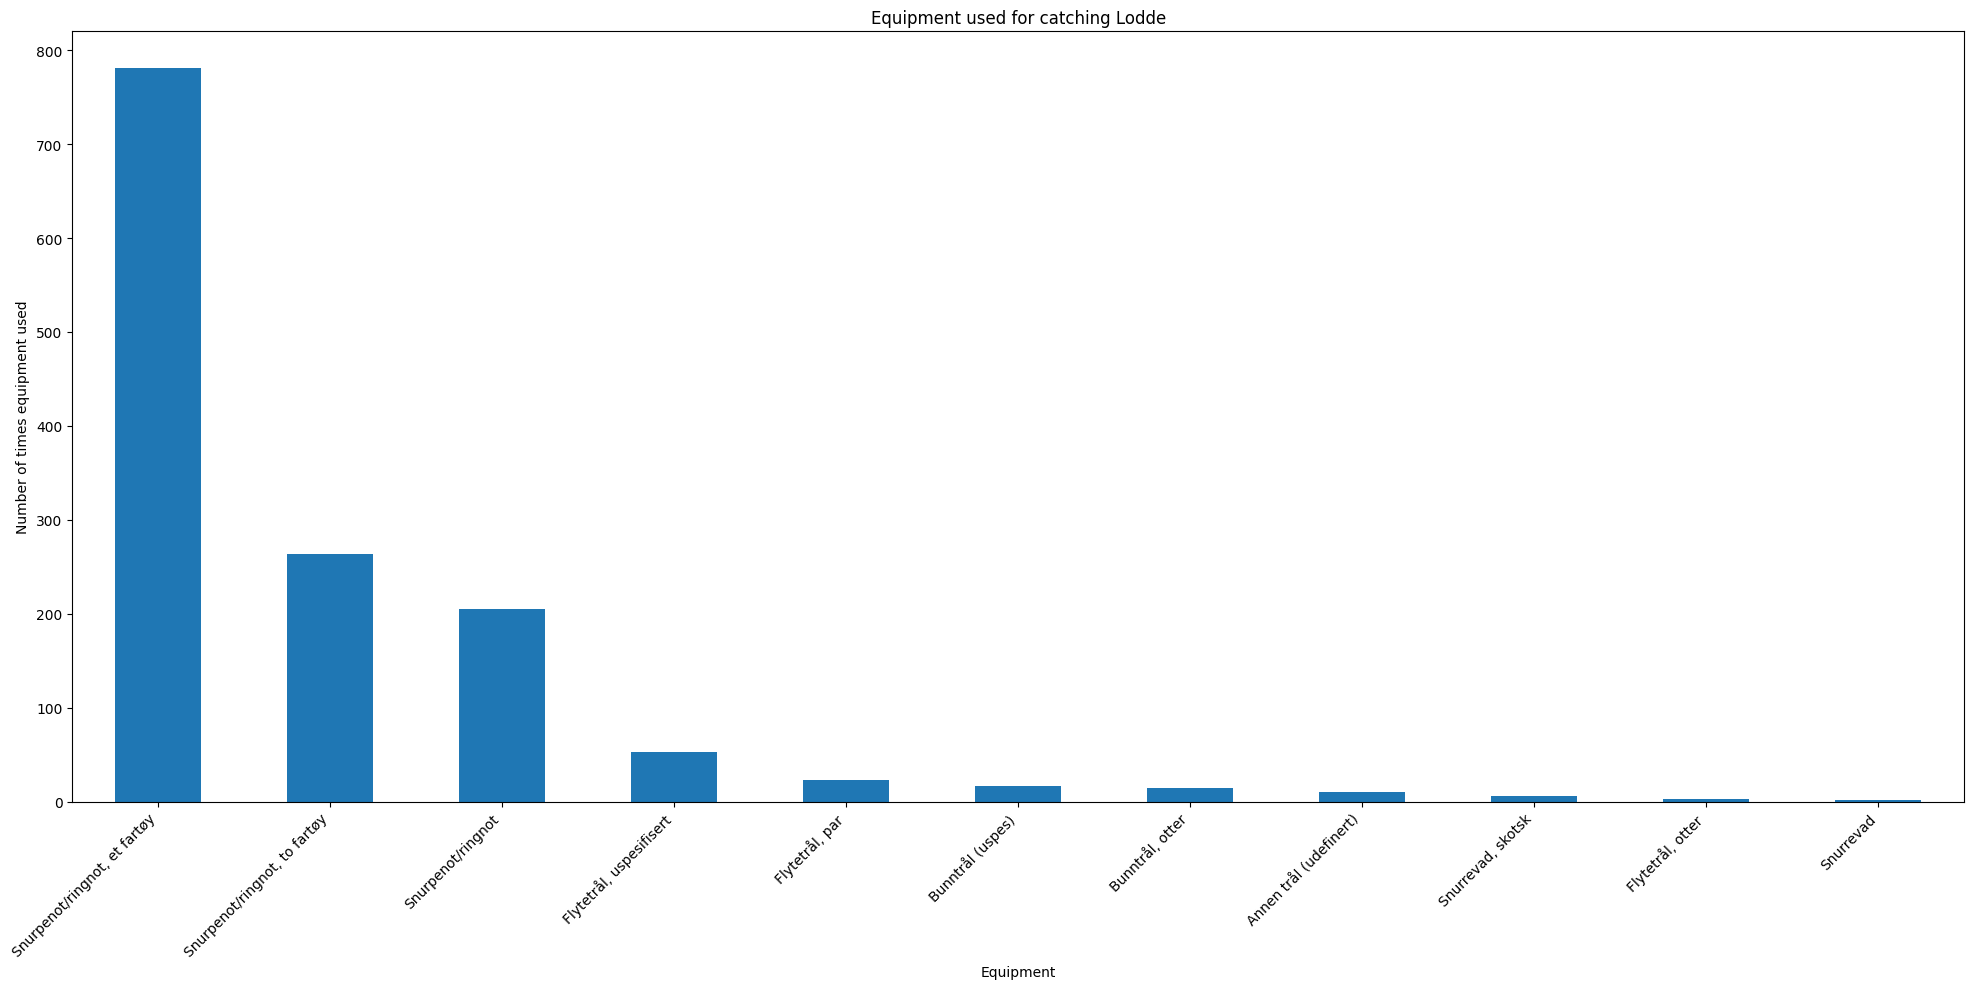

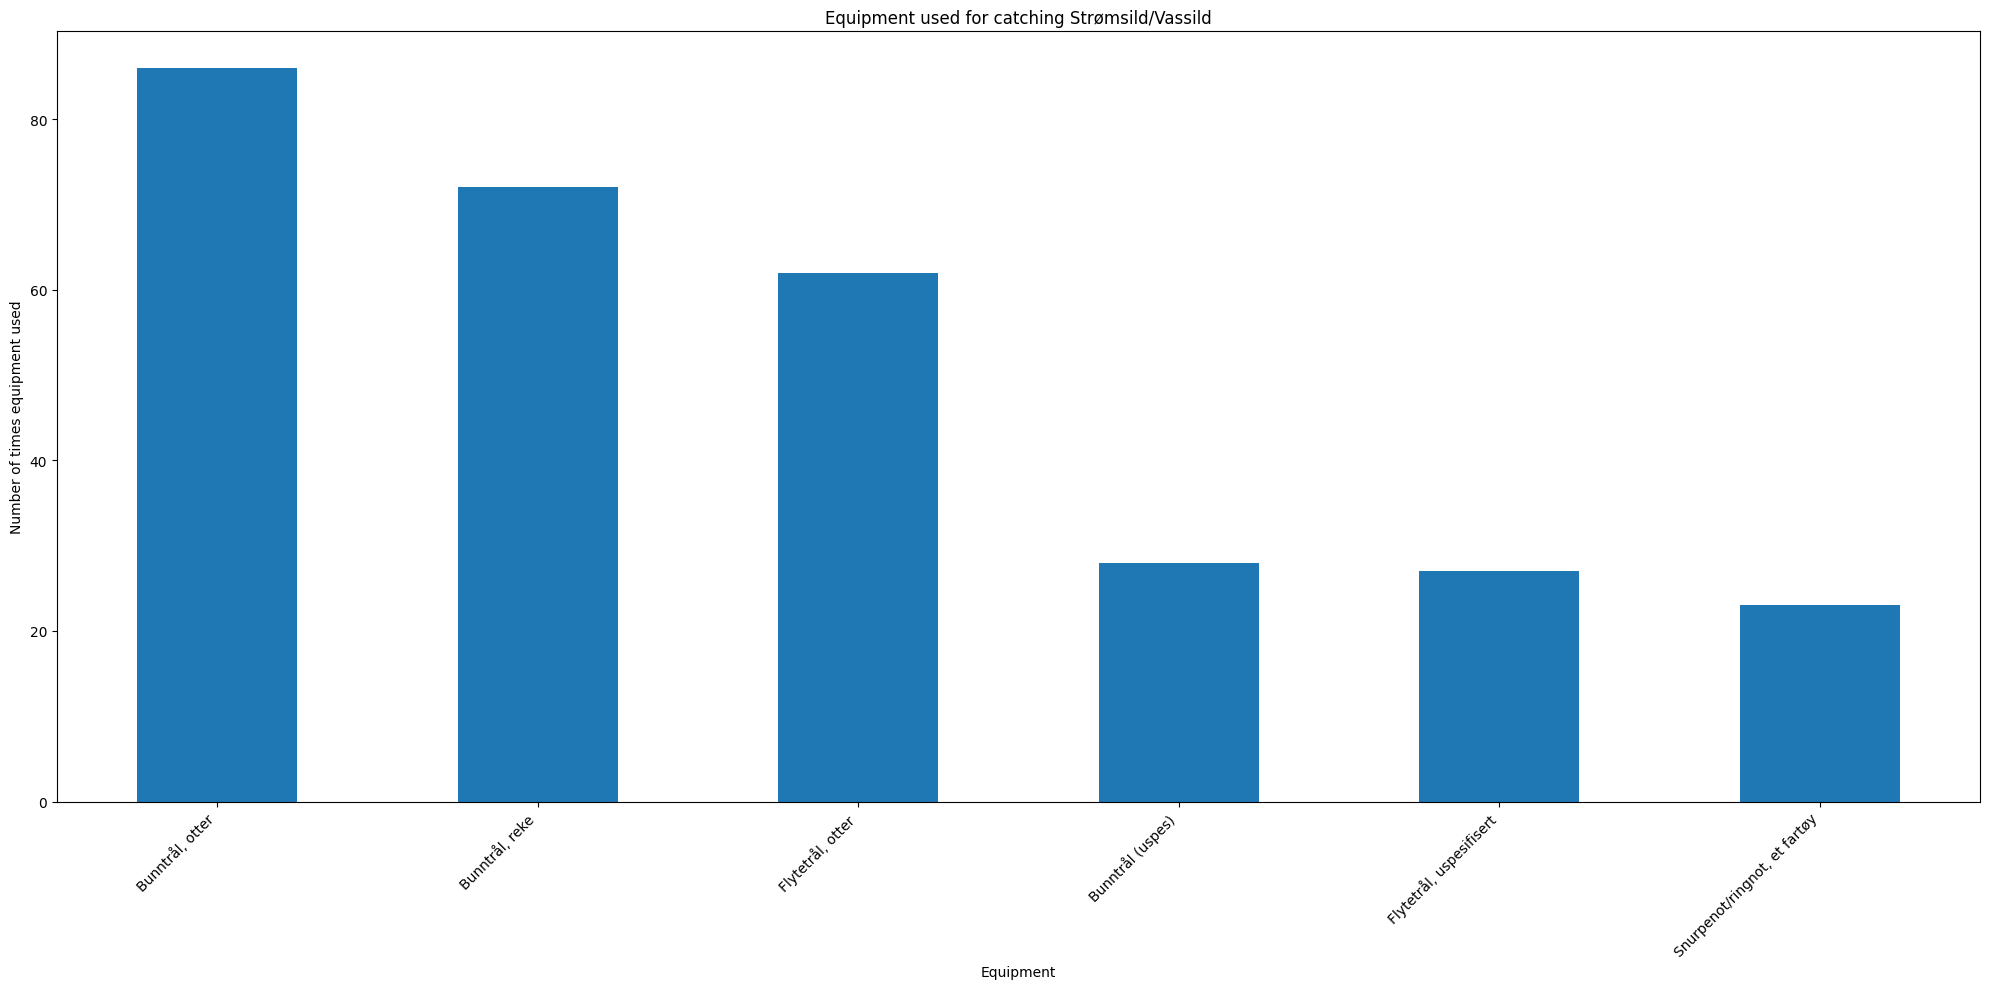

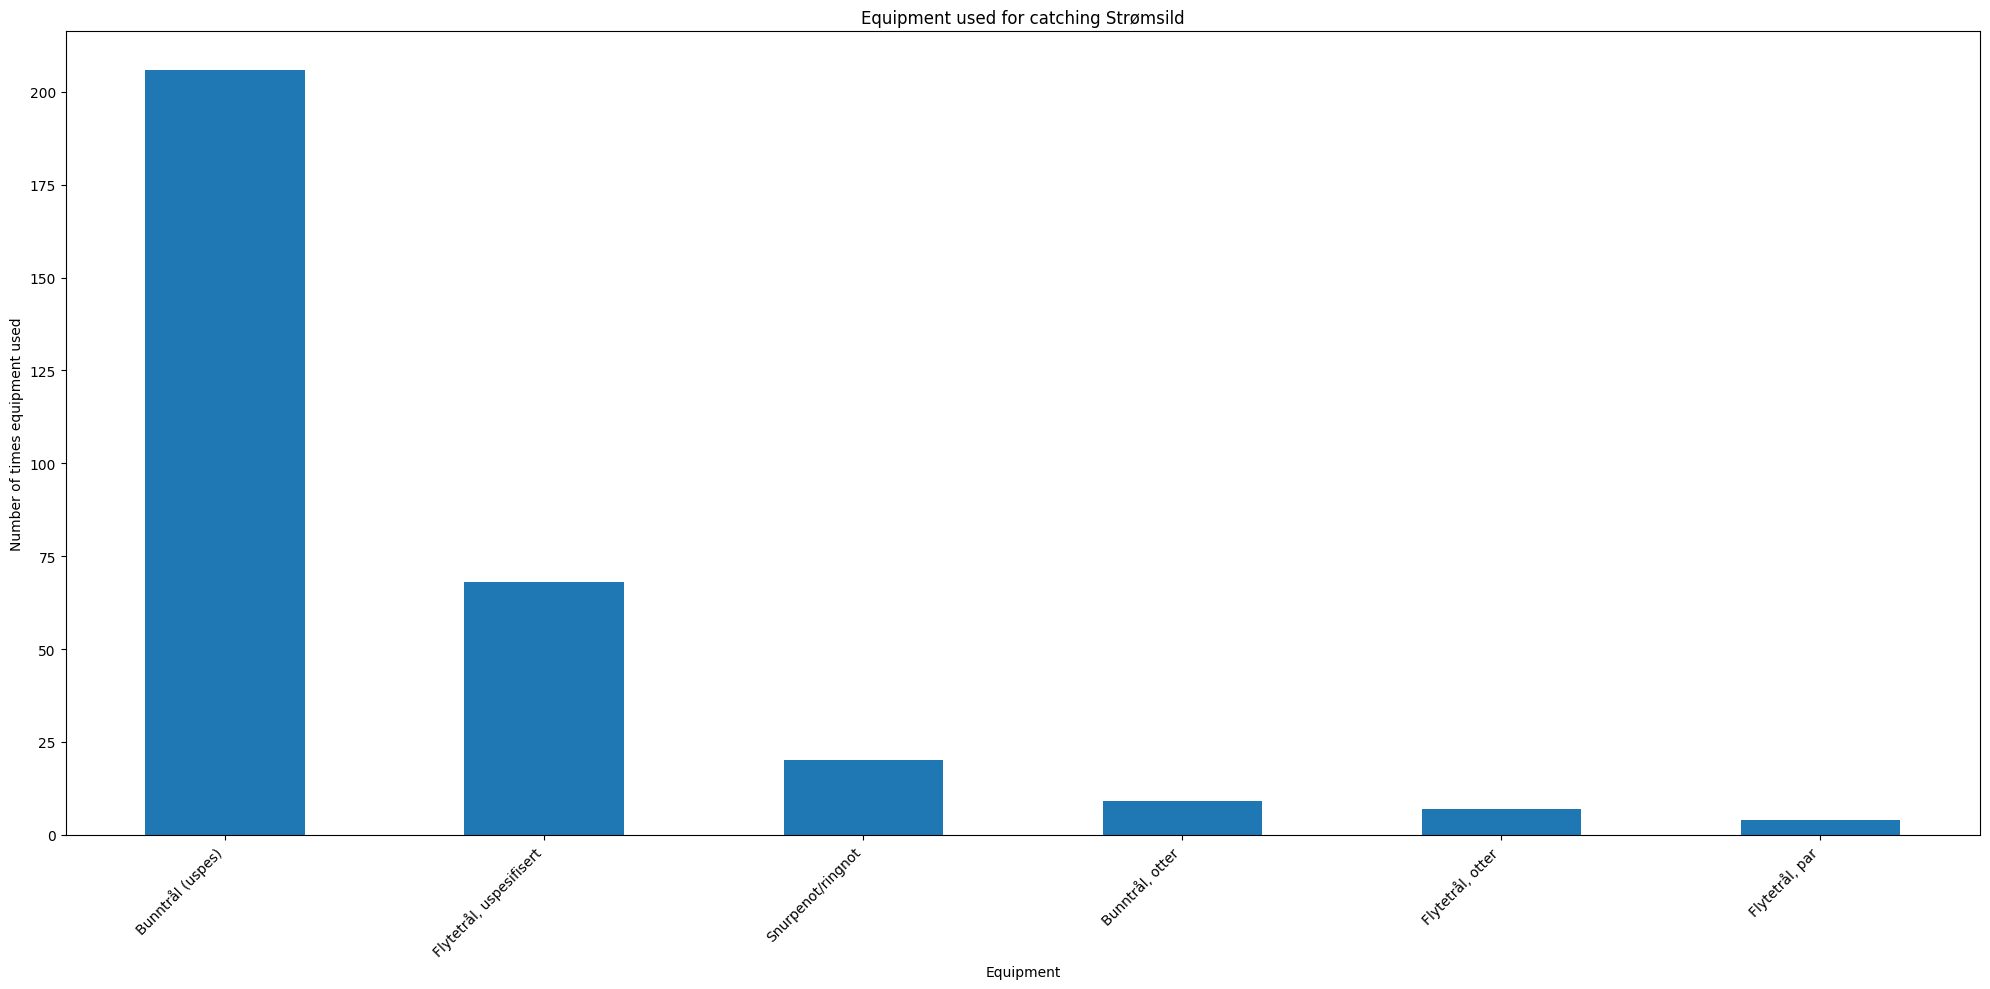

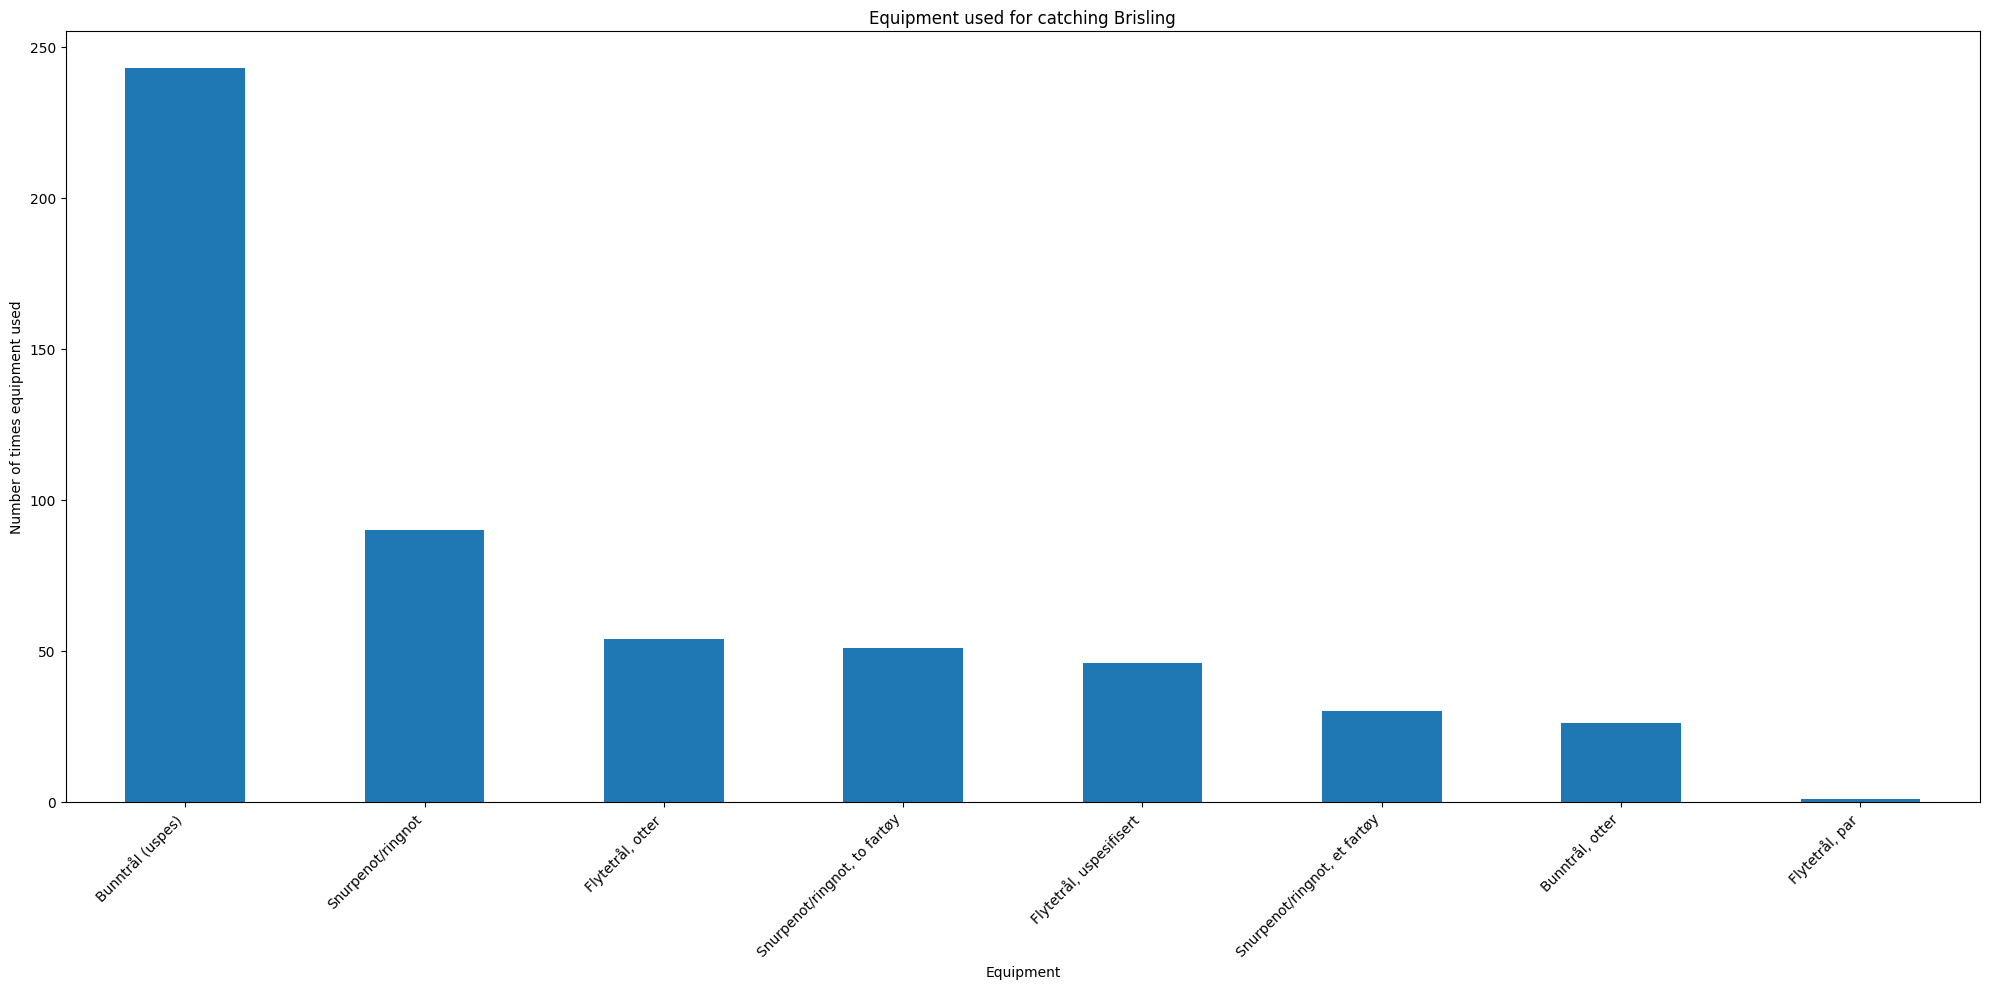

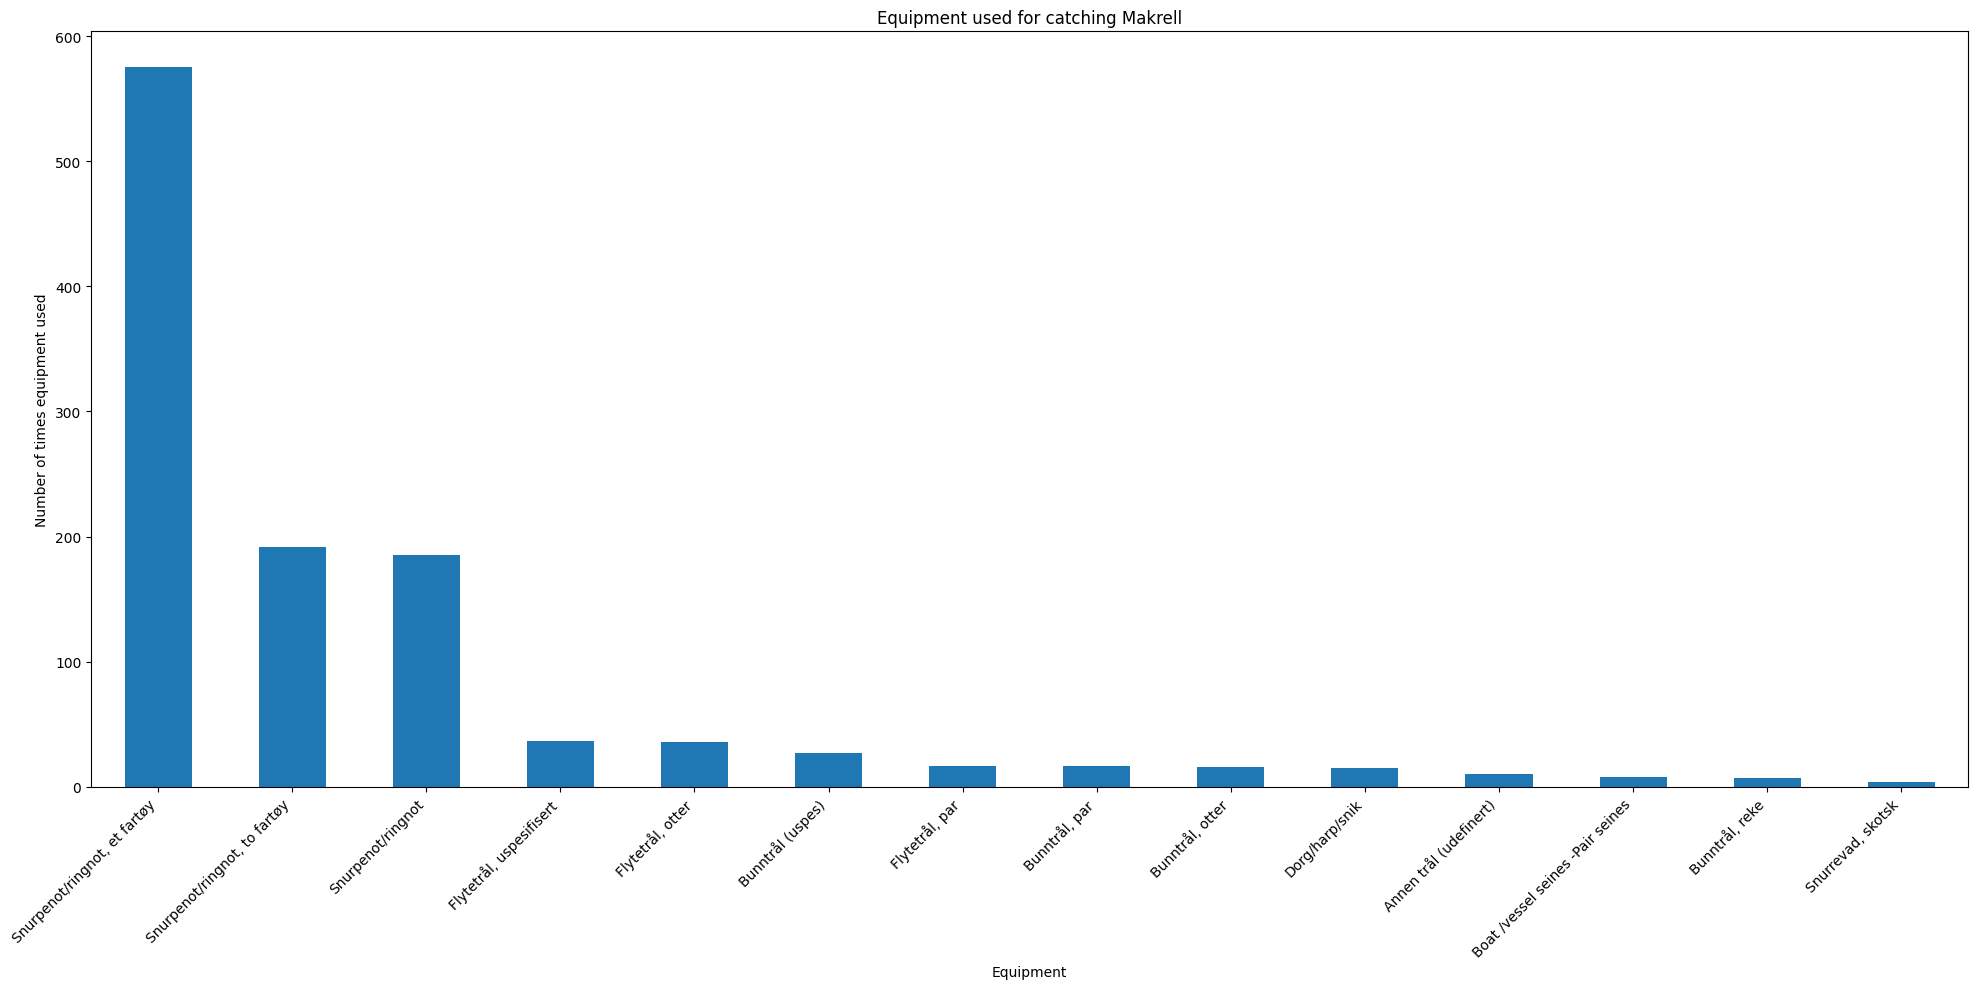

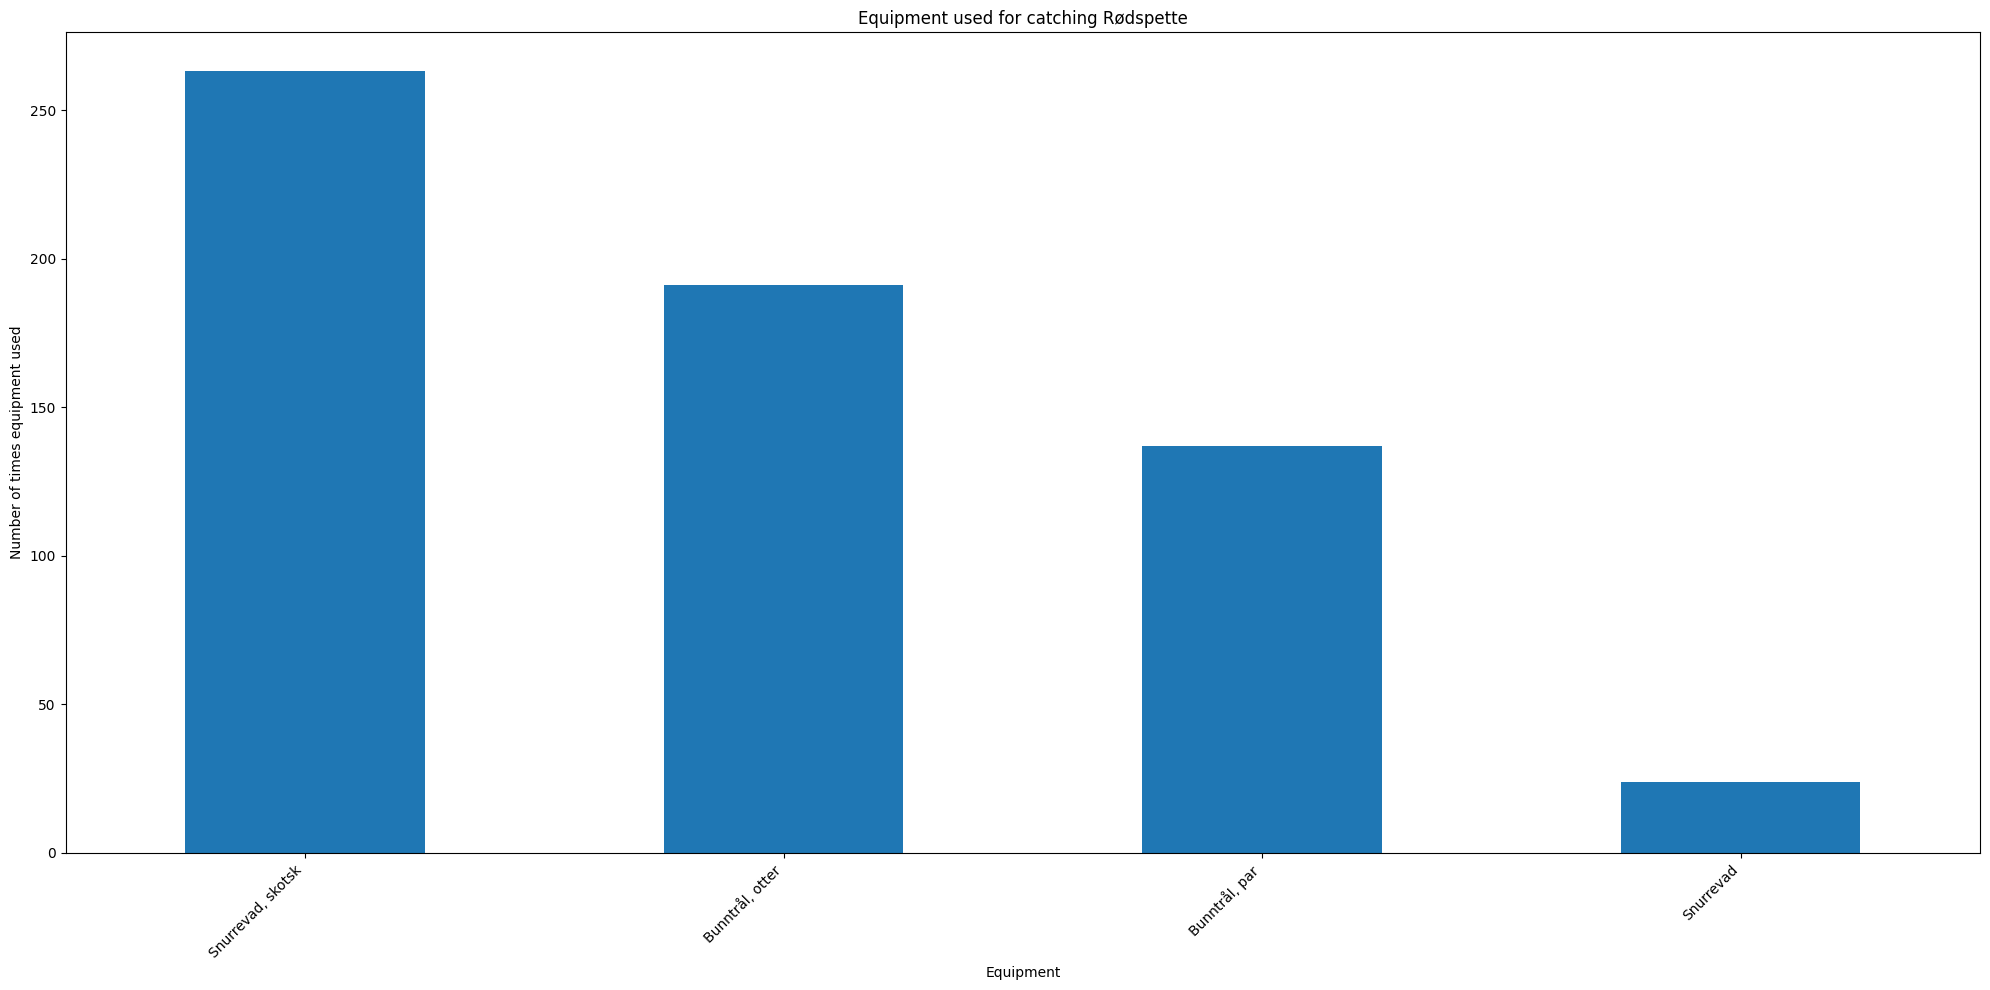

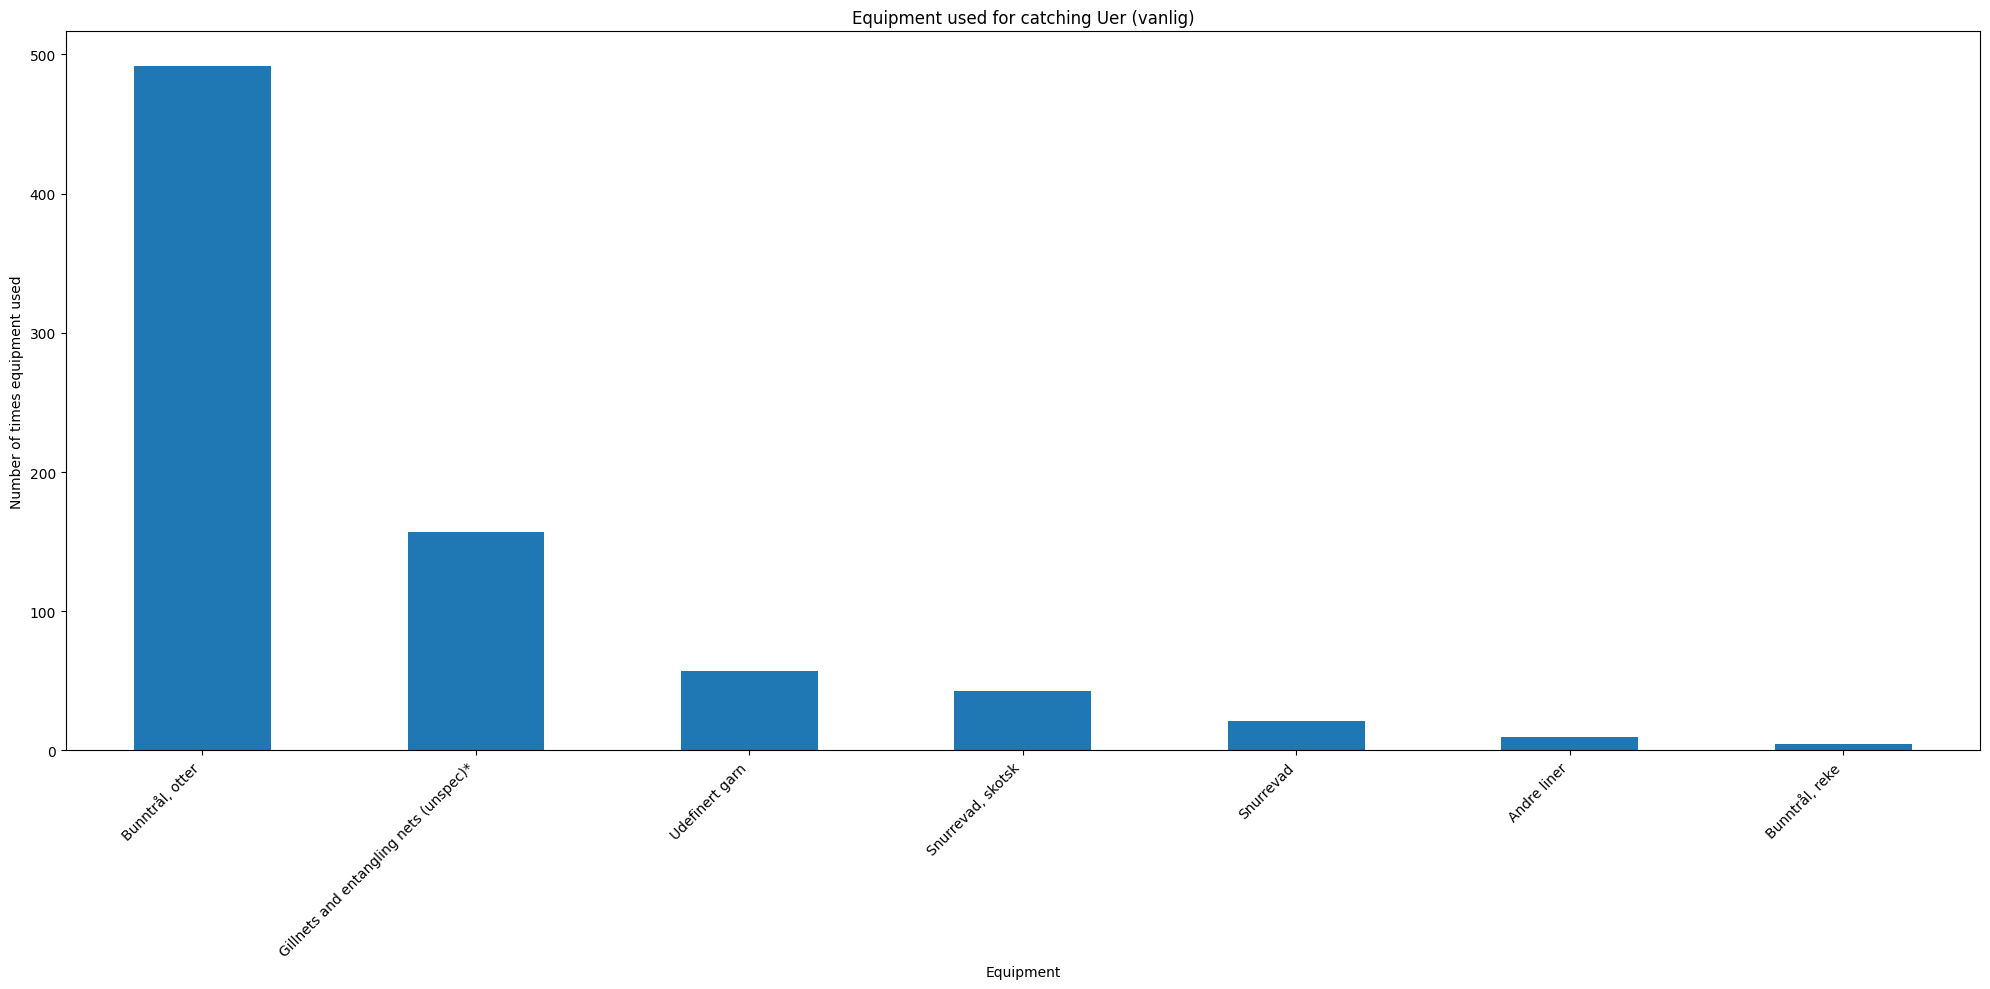

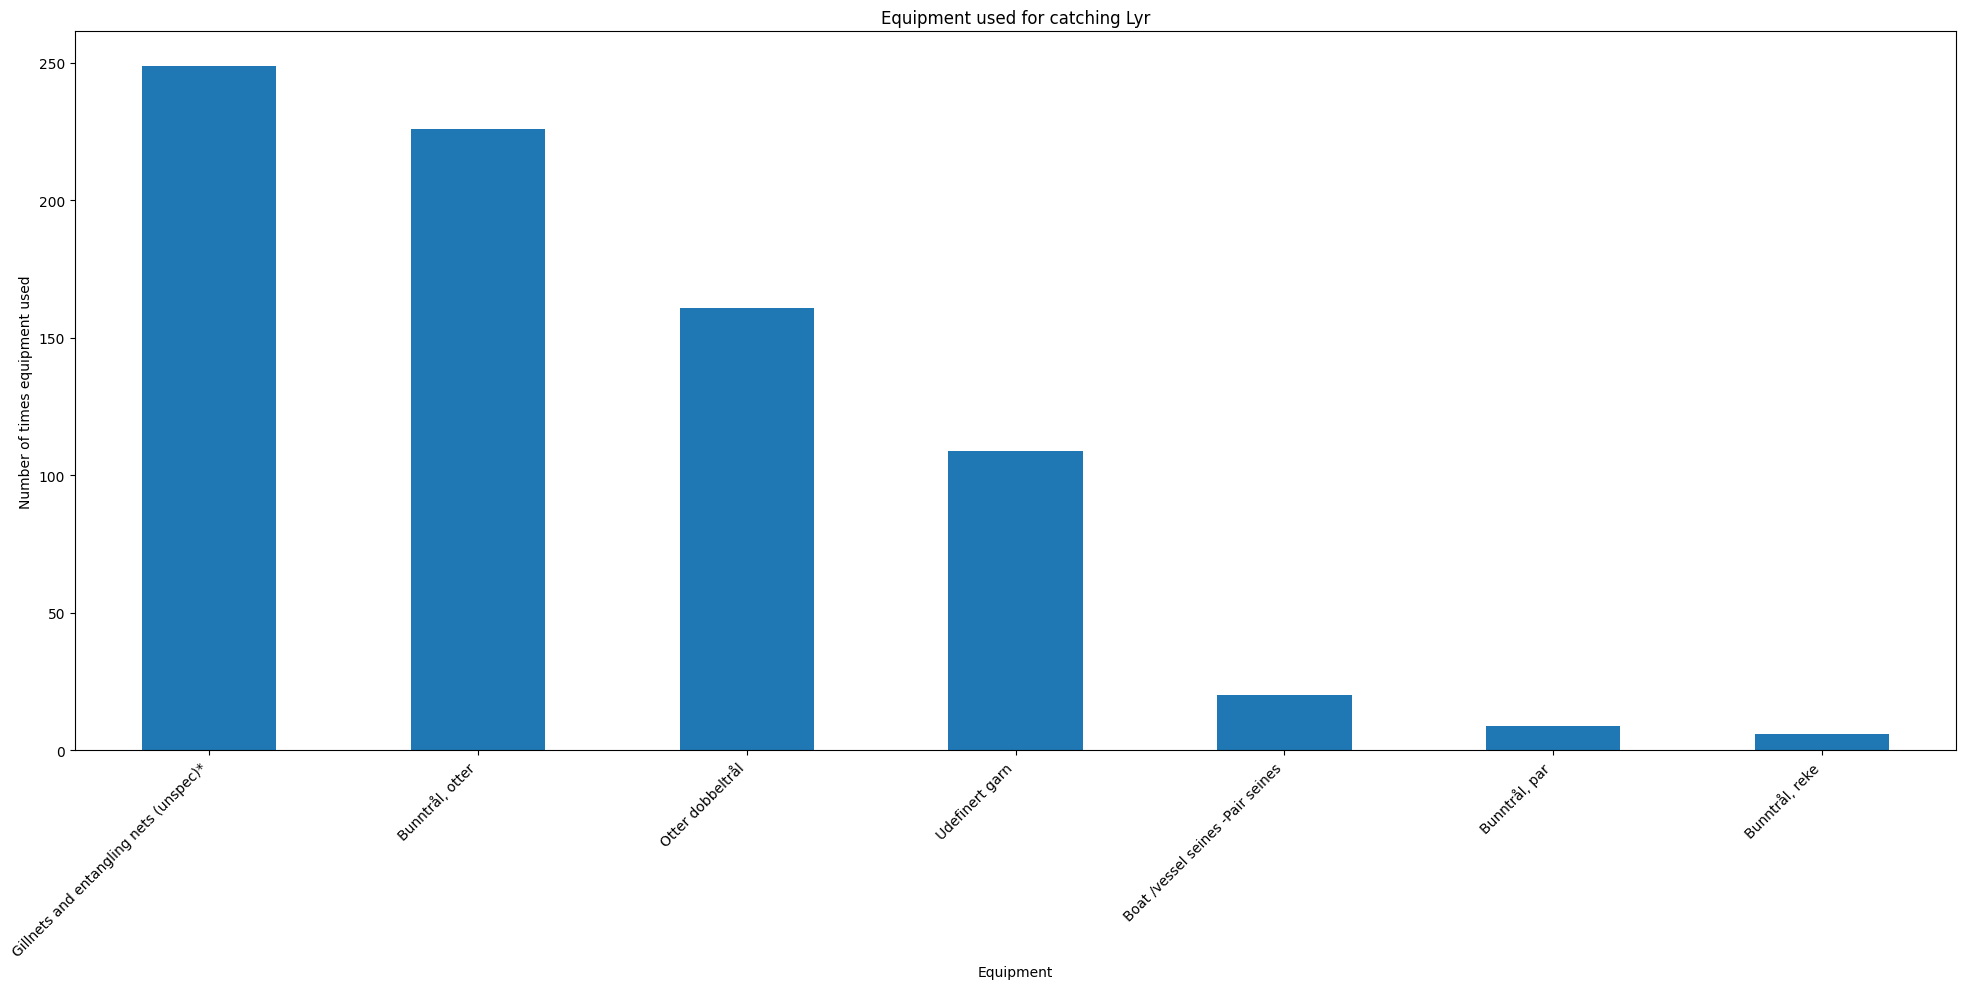

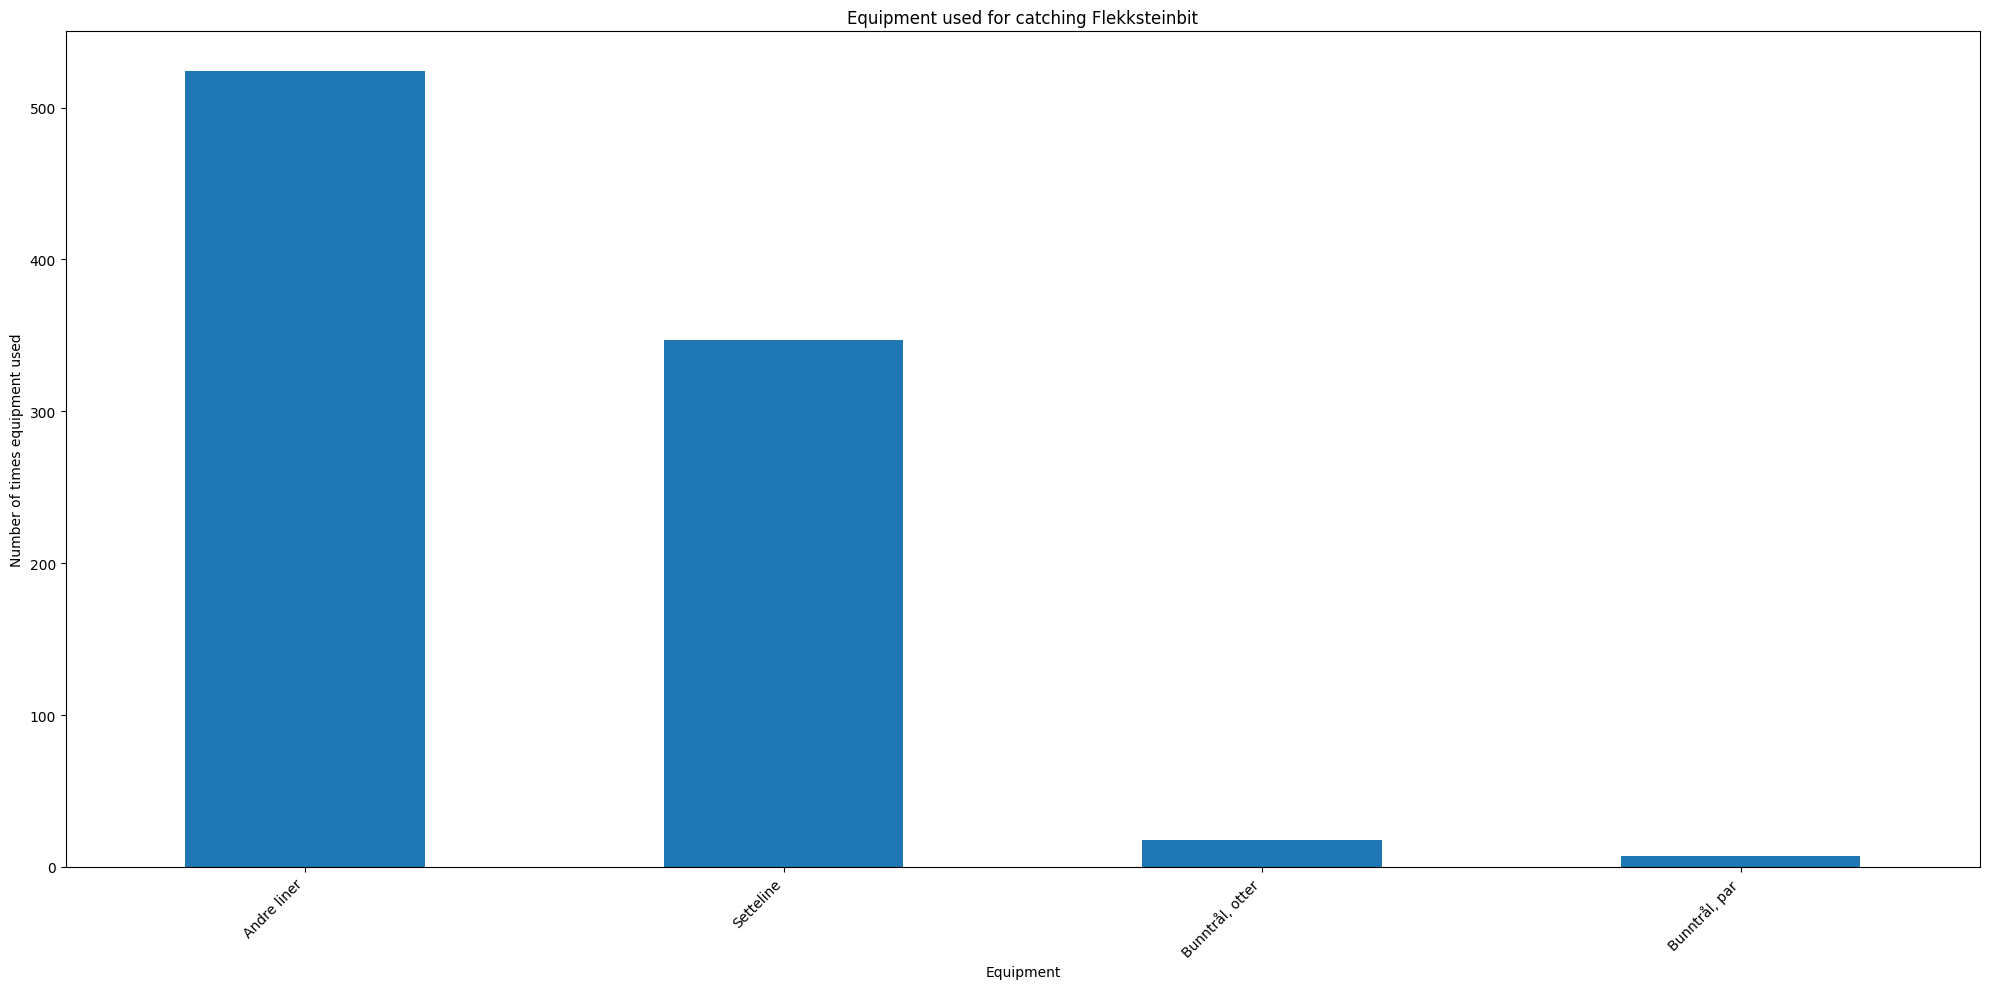

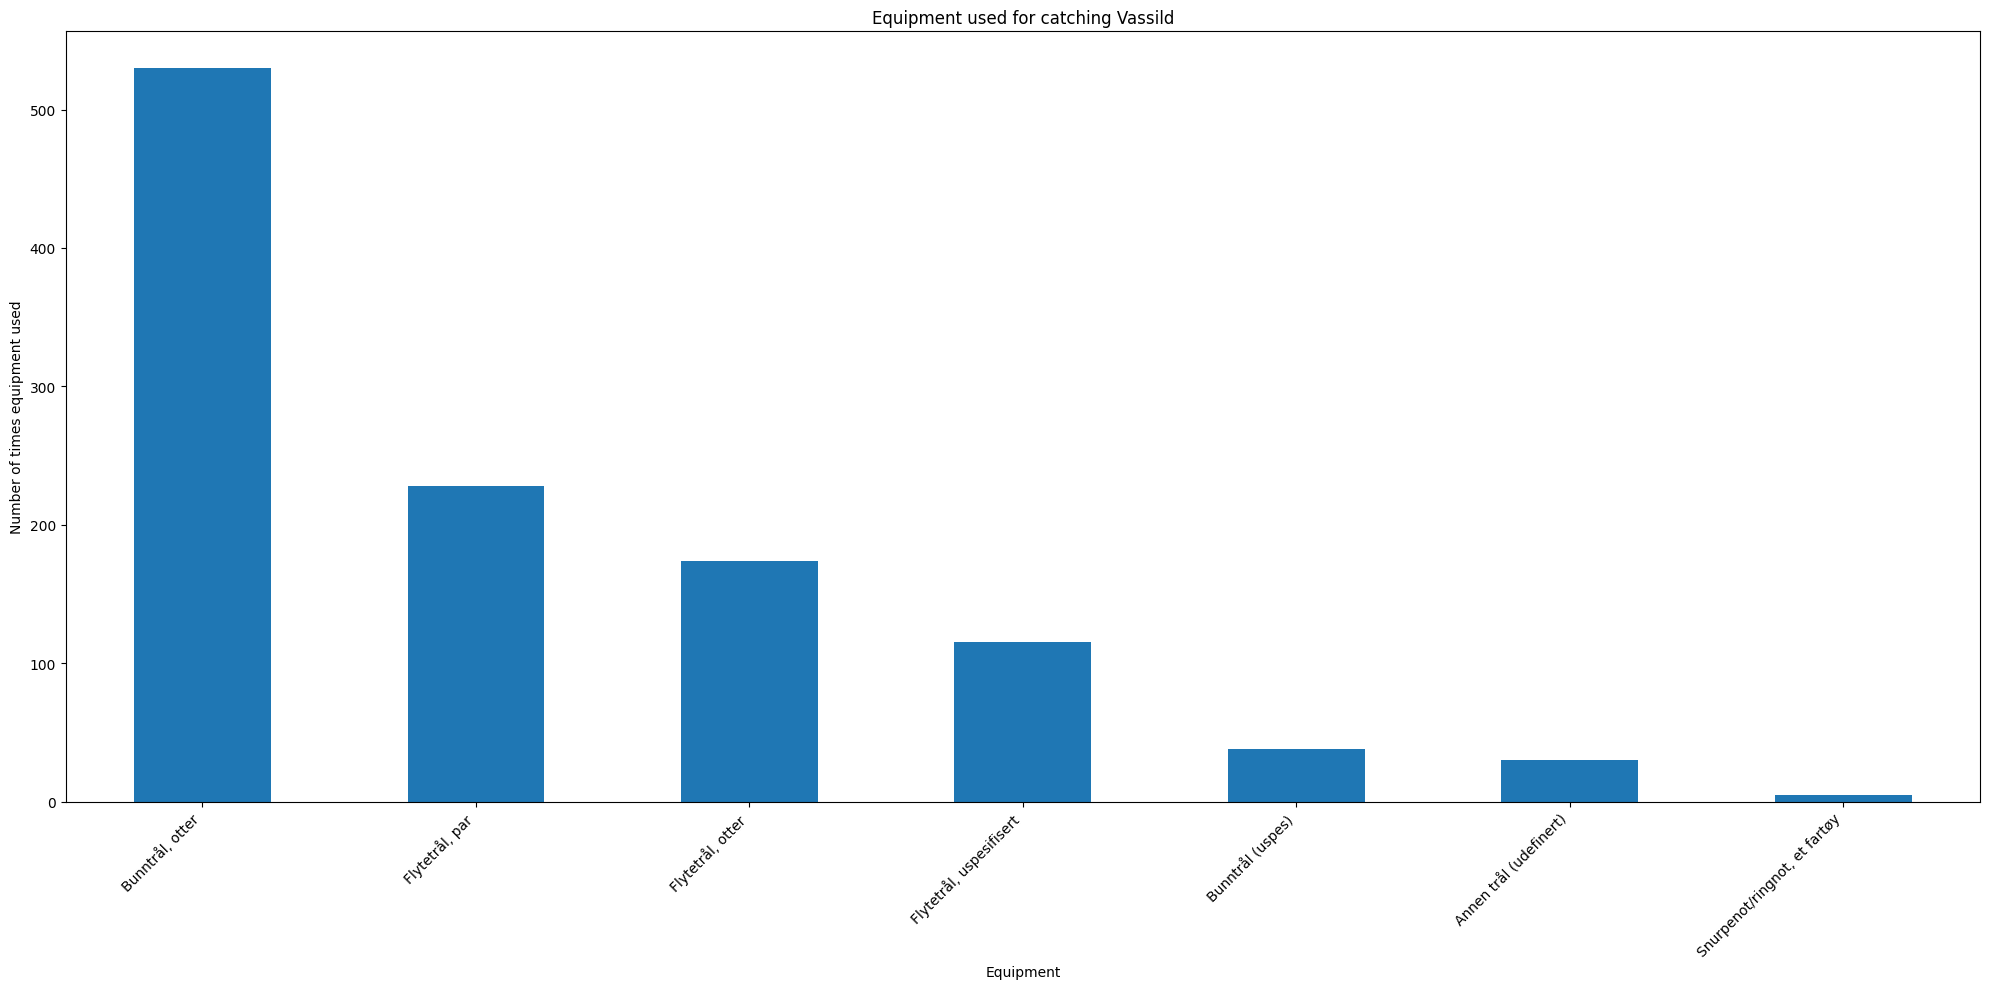

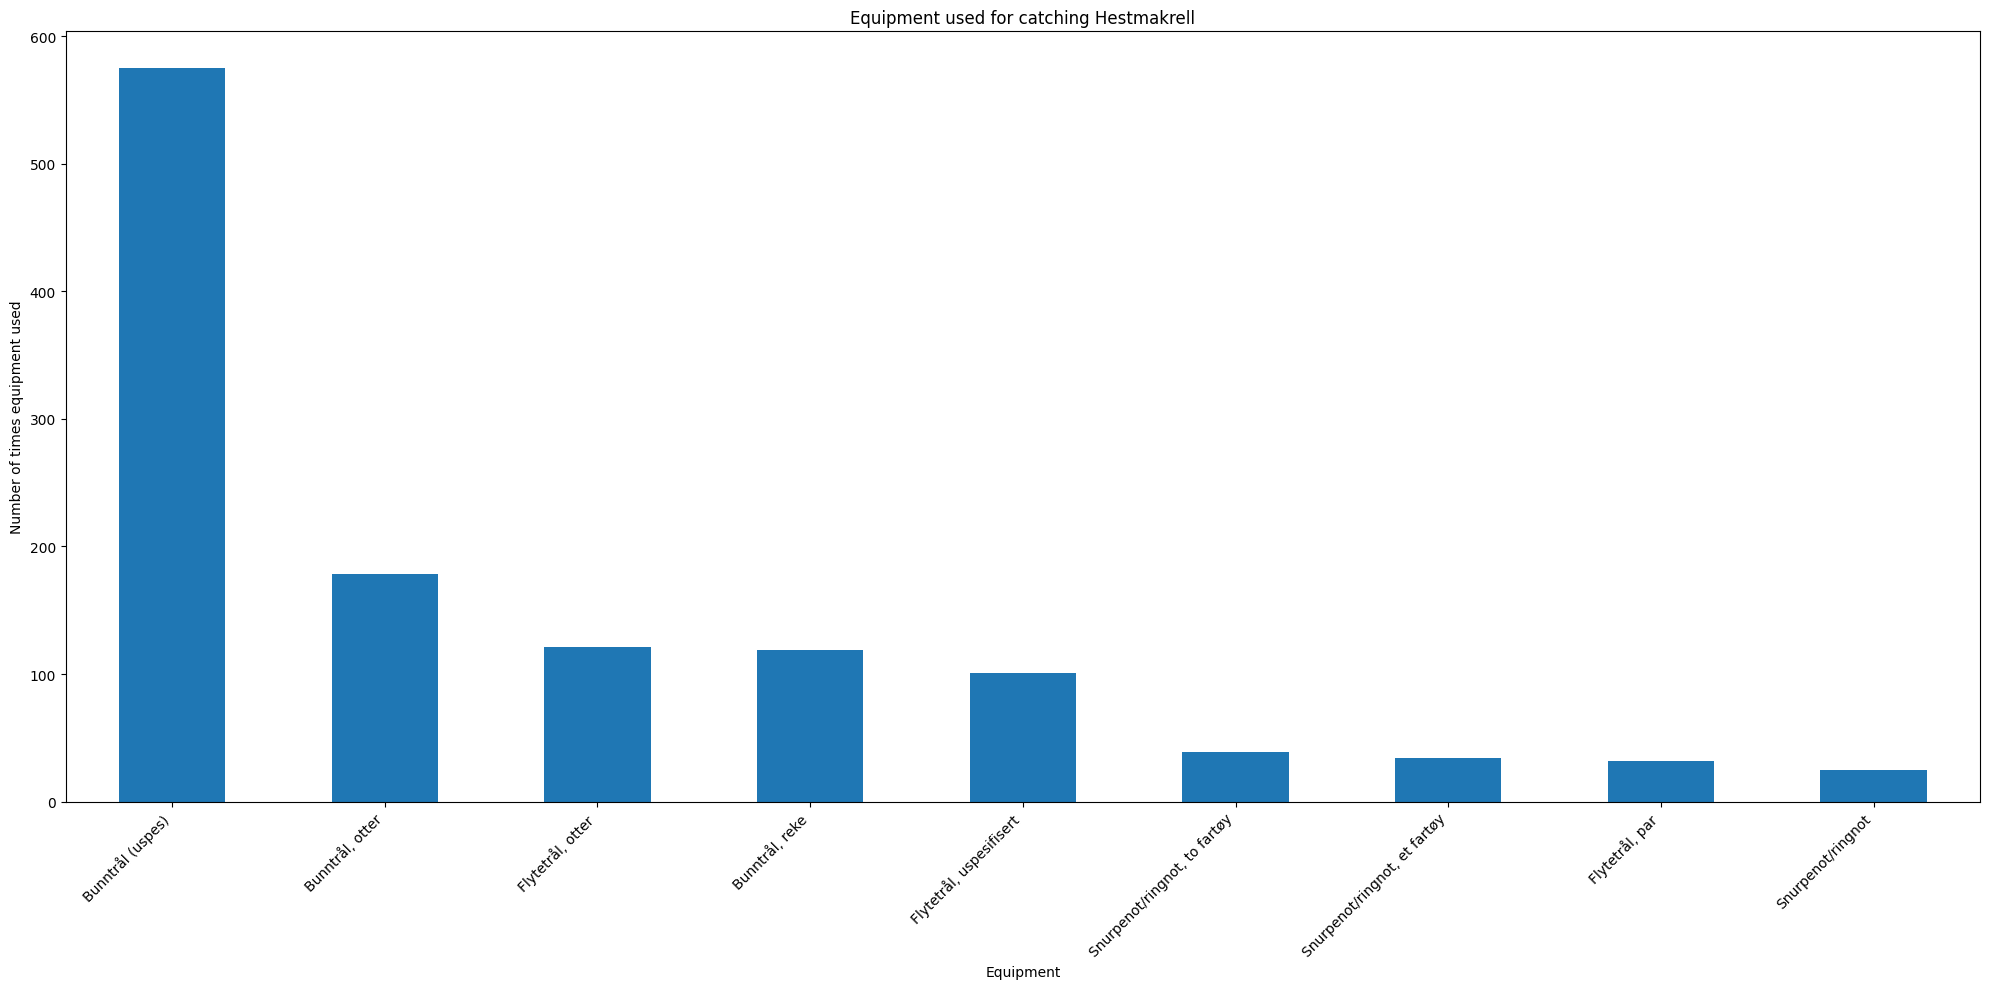

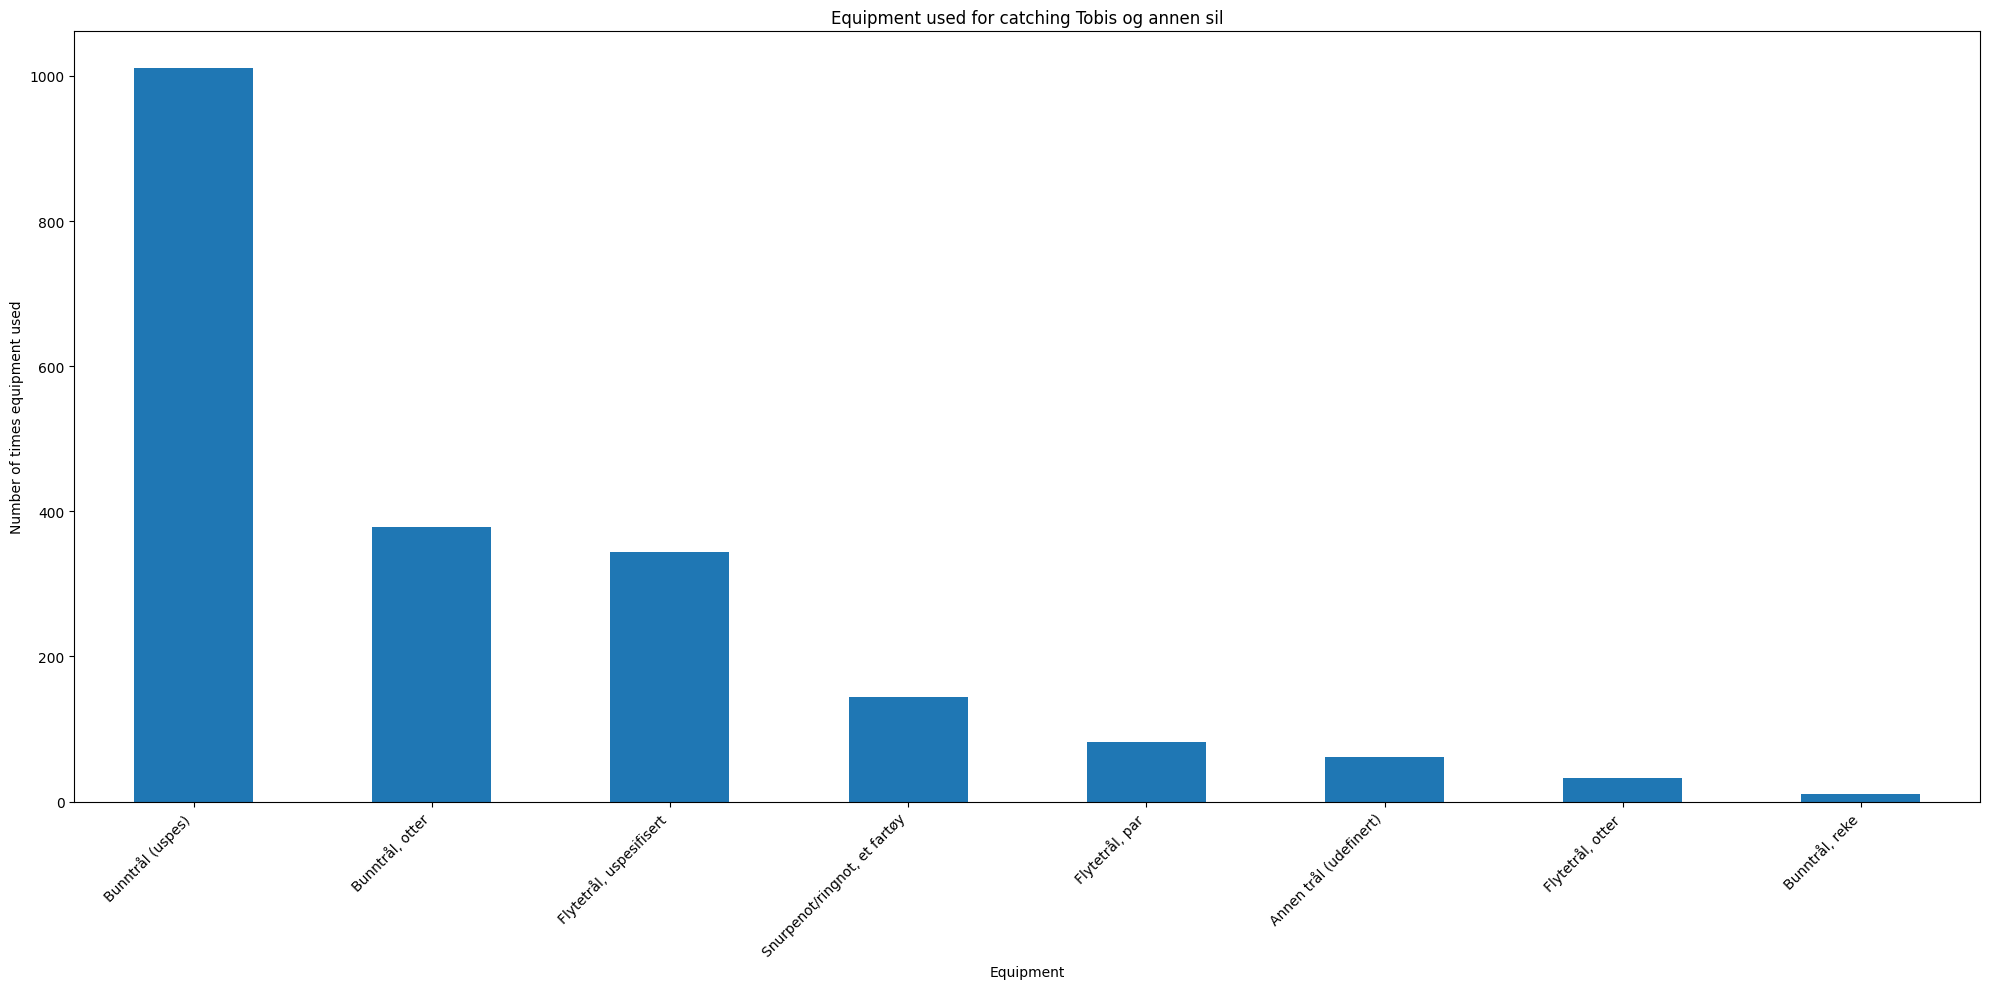

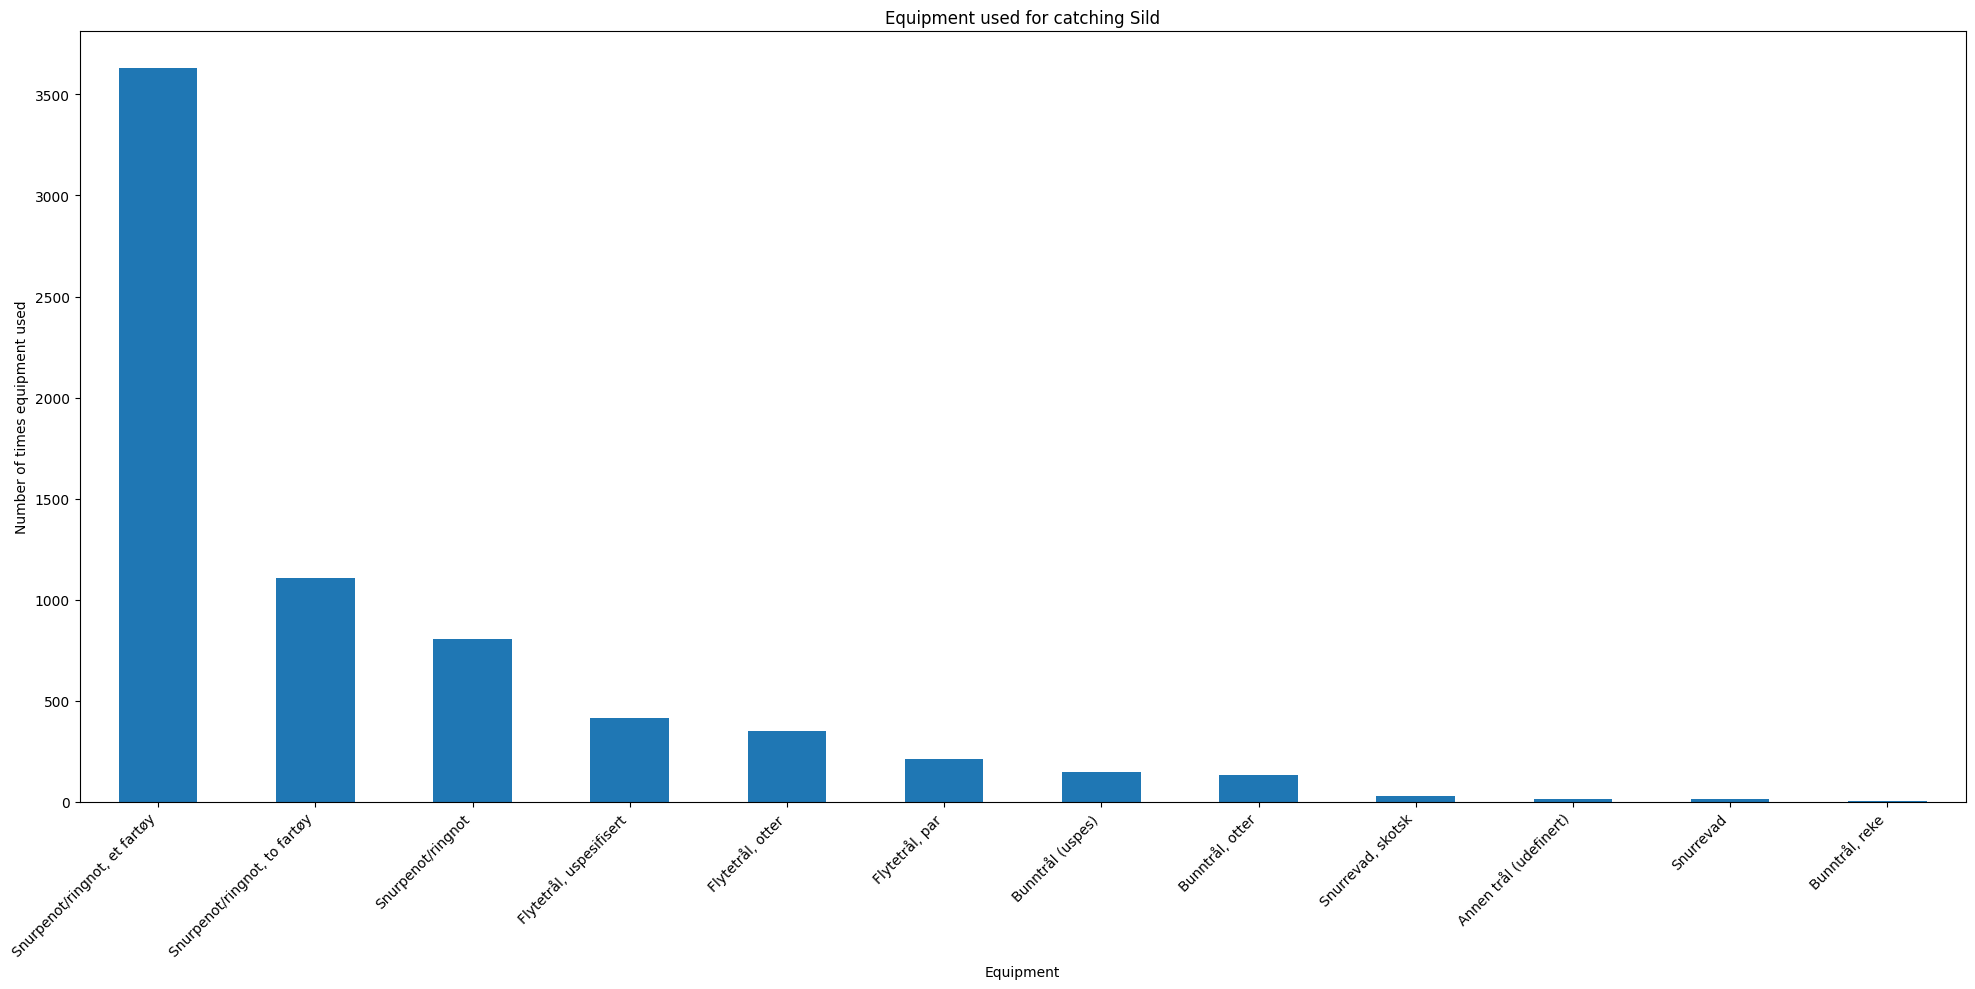

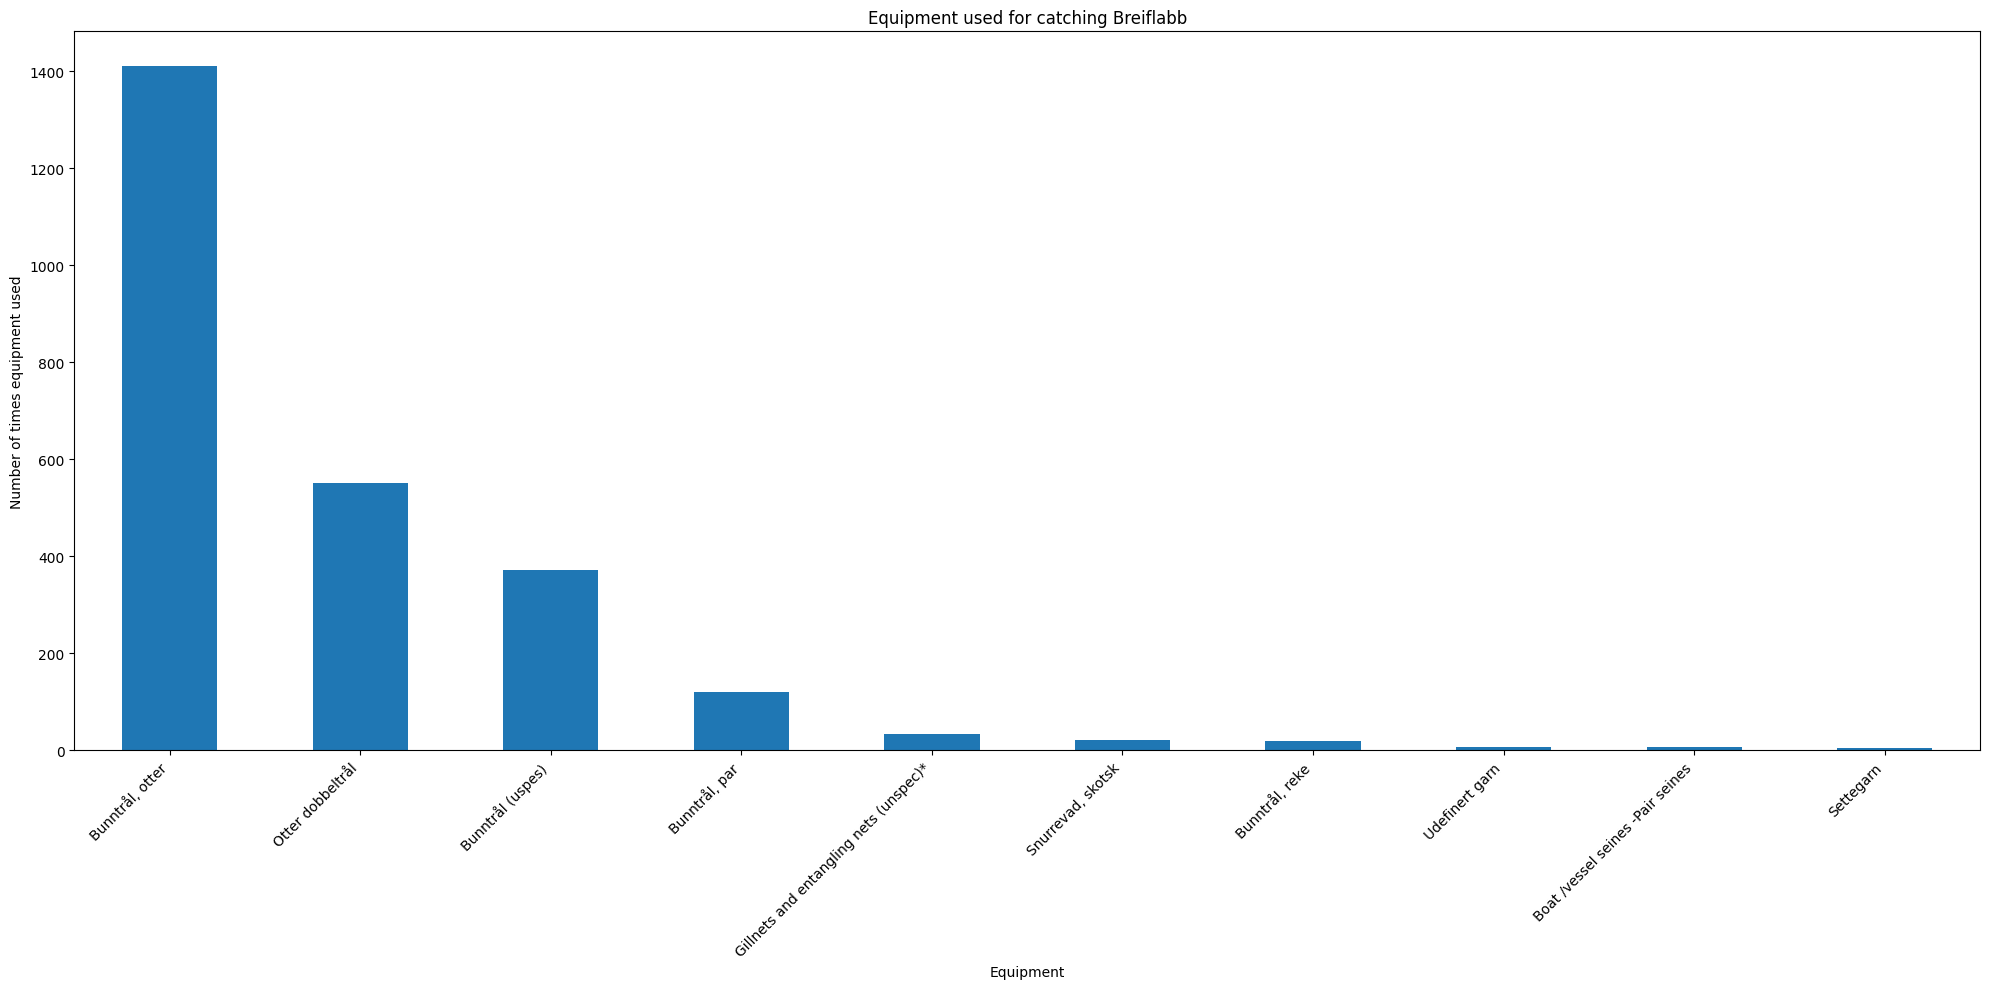

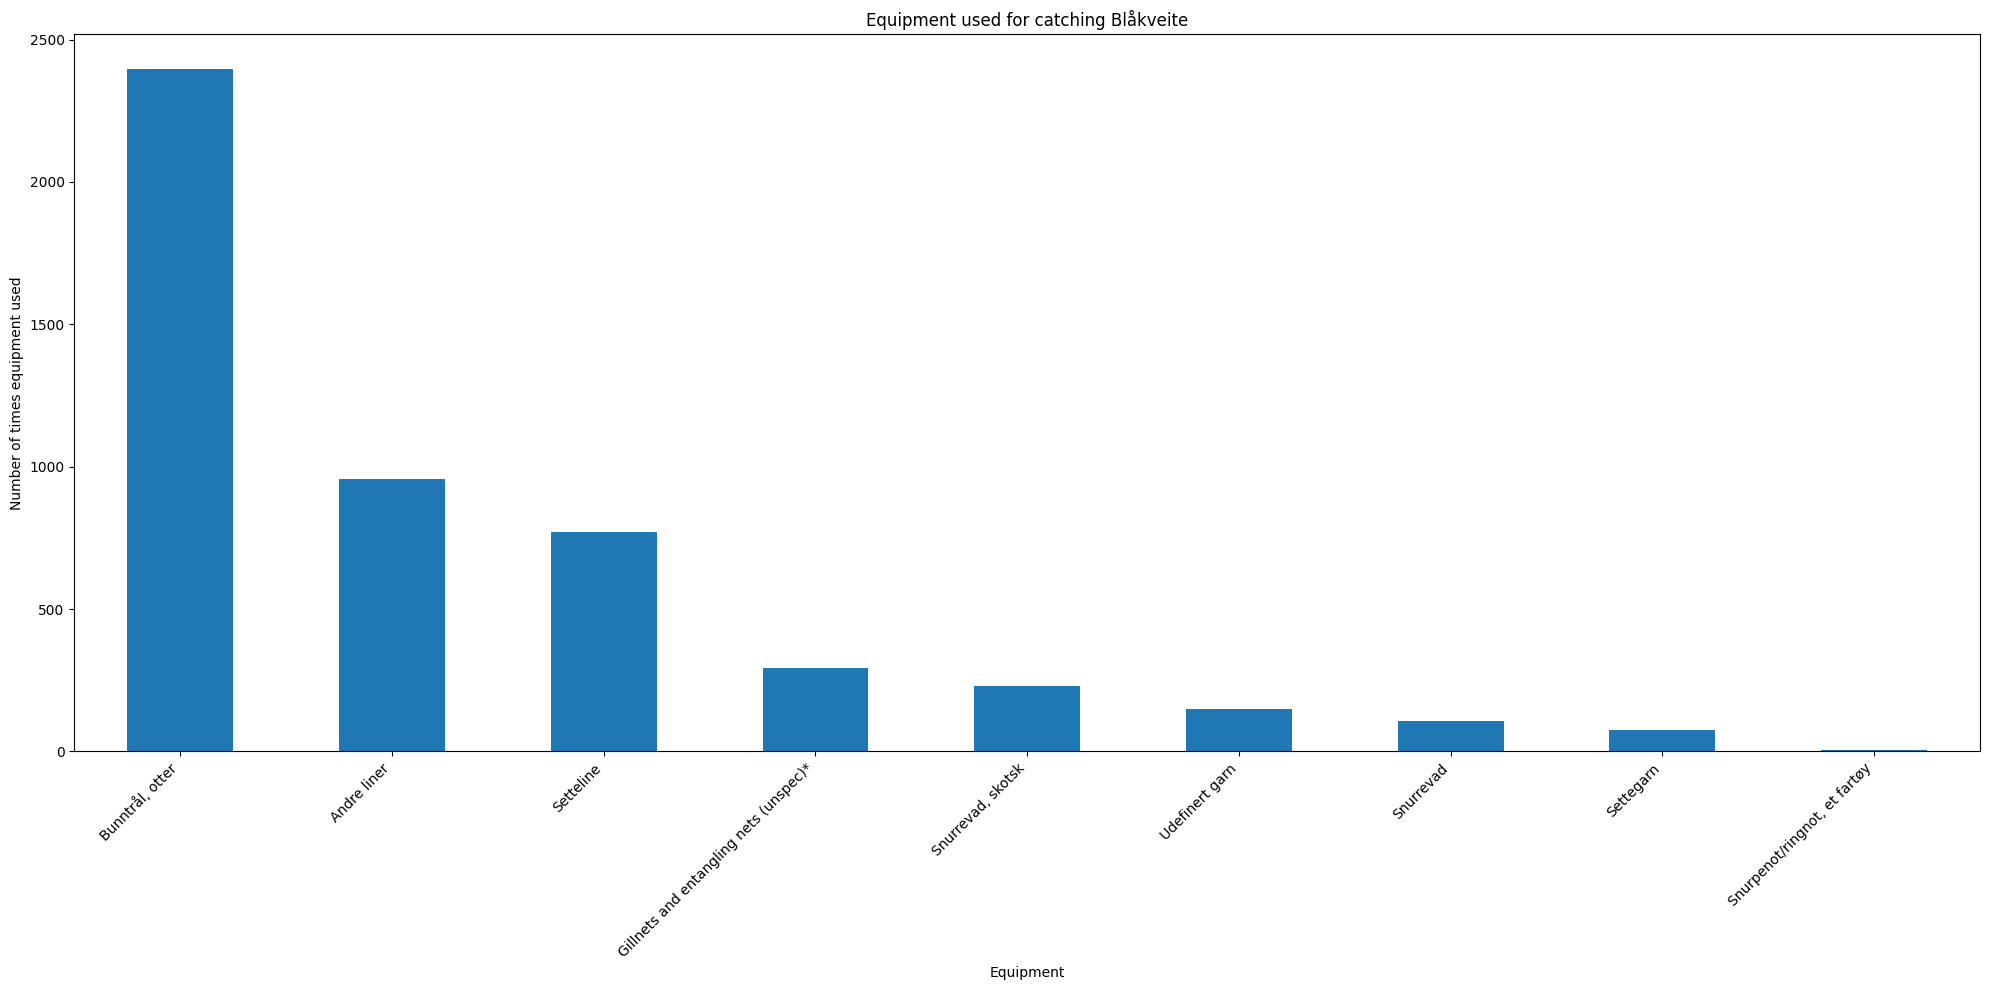

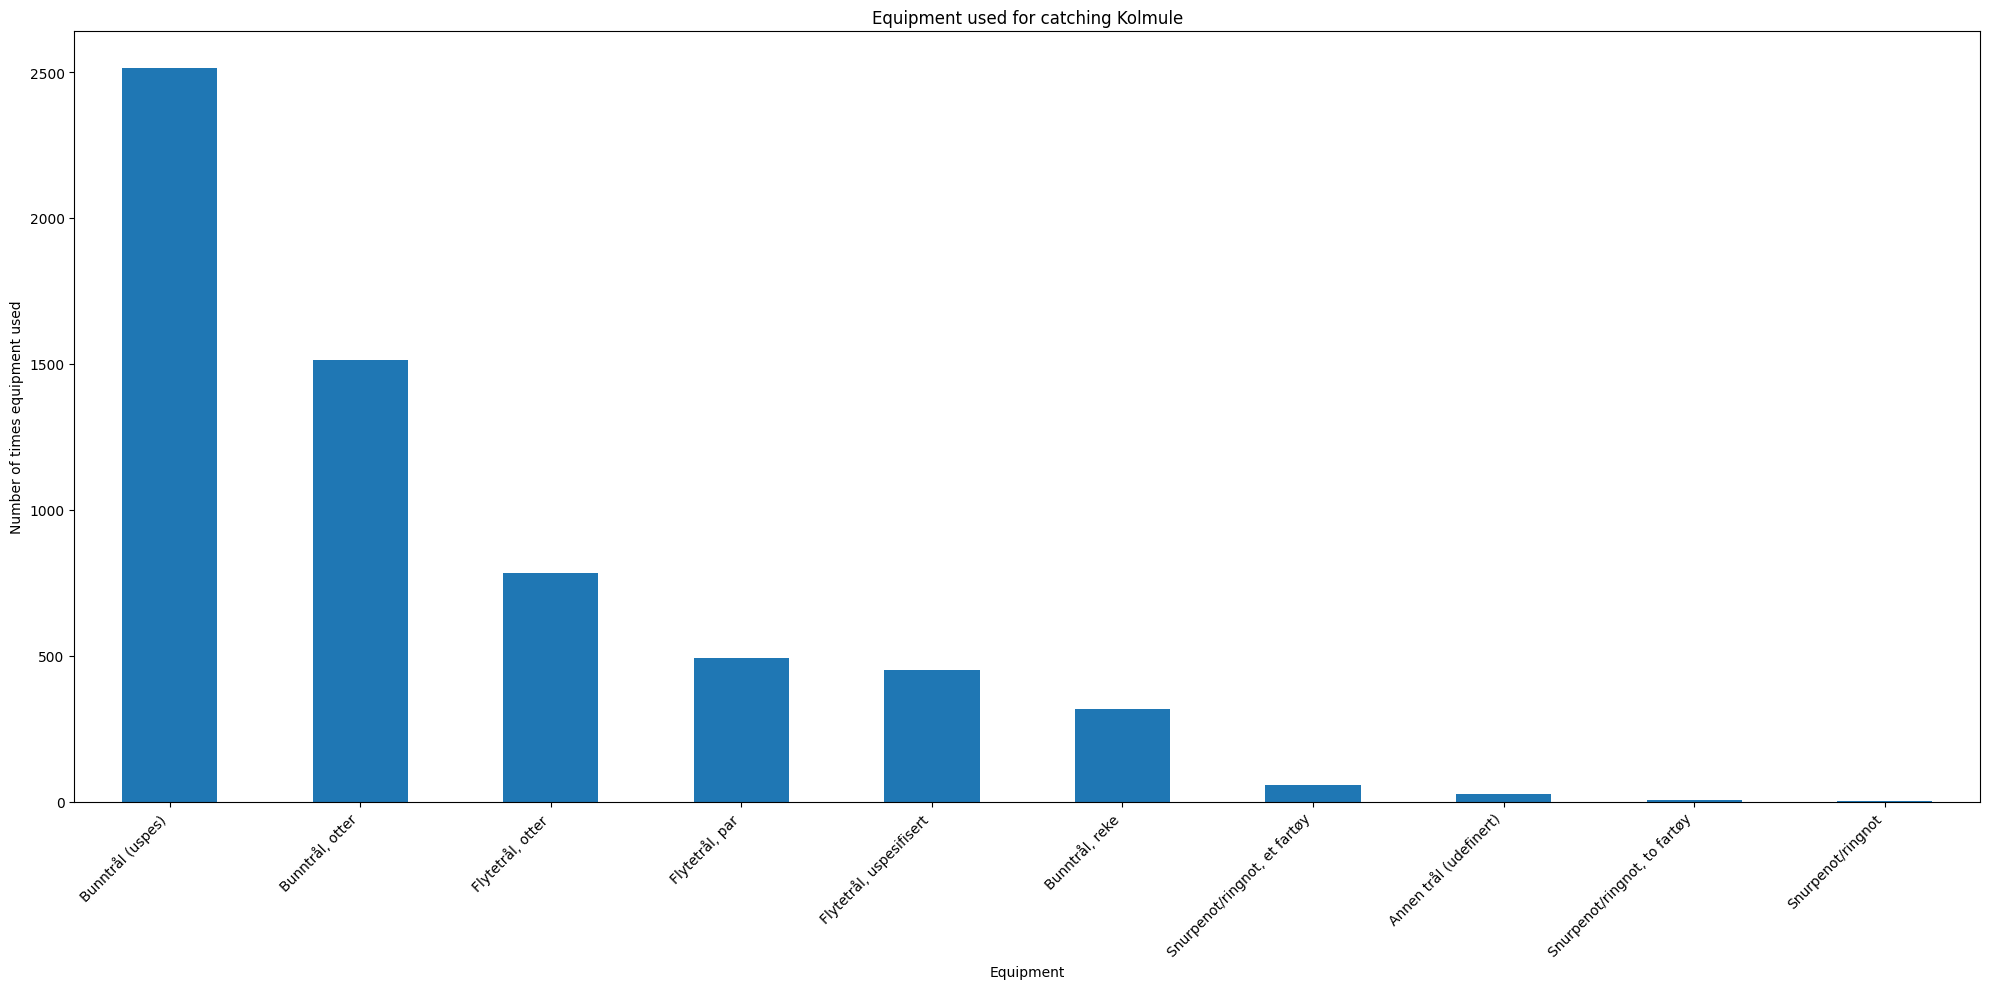

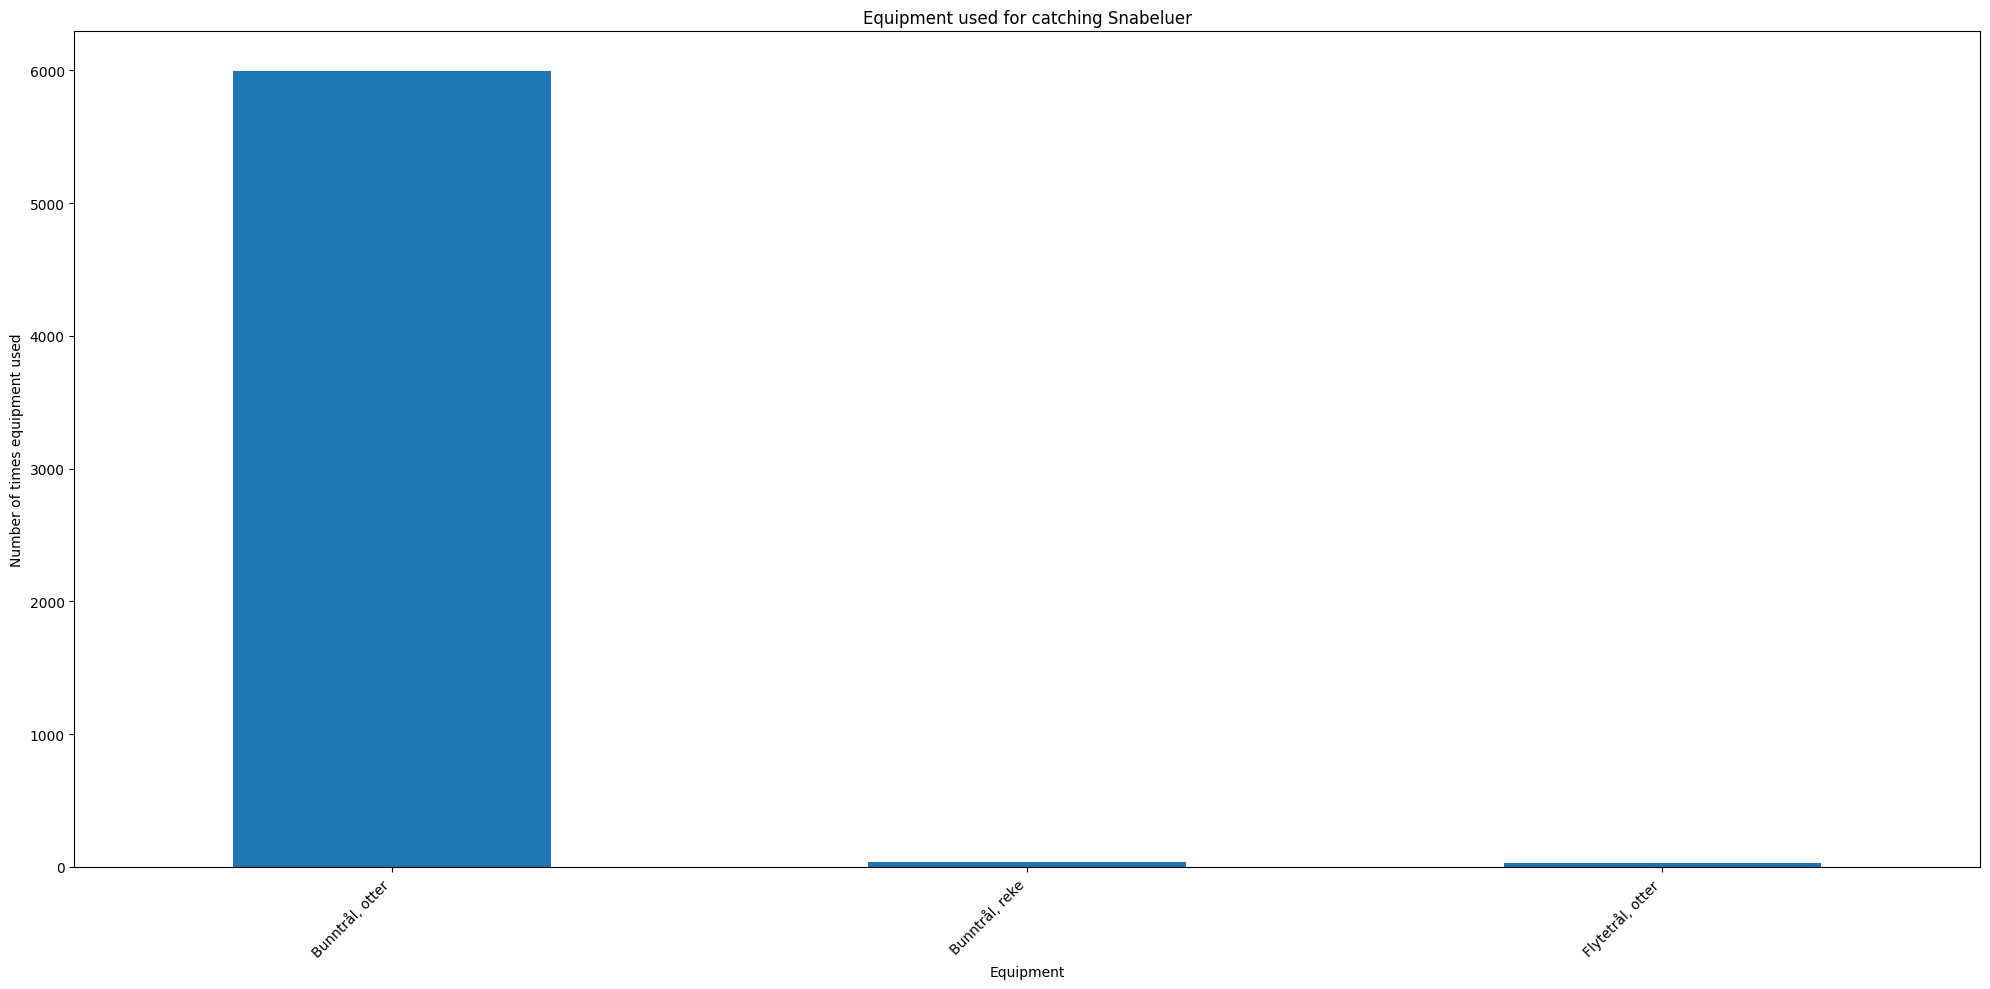

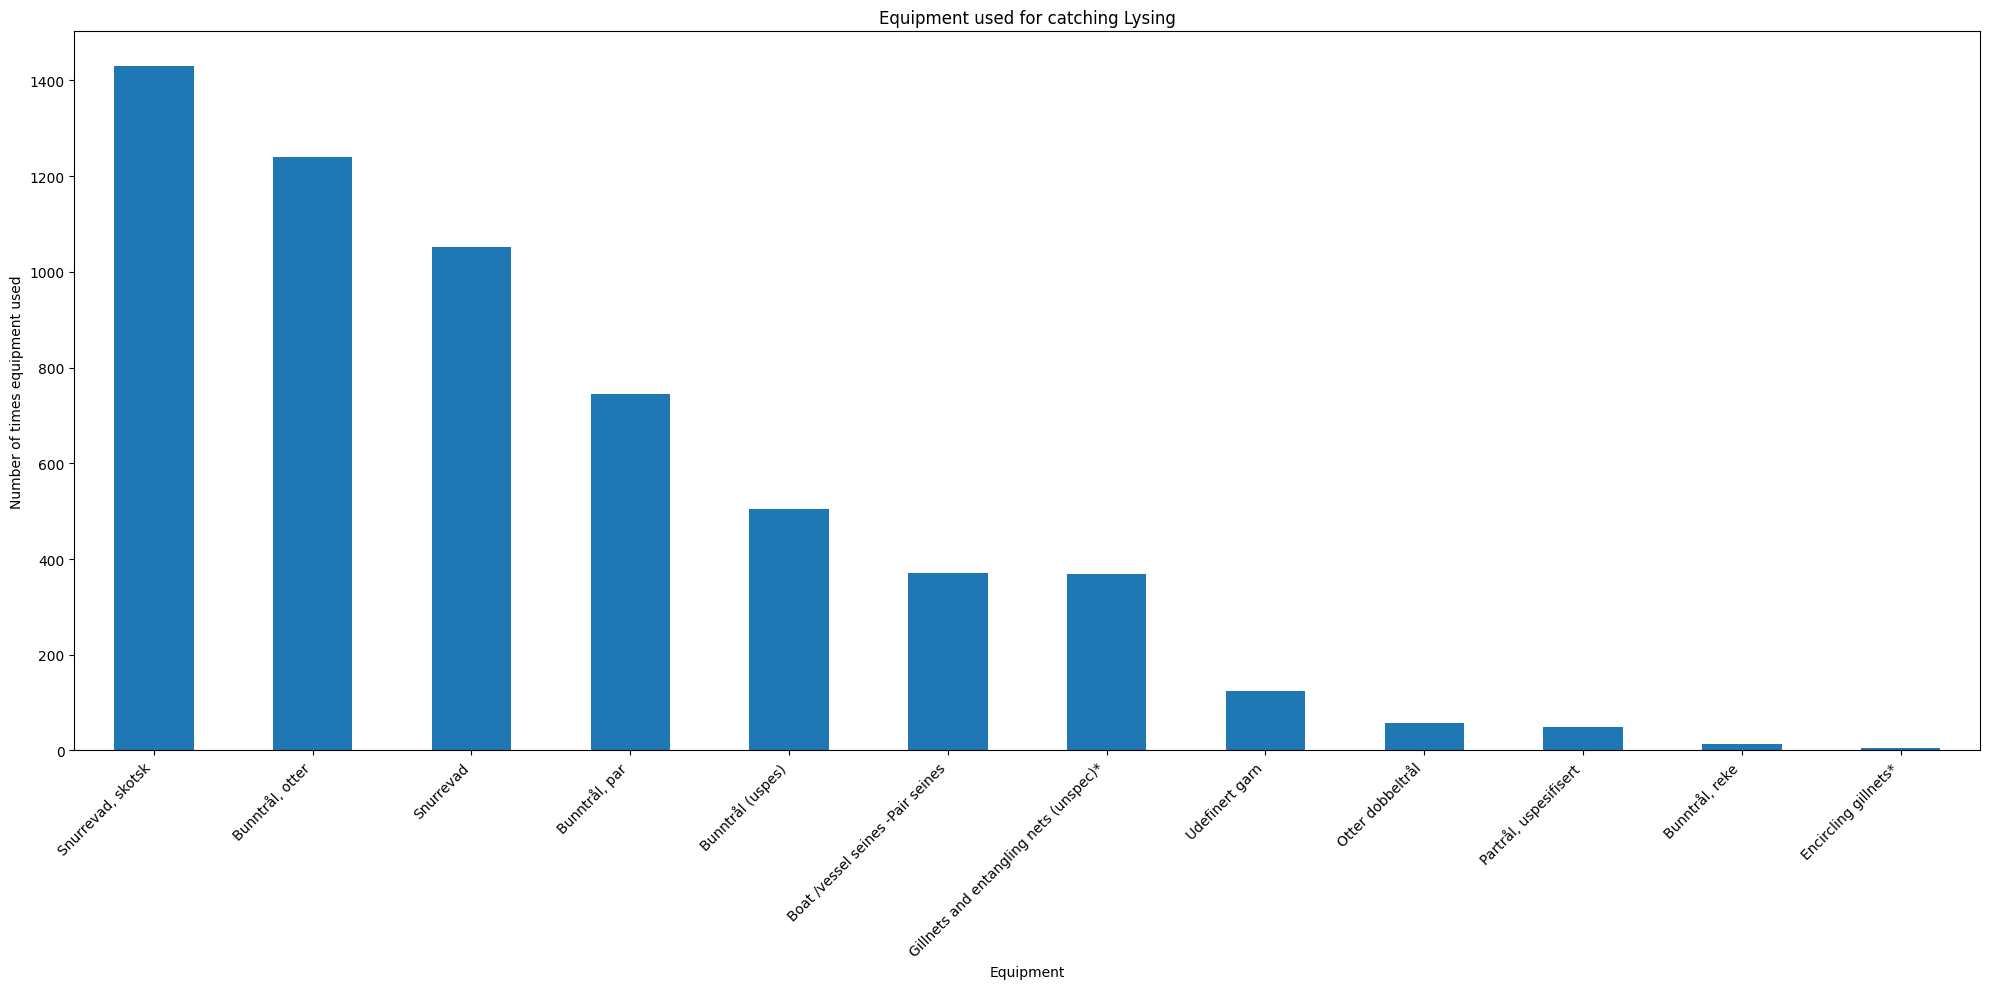

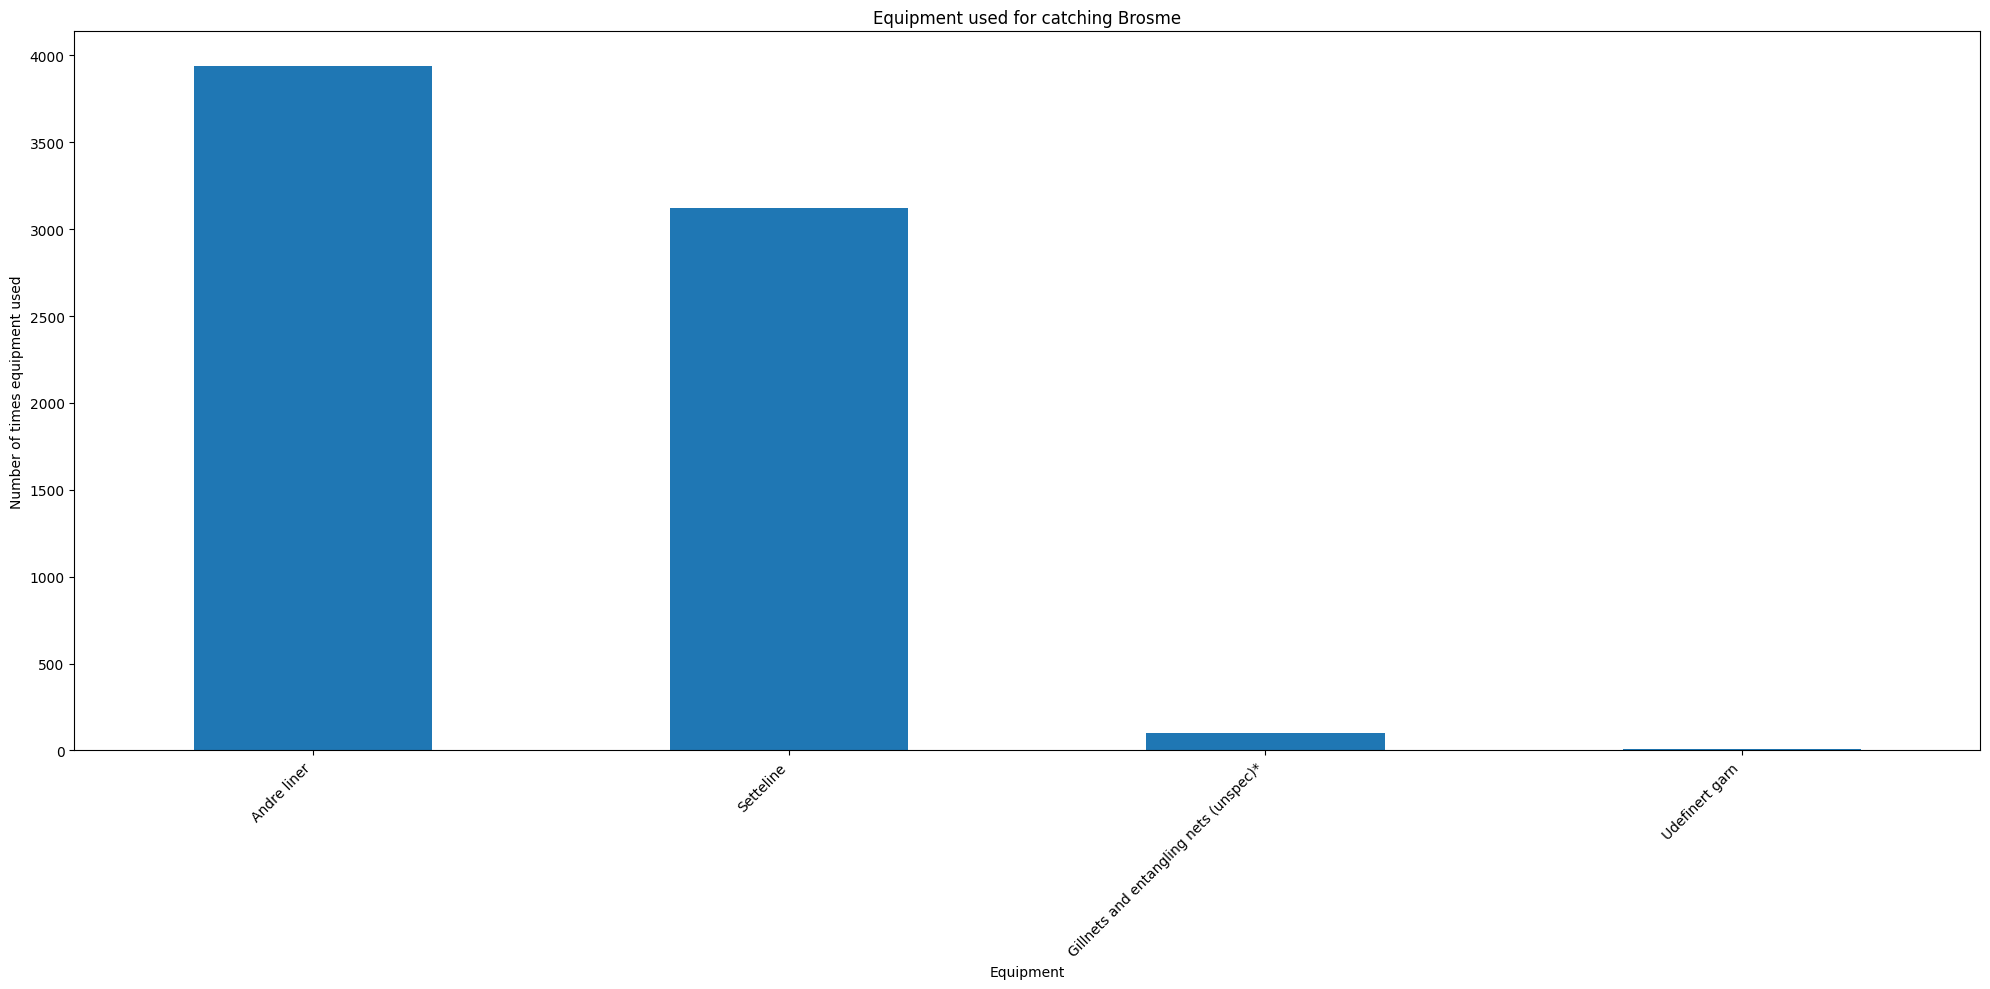

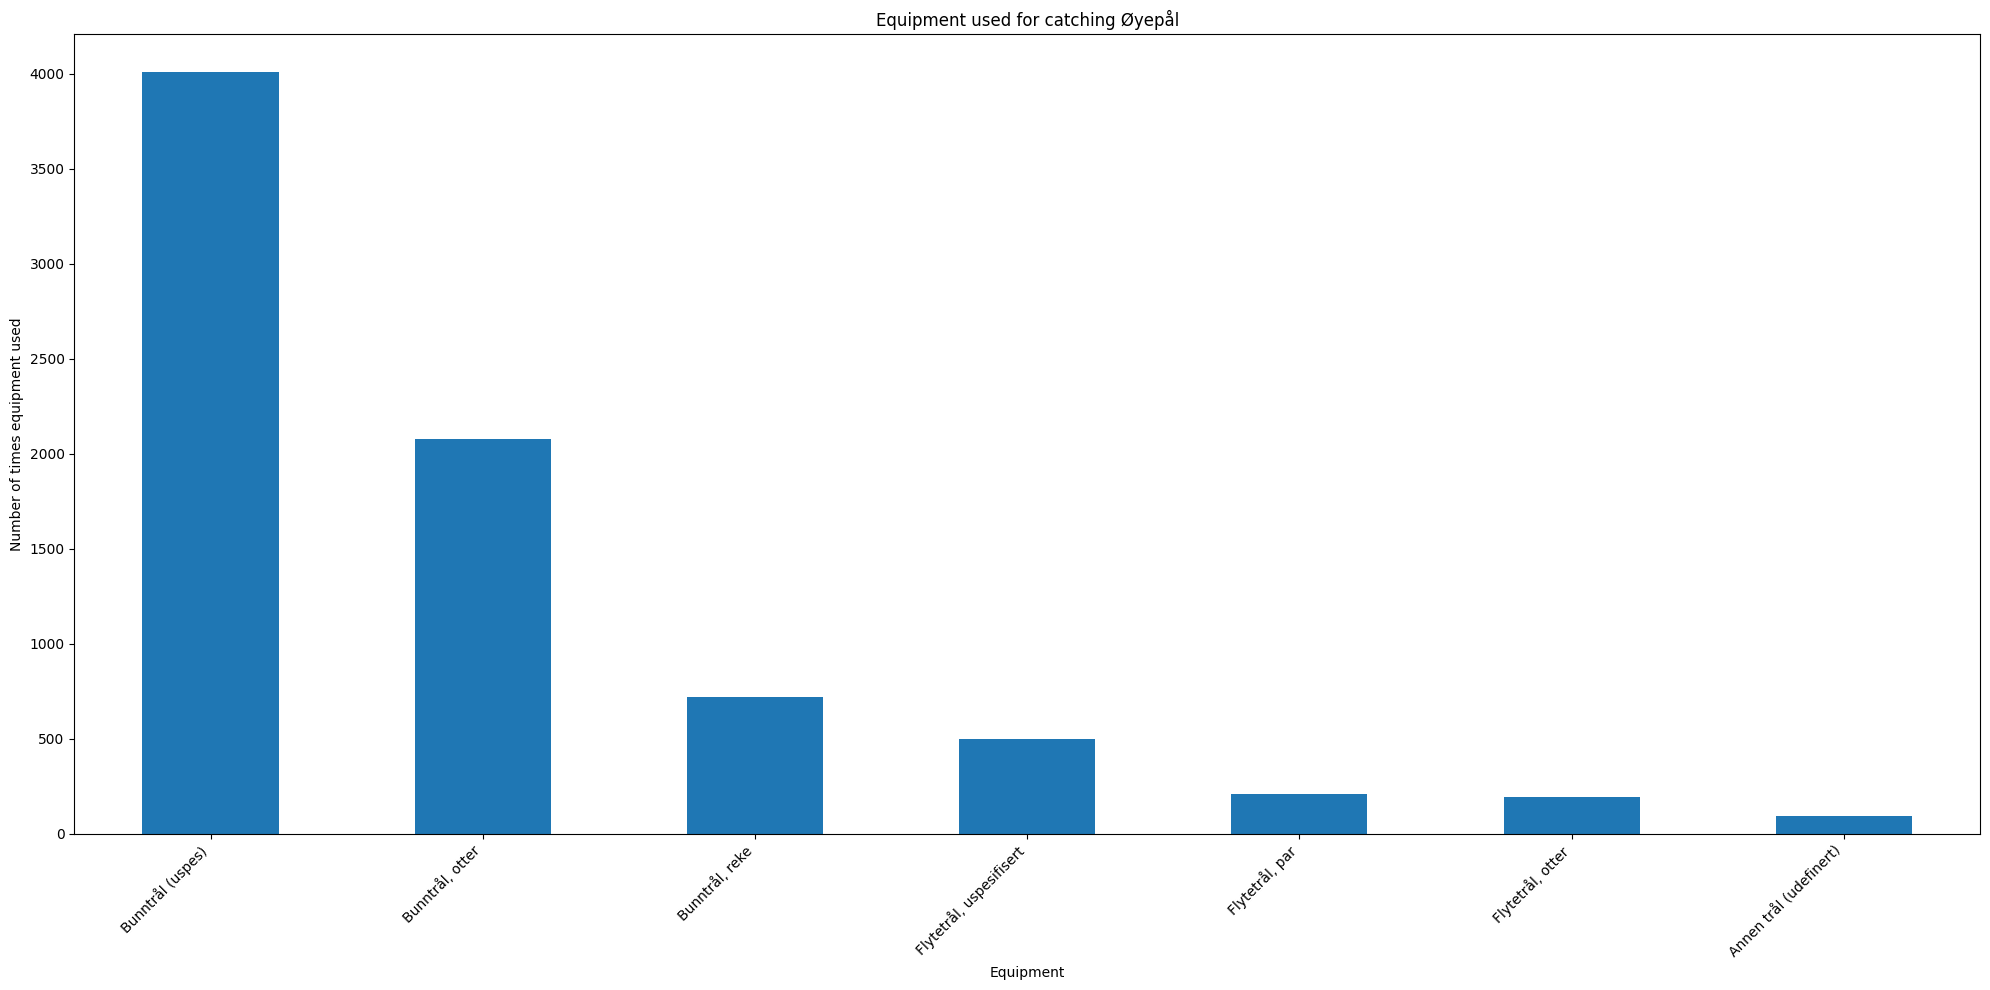

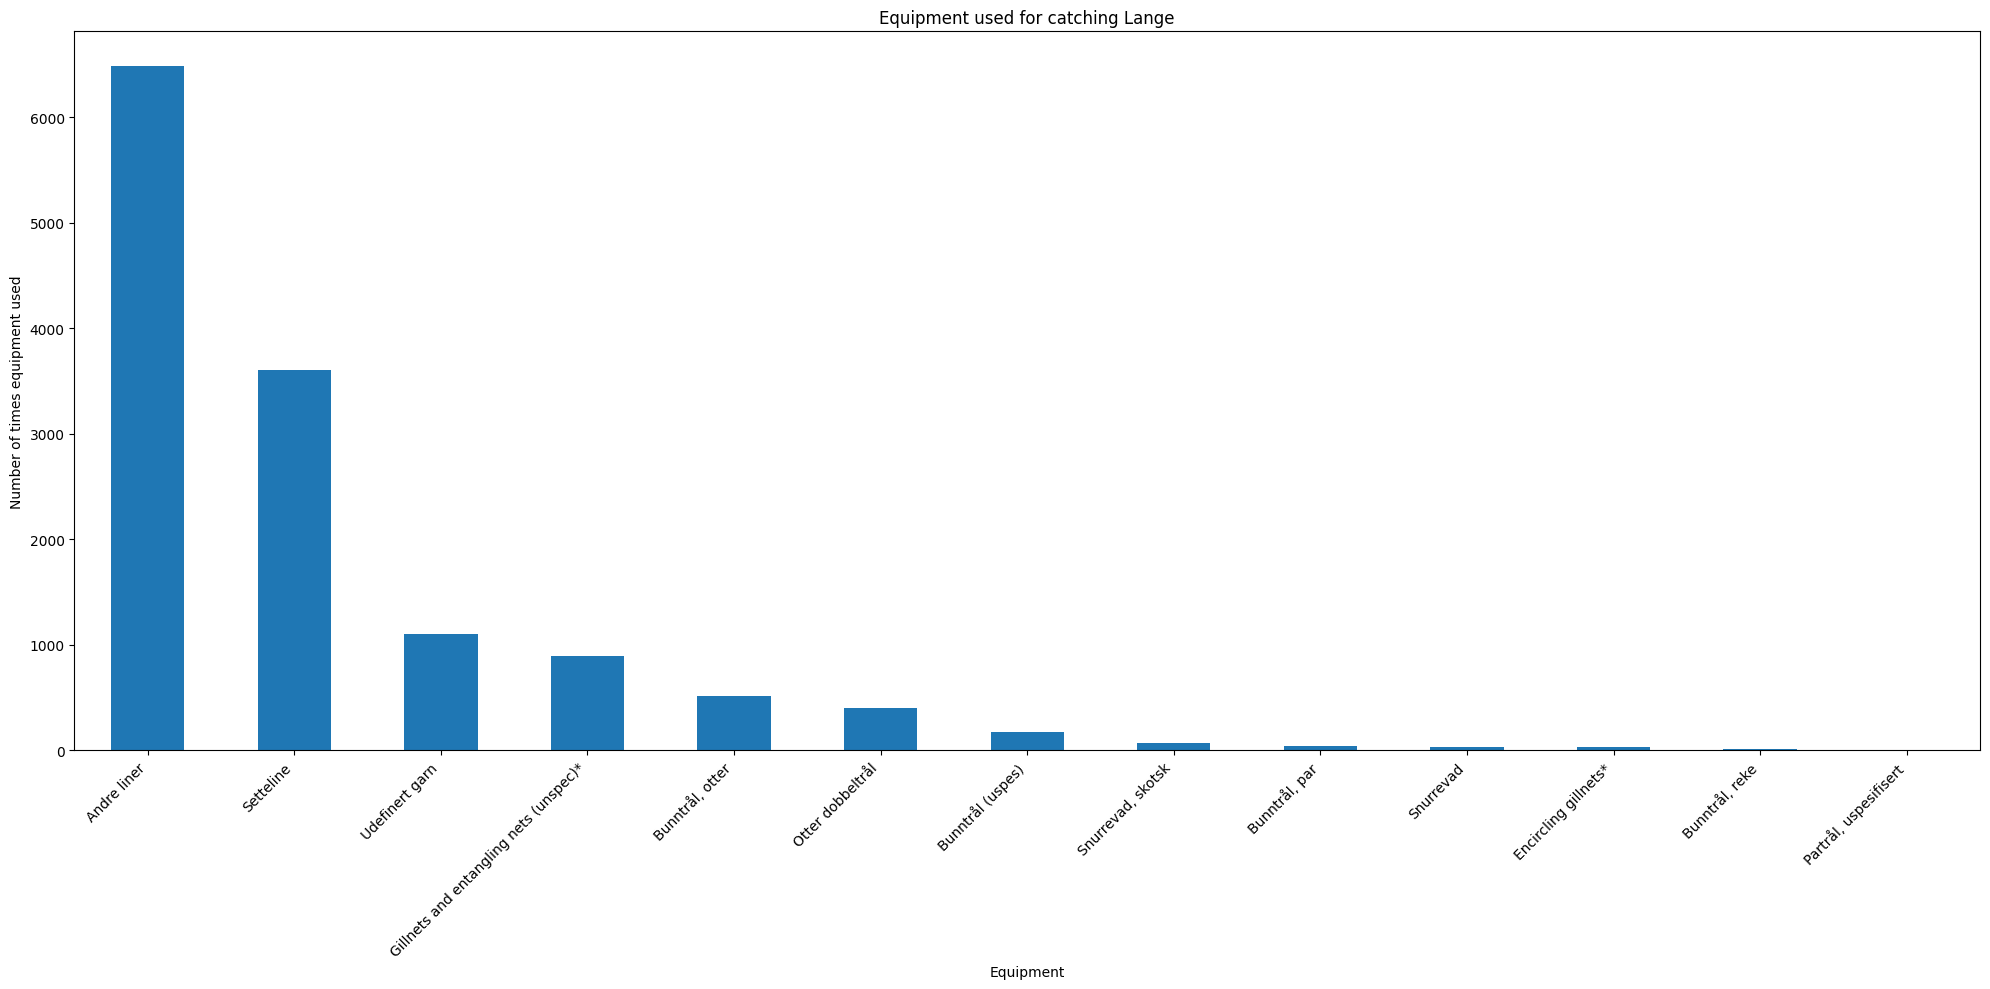

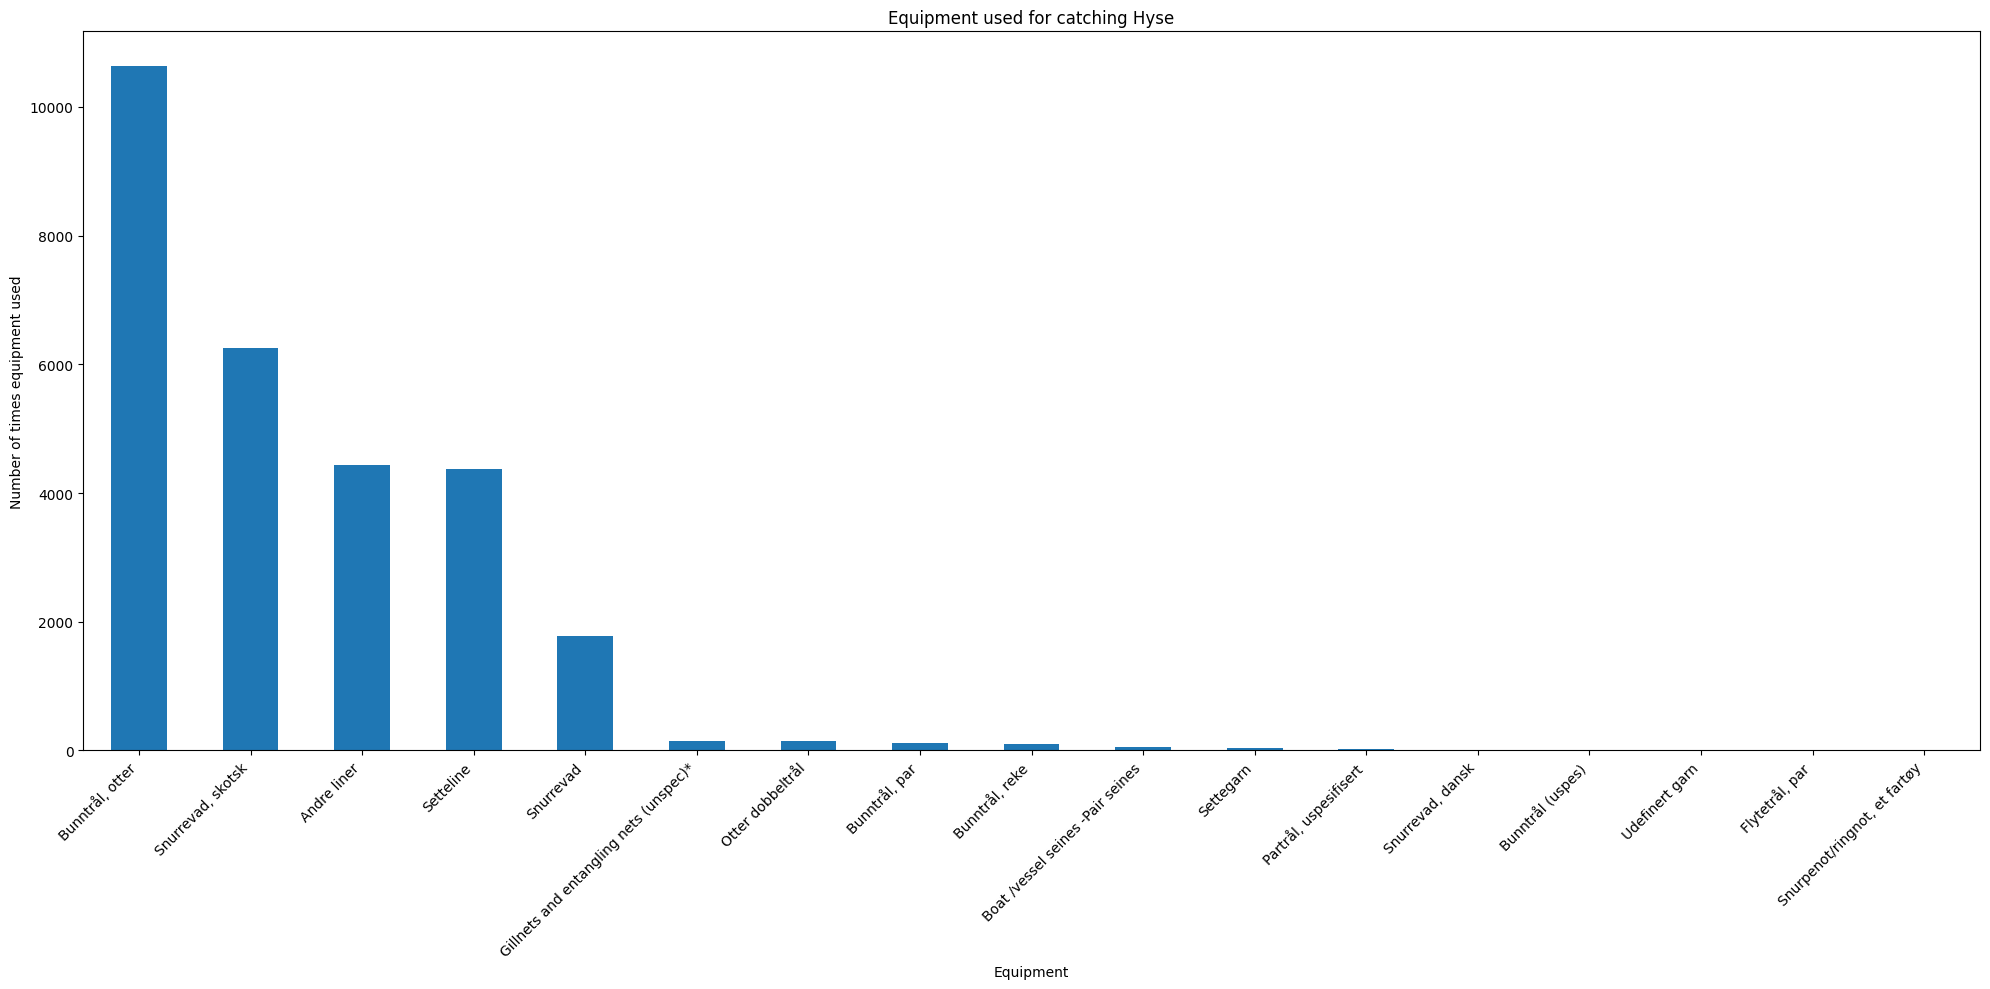

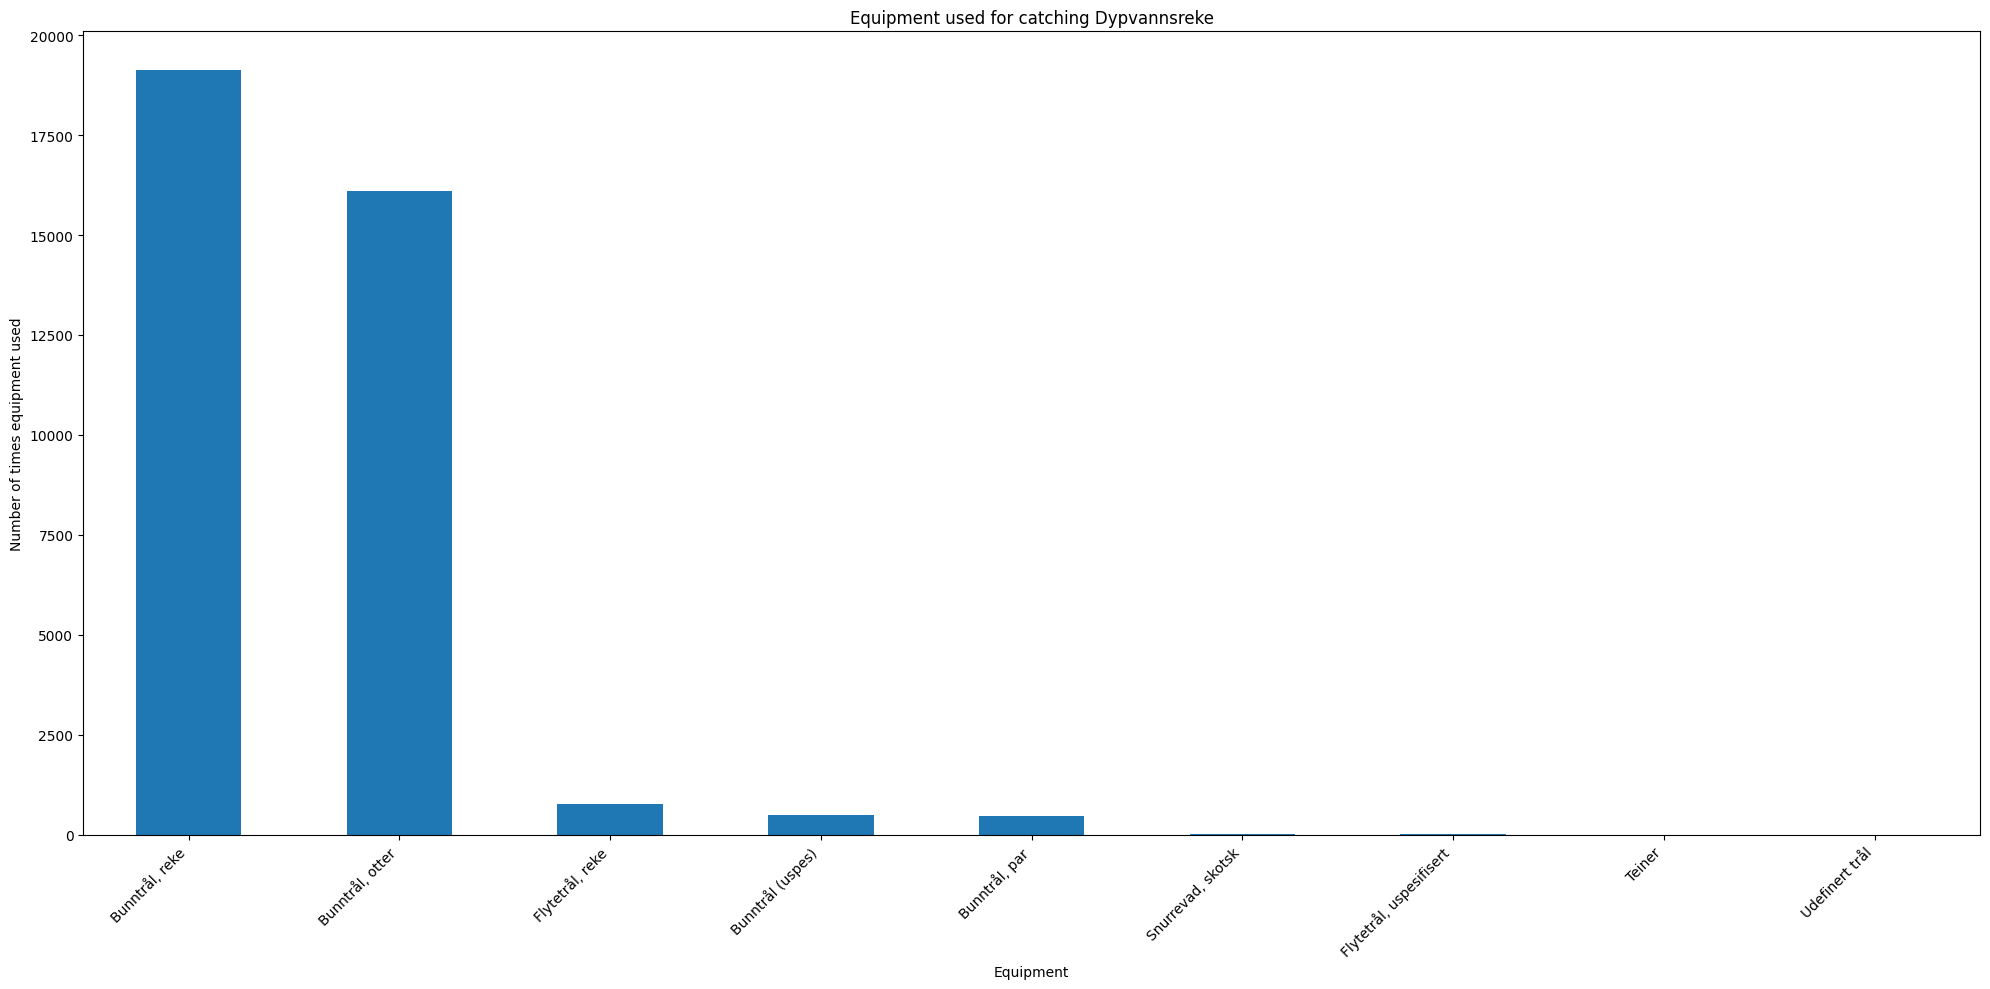

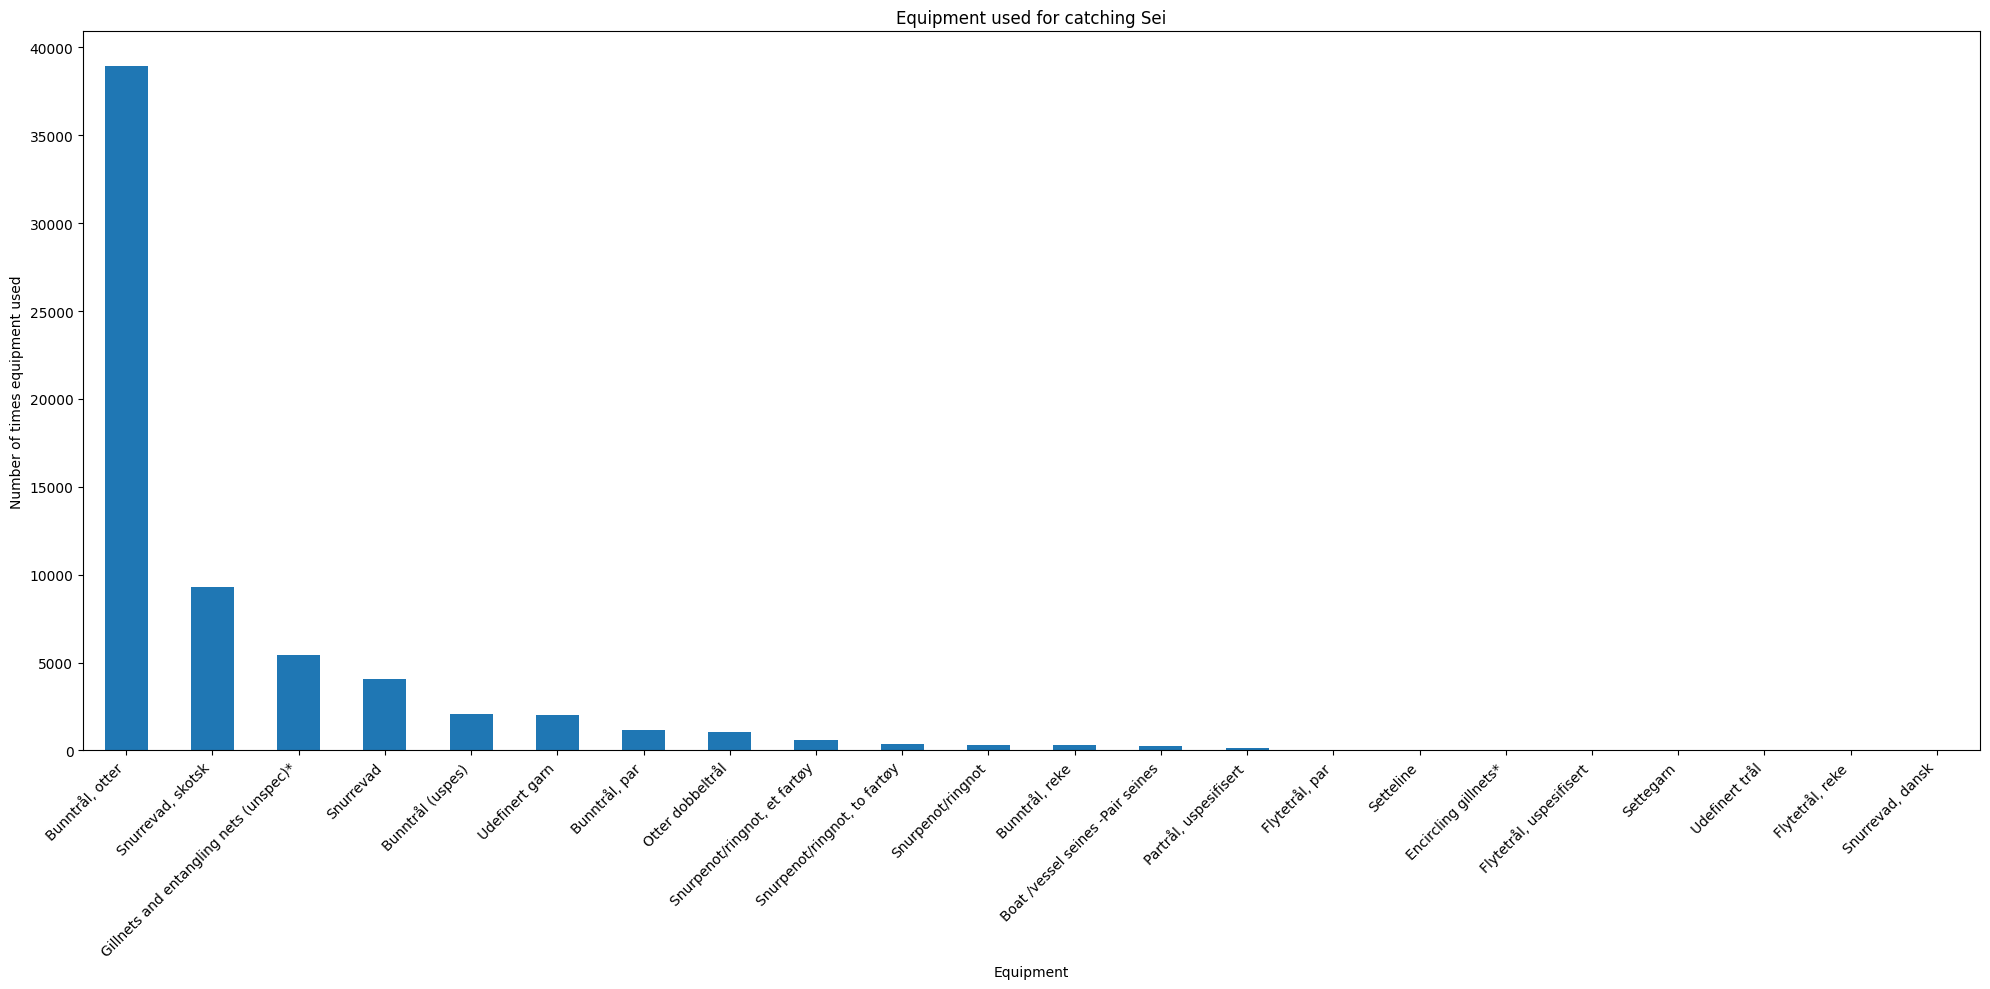

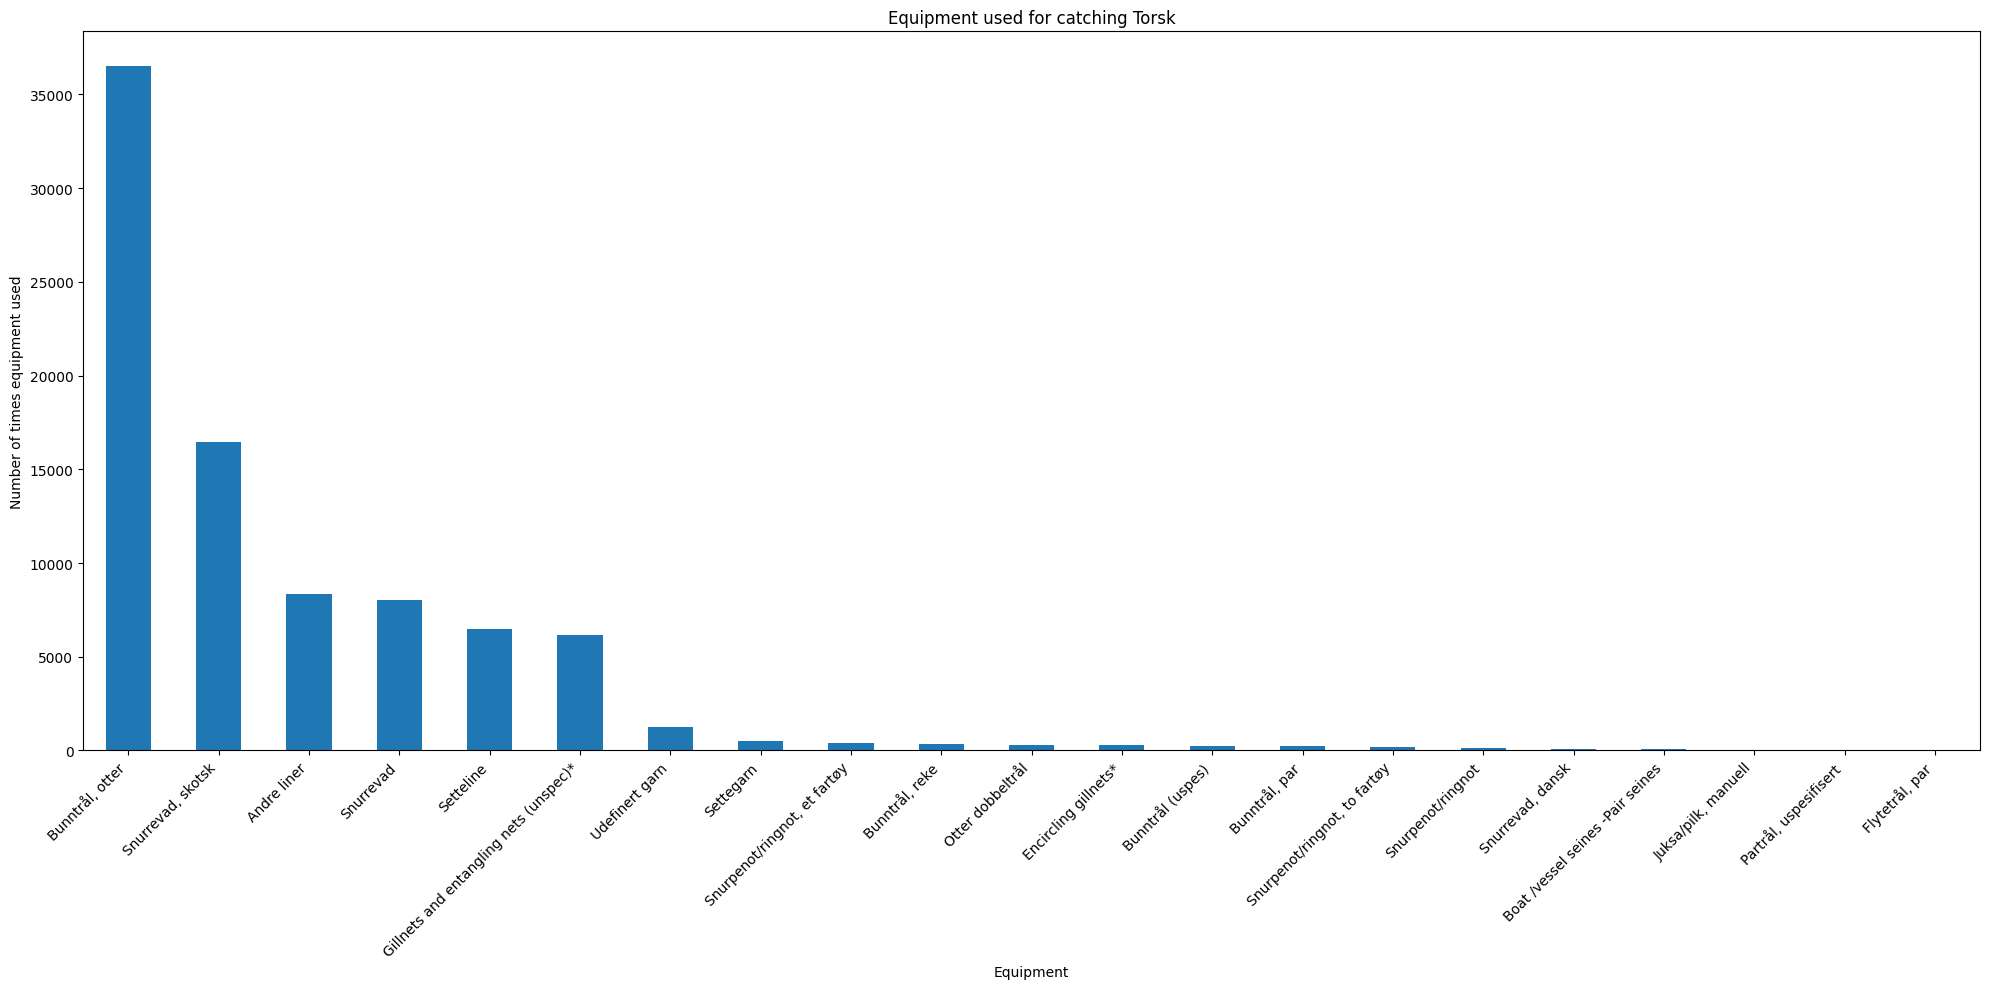

In [71]:
filtered_species = total_bycatch_counts[total_bycatch_counts > 50]

# Iterate over the bottom 10 species of the filtered list
for species, count in filtered_species[10:].items():
    # A dataset where the main species is the same as the species we want to see
    species_dataset = dataset[dataset['Hovedart FAO'] == species]
    equipment_counts = species_dataset['Redskap FAO'].value_counts()

    plt.figure(figsize=(20, 10))
    equipment_counts.plot(kind="bar")
    plt.title(f'Equipment used for catching {species}')
    plt.xlabel('Equipment')
    plt.ylabel('Number of times equipment used')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()